# Imports and installs

In [1]:
#pip install XGBoost

In [2]:
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import r2_score, accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import xgboost as xgb
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import sklearn
import shap
import itertools
import math

/home/joaosantos/.pyenv/versions/3.8.12/envs/OnThePitch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading the Dataframe

## Merging the Seasons csv files (2019-2020 untill 2021-2022)

In [3]:
def get_data(league1, wall=False):
    '''
    This function is getting the CSVs in the raw_data folder per country.
    We can have only one country, we just need to pass the name of the country in lower case.
    Or we can have all the countries inside the folder, we just need to pass the param wall=True.
    '''
    data = pd.DataFrame()
    if wall:
        leagues = listdir(f'../complete/')
        data = pd.DataFrame()
        for league in leagues:
            files = listdir(f'../complete/{league}')
            for file in files:
                df = pd.read_csv((f'../complete/{league}/'+file), encoding='windows-1254')
                df['country']=str(file)[0:2]
                data = pd.concat([data, df])
        return data
    else:
        files = [file for file in listdir(f'../complete/{league1}')]
        for file in files:
            df = pd.read_csv(f'./../complete/{league1}/'+file)
            df['country']=str(file)[0:2]
            data = pd.concat([data, df])
        return data

In [4]:
data = get_data('italy', wall=True)

In [5]:
data['Avg2<2.5'] = data['BbAv<2.5'].fillna(0) + data['Avg<2.5'].fillna(0) 
data['Avg2>2.5'] = data['BbAv>2.5'].fillna(0) + data['Avg>2.5'].fillna(0) 
data['Max2<2.5'] = data['BbMx<2.5'].fillna(0) + data['Max<2.5'].fillna(0) 
data['Max2>2.5'] = data['BbMx>2.5'].fillna(0) + data['Max>2.5'].fillna(0) 
data = data[(data['Avg2<2.5']>1) & (data['Avg2>2.5']>1)]

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [6]:
data['Avg2D'] = data['BbAvD'].fillna(0) + data['AvgD'].fillna(0) 
data['Max2D'] = data['BbMxD'].fillna(0) + data['MaxD'].fillna(0) 
data = data[(data['Avg2D']>1)]

data['Avg2A'] = data['BbAvA'].fillna(0) + data['AvgA'].fillna(0) 
data['Max2A'] = data['BbMxA'].fillna(0) + data['MaxA'].fillna(0) 
data = data[(data['Avg2A']>1)]

data['Avg2H'] = data['BbAvH'].fillna(0) + data['AvgH'].fillna(0) 
data['Max2H'] = data['BbMxH'].fillna(0) + data['MaxH'].fillna(0) 
data = data[(data['Avg2H']>1)]

In [7]:
data['FTR']=='D'

0      False
1      False
2      False
3      False
4      False
       ...  
235    False
236    False
237     True
238     True
239    False
Name: FTR, Length: 85915, dtype: bool

In [8]:
print(data.columns.tolist())


['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA', 'country', 'SJH', 'SJD', 'SJA', 'Time', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5'

In [9]:
#explore distribs
#plt.hist(data['Avg2<2.5'],bins=100)
#plt.hist(data['Avg2>2.5'],bins=100)

# Features Engineering

In [10]:
#Loading the function

def feature_engineering(data, b=20, binned=False):
    '''
    This function creates all the columns that will be needed to create the analysis 
    and return the dataframe with all this changes
    
    b is the number of bins that we want to work with. Our start value for b will be 20.
        '''
    #------------------------Number of Goals, Over and Under -----------------------------------
    
    # total number of goals = goals from the home team + goals from visiting team
    data['nb_goals']=data['FTHG']+data['FTAG']

    # boolean: true or false regarding whether they were more than 2.5 goals
    data['over_2.5_goals']=data['nb_goals']>2.5

    # boolean: true or false regarding whether they were less than 2.5 goals
    data['under_2.5_goals']=data['nb_goals']<2.5
    
    data['draw_wins']=data['FTR']=='D'
    
    data['home_wins']=data['FTR']=='H'
    
    data['away_wins']=data['FTR']=='A'
    
    #-----------------------------Payout Opening ----------------------------------------------
    
    # payout under 2.5 for Average OPENING odds
    data['payout_avg_under_2.5'] = data['under_2.5_goals']*data['Avg2<2.5']

    # payout over 2.5 for Average OPENING odds
    data['payout_avg_over_2.5'] = data['over_2.5_goals']*data['Avg2>2.5']
    
    # payout Away for Average OPENING odds ####
    data['payout_avg_away'] = data['away_wins']*data['Avg2A']

    # payout Home for Average OPENING odds
    data['payout_avg_home'] = data['home_wins']*data['Avg2H']
    
    # payout Draw for Average OPENING odds
    data['payout_avg_draw'] = data['draw_wins']*data['Avg2D']       

    #payout UNDER 2.5 for PINACLE specifically
    data['payout_under_2.5_pinacle'] = data['under_2.5_goals']*data['P<2.5']

    #payout OVER 2.5 for PINACLE specifically
    data['payout_over_2.5_pinacle'] = data['over_2.5_goals']*data['P>2.5']

    #payout UNDER 2.5 for 365 specifically
    data['payout_under_2.5_365'] = data['under_2.5_goals']*data['B365<2.5']

    #payout OVER 2.5 for 365 specifically
    data['payout_over_2.5_365'] = data['over_2.5_goals']*data['B365>2.5']
    
    #------------------------------Payout Closing --------------------------------------------
    
    # payout under 2.5 for Average CLOSING odds
    data['payout_avg_under_closing_2.5'] = data['under_2.5_goals']*data['AvgC<2.5']

    # payout over 2.5 for Average CLOSING odds
    data['payout_avg_over_closing_2.5'] = data['over_2.5_goals']*data['AvgC>2.5']

    #payout UNDER 2.5 for PINACLE closing ddds specifically
    data['payout_under_2.5_pinacle_closing'] = data['under_2.5_goals']*data['PC<2.5']

    #payout OVER 2.5 for PINACLE closing odds specifically
    data['payout_over_2.5_pinacle_closing'] = data['over_2.5_goals']*data['PC>2.5']

    #payout UNDER 2.5 for 365 closing odds specifically
    data['payout_under_2.5_365_closing'] = data['under_2.5_goals']*data['B365C<2.5']

    #payout OVER 2.5 for 365 closing odds specifically
    data['payout_over_2.5_365_closing'] = data['over_2.5_goals']*data['B365C>2.5']
    
#     #-------------------------- Implied Probability Opening ----------------------------------------
    
#     #Implied Probability UNDER 2.5 goals for for overall market opening odds (Avg) 
#     data['Implied Probability <2.5 avg']=1/data['Avg<2.5']*100

#     #Implied Probability OVER 2.5 goals for for overall market opening odds (Avg) 
#     data['Implied Probability >2.5 avg']=1/data['Avg>2.5']*100

#     #Implied Probability UNDER 2.5 goals for PINACLE
#     data['Implied Probability <2.5 pinacle']=1/data['P<2.5']*100

#     #Implied Probability OVER 2.5 goals for PINACLE
#     data['Implied Probability >2.5 pinacle']=1/data['P>2.5']*100

#     #Implied Probability UNDER 2.5 goals for 365
#     data['Implied Probability <2.5 365']=1/data['B365<2.5']*100

#     #Implied Probability OVER 2.5 goals for 365
#     data['Implied Probability >2.5 365']=1/data['B365>2.5']*100
    
#     #------------------------- Implied Probability Closing -----------------------------------
    
#     #Implied Probability UNDER 2.5 goals for overall market closing odds (AvgC)
#     data['Implied Probability <2.5 avg closing']=1/data['AvgC<2.5']*100

#     #Implied Probability OVER 2.5 goals for overall market closing odds (AvgC)
#     data['Implied Probability >2.5 avg closing']=1/data['AvgC>2.5']*100

#     #Implied Probability UNDER 2.5 goals for PINACLE closing odds
#     data['Implied Probability <2.5 pinacle closing']=1/data['PC<2.5']*100

#     #Implied Probability OVER 2.5 goals for PINACLE closing odds
#     data['Implied Probability >2.5 pinacle closing']=1/data['PC>2.5']*100

#     #Implied Probability UNDER 2.5 goals for 365 closing odds
#     data['Implied Probability <2.5 365 closing']=1/data['B365C<2.5']*100

#     #Implied Probability OVER 2.5 goals for 365 closing odds
#     data['Implied Probability >2.5 365 closing']=1/data['B365C>2.5']*100
    
#     #---------------------------- Binning IP Opening -------------------------------------

#     b=b
#     bins = np.arange(0, 101, int(100/b))
#     bins = bins.tolist()

#     #Binning UNDER 2.5 Average Market opening odds
#     data['binned <2.5 avg'] = pd.cut(data['Implied Probability <2.5 avg'], bins)

#     #Binning Over 2.5 Average Market opening odds
#     data['binned >2.5 avg'] = pd.cut(data['Implied Probability >2.5 avg'], bins)

#     #Binned UNDER 2.5 Pinnacle opening odds
#     data['binned <2.5 pinacle'] = pd.cut(data['Implied Probability <2.5 pinacle'], bins)

#     #Binned OVER 2.5 Pinnacle
#     data['binned >2.5 pinacle'] = pd.cut(data['Implied Probability >2.5 pinacle'], bins)

#     #Binned UNDER 2.5 bet365 OPENING odds
#     data['binned <2.5 365'] = pd.cut(data['Implied Probability <2.5 365'], bins)

#     #Binned OVER 2.5 bet365 OPENING odds
#     data['binned >2.5 365'] = pd.cut(data['Implied Probability >2.5 365'], bins)
    
#     #----------------------------- Binning IP Closing ------------------------------------------------

#     #Binning UNDER 2.5 Average Market closing odds
#     data['binned <2.5 avg closing'] = pd.cut(data['Implied Probability <2.5 avg closing'], bins)

#     #Binning OVER 2.5 Average Market closing odds
#     data['binned >2.5 avg closing'] = pd.cut(data['Implied Probability >2.5 avg closing'], bins)

#     #Binned UNDER 2.5 Pinnacle closing odds
#     data['binned <2.5 pinacle closing'] = pd.cut(data['Implied Probability <2.5 pinacle closing'], bins)

#     #Binned OVER 2.5 Pinnacle CLOSING odds
#     data['binned >2.5 pinacle closing'] = pd.cut(data['Implied Probability >2.5 pinacle closing'], bins)

#     #Binned UNDER 2.5 bet365 CLOSING odds
#     data['binned <2.5 365 closing'] = pd.cut(data['Implied Probability <2.5 365 closing'], bins)

#     #Binned OVER 2.5 bet365 CLOSING odds
#     data['binned >2.5 365 closing'] = pd.cut(data['Implied Probability >2.5 365 closing'], bins)
    
    #---------------------------- Binning Odds Opening ----------------------------------------------------
    
    bins2 = [1, 1.5, 2, 3, 100]
    bins2_over = [1, 1.5, 2, 3, 100]

    #Binning UNDER 2.5 Average Market opening odds
    data['binned odds <2.5 avg'] = pd.cut(data['Avg2<2.5'], bins2)

    #Binning Over 2.5 Average Market opening odds
    data['binned odds >2.5 avg'] = pd.cut(data['Avg2>2.5'], bins2_over)
    
    
    #Binning UNDER 2.5 Average Market opening odds
    data['binned odds Draw avg'] = pd.cut(data['Avg2D'], bins2)

    #Binning Over 2.5 Average Market opening odds
    data['binned odds Away avg'] = pd.cut(data['Avg2A'], bins2)    
    
    #Binning Over 2.5 Average Market opening odds
    data['binned odds Home avg'] = pd.cut(data['Avg2H'], bins2)  
    

    #Binned UNDER 2.5 Pinnacle opening odds
    data['binned odds <2.5 pinacle'] = pd.cut(data['P<2.5'], bins2)

    #Binned OVER 2.5 Pinnacle
    data['binned odds >2.5 pinacle'] = pd.cut(data['P>2.5'], bins2_over)

    #Binned UNDER 2.5 bet365 OPENING odds
    data['binned odds <2.5 365'] = pd.cut(data['B365<2.5'], bins2)

    #Binned OVER 2.5 bet365 OPENING odds
    data['binned odds >2.5 365'] = pd.cut(data['B365>2.5'], bins2_over)
    
    #----------------------------- Binning Odds Closing ----------------------------------------------------------
    
    #Binning UNDER 2.5 Average Market opening odds
    #data['binned odds <2.5 avg'] = pd.cut(data['Avg2<2.5'], bins2)

    #Binning Over 2.5 Average Market opening odds
    #data['binned odds >2.5 avg'] = pd.cut(data['Avg2>2.5'], bins2)

    #Binned UNDER 2.5 Pinnacle opening odds
    data['binned odds <2.5 pinacle closing'] = pd.cut(data['PC<2.5'], bins2)

    #Binned OVER 2.5 Pinnacle
    data['binned odds >2.5 pinacle closing'] = pd.cut(data['PC>2.5'], bins2_over)

    #Binned UNDER 2.5 bet365 OPENING odds
    data['binned odds <2.5 365 closing'] = pd.cut(data['B365C<2.5'], bins2)

    #Binned OVER 2.5 bet365 OPENING odds
    data['binned odds >2.5 365 closing'] = pd.cut(data['B365C>2.5'], bins2_over)
    
    
    #----------------------------- Other Features from D3 ------------------------------------------------------
    
    data['Pin_pays_better_under_boolean'] = data['PC<2.5'] > data['AvgC<2.5']
    data['Pin_pays_better_under_difference'] = data['PC<2.5'] / data['AvgC<2.5']
    data['%vig_p'] = (1 - (1 / (1/data['PC>2.5'] + 1/data['PC<2.5'])))*100
    data['%vig_avg'] = (1 - (1 / (1/data['AvgC>2.5'] + 1/data['AvgC<2.5'])))*100
    data['PC<2.5_P_boolean'] = data['PC<2.5'] < data['P<2.5']
    data['PC<2.5_P_relative_diff'] = data['PC<2.5'] / data['P<2.5']
    
    #----------------------- Odds and probability of the home team scoring under 2.5 -------------------------------
    
#     lst1 = []
#     lst2 = []
#     for i, team in enumerate(data['HomeTeam']):
#         date = data['Date'].iloc[i]
#         total = len(data[(data['HomeTeam'] == team) & (data['Date'] < date)])
#         n_under_home = data[(data['HomeTeam'] == team) & (data['Date'] < date)]['under_2.5_goals'].value_counts()
#         try:
#             lst1.append(1/(n_under_home[1]/total))
#             lst2.append(n_under_home[1]/total)
#         except:
#             lst1.append(np.nan)
#             lst2.append(np.nan)

#     data['odds_home_under'] = lst1
#     data['prob_home_under'] = lst2
    
#     #binning the probability of the home team to have a game of less than 2.5 score
#     data['binned prob_home_under'] = pd.cut(data['prob_home_under']*100, bins)
    
    
    #----------------------- Odds and probability of the away team scoring under 2.5 -------------------------------
    
#     lst3 = []
#     lst4  = []
#     for i, team in enumerate(data['AwayTeam']):
#         date = data['Date'].iloc[i]
#         total2 = len(data[(data['AwayTeam'] == team) & (data['Date'] < date)])
#         n_under_away2 = data[(data['AwayTeam'] == team) & (data['Date'] < date)]['under_2.5_goals'].value_counts()
#         try:
#             lst3.append(1/(n_under_away2[1] / total2))
#             lst4.append(n_under_away2[1] / total2)
#         except:
#             lst3.append(np.nan)
#             lst4.append(np.nan)

#     data['odds_away_under'] = lst3
#     data['prob_away_under'] = lst4
    
#     #binning the probability of the away team to have a game of less than 2.5 score
#     data['binned prob_away_under'] = pd.cut(data['prob_away_under']*100, bins)

    #-------------------------- Creating the prob and odds of the game -----------------------------------------------
#     '''the mean between the probability of the home team to have a score of under 2.5 and the probability 
#     of the away team to do the same'''
    
#     data['odds_game'] = (data['odds_away_under'] +  data['odds_home_under']) / 2
#     data['prob_game'] = (data['prob_away_under'] + data['prob_home_under']) / 2
    
    #-------------------------- OneHotEncoding the binned probabilities columns ------------------------------------------
    

#     if b == 5:
#         data = data[~data['binned prob_home_under'].isna()]
#         ohe = OneHotEncoder(sparse=False)
#         ohe.fit(data[['binned prob_home_under']])
#         bins_encoded = ohe.transform(data[['binned prob_home_under']])
#         data["0, 20"], data["20, 40"], data["40, 60"], data["60, 80"], data["80, 100"] = bins_encoded.T
        
#     if b == 10:
#         data = data[~data['binned prob_home_under'].isna()]
#         ohe = OneHotEncoder(sparse=False)
#         ohe.fit(data[['binned prob_home_under']])
#         bins_encoded = ohe.transform(data[['binned prob_home_under']])
#         data["0, 10"], data["10, 20"], data["20, 30"], data["30, 40"], data["40, 50"], data["50, 60"], \
#         data["60, 70"], data["70, 80"], data["80, 90"], data["90, 100"] = bins_encoded.T
        
#     if b == 20:
#         data = data[~data['binned prob_home_under'].isna()]
#         ohe = OneHotEncoder(sparse=False)
#         ohe.fit(data[['binned prob_home_under']])
#         bins_encoded = ohe.transform(data[['binned prob_home_under']])
#         data["0, 5"], data["5, 10"], data["10, 15"], data["15, 20"], data["20, 25"], data["25, 30"], \
#         data["30, 35"], data["35, 40"], data["40, 45"], data["45, 50"], data["50, 55"], data["55, 60"], \
#         data["60, 65"], data["65, 70"], data["70, 75"], data["75, 80"], data["80, 85"], data["85, 90"], \
#         data["90, 95"], data["95, 100"]= bins_encoded.T
    
    #------------------------------------ Cleaning the data ---------------------------------------------------------
    
    #data = data.dropna(subset=['HomeTeam', 'AwayTeam'], how='any')
    data = data[~data['HomeTeam'].isna()]
    data = data[~data['AwayTeam'].isna()]
    #data = data[~data['PC>2.5'].isna()]
    data = data[~data['Avg2<2.5'].isna()]
    data.drop(columns=['Referee','Unnamed: 105'], inplace=True) #, 'Unnamed: 105' 'Referee', 
    #data.dropna()
    
     #-------------------------- OneHotEncoding the binned odds ------------------------------------------
   
    ohe = OneHotEncoder(sparse=False) 
    ohe.fit(data[['binned odds <2.5 avg']])
    bins_encoded = ohe.transform(data[['binned odds <2.5 avg']])
    data["1.0_to_1.5"], data["1.5_to_2.0"], data["2.0_to_3"], data["3_to_100"] = bins_encoded.T
    data.drop(columns='binned odds <2.5 avg', inplace=True)
    
    #-------------------------- OneHotEncoding the binned odds ------------------------------------------
   
    ohe = OneHotEncoder(sparse=False) 
    ohe.fit(data[['binned odds >2.5 avg']])
    bins_encoded = ohe.transform(data[['binned odds >2.5 avg']])
    data["1.0_to_1.5_over"], data["1.5_to_2.0_over"], data["2.0_to_3_over"], data["3_to_100_over"] = bins_encoded.T
    data.drop(columns='binned odds >2.5 avg', inplace=True)
    
        #-------------------------- OneHotEncoding the binned odds Home------------------------------------------
   
    ohe = OneHotEncoder(sparse=False) 
    ohe.fit(data[['binned odds Home avg']])
    bins_encoded = ohe.transform(data[['binned odds Home avg']])
    data["1.0_to_1.5_home"], data["1.5_to_2.0_home"], data["2.0_to_3_home"], data["3_to_100_home"] = bins_encoded.T
    data.drop(columns='binned odds Home avg', inplace=True)
    
        #-------------------------- OneHotEncoding the binned odds Draw ------------------------------------------
   
    ohe = OneHotEncoder(sparse=False) 
    ohe.fit(data[['binned odds Draw avg']])
    bins_encoded = ohe.transform(data[['binned odds Draw avg']])
    data["1.0_to_1.5_draw"], data["1.5_to_2.0_draw"], data["2.0_to_3_draw"], data["3_to_100_draw"] = bins_encoded.T
    data.drop(columns='binned odds Draw avg', inplace=True)
    
        #-------------------------- OneHotEncoding the binned odds Away------------------------------------------
   
    ohe = OneHotEncoder(sparse=False) 
    ohe.fit(data[['binned odds Away avg']])
    bins_encoded = ohe.transform(data[['binned odds Away avg']])
    data["1.0_to_1.5_away"], data["1.5_to_2.0_away"], data["2.0_to_3_away"], data["3_to_100_away"] = bins_encoded.T
    data.drop(columns='binned odds Away avg', inplace=True)
    
    #-------------------------- OneHotEncoding the binned countries ------------------------------------------

    ohe = OneHotEncoder(sparse=False) 
    ohe.fit(data[['country']])
    bins_encoded = ohe.transform(data[['country']])
    data["country_1"], data["country_2"], data["country_3"], data["country_4"], data["country_5"],data["country_6"], data["country_7"], data["country_8"], data["country_9"], data["country_10"], data["country_11"] = bins_encoded.T
    data.drop(columns='country', inplace=True)

    #-------------------------- OneHotEncoding the binned country divisions ------------------------------------------
    data['country_division'] = data['Div'].map({'F1':1, 'D1':1, 'I2':2, 'E1':2, 'E2':3, 'F2':2, 'N1':1, 'T1':1, \
                                                'SC2':2, 'SP2':2, 'E0':1,'D2':2, 'G1':1, 'I1':1, 'SC1':2, 'SP1':1,\
                                                'SC0':1, 'SC3':4, 'E3':4, 'P1':1, 'B1':1})
    
    ohe = OneHotEncoder(sparse=False) 
    ohe.fit(data[['country_division']])
    bins_encoded = ohe.transform(data[['country_division']])
    data["country_div_1"], data["country_div_2"], data["country_div_3"], data["country_div_4"] = bins_encoded.T
    #data.drop(columns='country_division', inplace=True)
    
    return data

In [11]:
#Running the function and creating the dataset data

data = feature_engineering(data, b=5)

In [12]:
data['%vig_avg'] = (1 - (1 / (1/data['AvgC>2.5'] + 1/data['AvgC<2.5'])))*100

In [13]:
data['%vig_avg_games'] = (1 - (1 / (1/data['Avg2A'] + 1/data['Avg2H'] + 1/data['Avg2D'])))*100

In [14]:
# lstvig = []
# for i, vigame in enumerate(data['%vig_avg_games']):
#     date = data['Date'].iloc[i]
#     total2 = len(data[(data['AwayTeam'] == team) & (data['Date'] < date)])
#     n_under_away2 = data[(data['AwayTeam'] == team) & (data['Date'] < date)]['under_2.5_goals'].value_counts()
#     try:
#         lst3.append(1/(n_under_away2[1] / total2))
#         lst4.append(n_under_away2[1] / total2)
#     except:
#         lst3.append(np.nan)
#         lst4.append(np.nan)

# data['odds_away_under'] = lst3
# data['prob_away_under'] = lst4

In [43]:
for i, datum in enumerate(data['Date']):
    date = data['Date'].iloc[i]
    print(data[data['Date'] < date]['%vig_avg_games'].median())
    

6.4378328048411255
6.446726906325162
6.446726906325162
6.446726906325162
6.446726906325162
6.446726906325162
6.446726906325162
6.4563641173799144
6.4563641173799144
6.4563641173799144
6.465212223876716
6.465212223876716
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.459103791048049
6.459103791048049
6.459103791048049
6.476035849552646
6.470017530696809
6.470017530696809
6.470017530696809
6.470017530696809
6.470017530696809
6.470017530696809
6.463652000982911
6.463652000982911
6.463652000982911
6.468772781917709
6.469707660904605
6.469707660904605
6.469707660904605
6.469707660904605
6.469707660904605
6.469707660904605
6.470767789488008
6.470767789488008
6.470767789488008
6.450057392850988
6.450057392850988
6.452989910293672
6.452989910293672
6.452989910293672
6.452989910293672
6.452989910293672
6.462018590112118
6.462018590112118
6.462018590112118
6.465754671687008
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.46462

6.474421632992056
6.475062459516989
6.475062459516989
6.475062459516989
6.463599490196431
6.468066452206078
6.468066452206078
6.468066452206078
6.468066452206078
6.468066452206078
6.458627799462646
6.458627799462646
6.458627799462646
6.458627799462646
6.470603849631711
6.465928885559952
6.465928885559952
6.465928885559952
6.465928885559952
6.465928885559952
6.465928885559952
6.466569837835218
6.466569837835218
6.466569837835218
6.469413959062065
6.472135465663209
6.472135465663209
6.472135465663209
6.472135465663209
6.472135465663209
6.472135465663209
6.4721025482159025
6.4721025482159025
6.4721025482159025
6.423495109257782
6.441426118573879
6.441426118573879
6.441426118573879
6.441426118573879
6.441426118573879
6.441426118573879
6.448421083646094
6.448421083646094
6.448421083646094
6.460823568460539
6.468806151963886
6.468806151963886
6.468806151963886
6.468806151963886
6.468806151963886
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.463240262086945
6.46625

6.4373511459811965
6.4373511459811965
6.449219316478949
6.449219316478949
6.449219316478949
6.470037164463976
6.470037164463976
6.470037164463976
6.470037164463976
6.470037164463976
6.470037164463976
6.4734215286707535
6.4734215286707535
6.4734215286707535
6.469594755472318
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.475786431165142
6.475786431165142
6.475786431165142
6.475786431165142
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4634319684947155
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.469135285621586
6.469135285621586
6.469135285621586
6.474209002725528
6.468881028710682
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.465491562092596
6.465491562092596
6.465491562092596
6.4687

6.42032300242712
6.42032300242712
6.42032300242712
6.42032300242712
6.42032300242712
6.42032300242712
6.4489149475671415
6.453859898846126
6.453859898846126
6.453859898846126
6.453859898846126
6.453859898846126
6.453859898846126
6.453859898846126
6.463652000982911
6.463652000982911
6.463652000982911
6.4730119832833
6.46319703157312
6.46319703157312
6.46319703157312
6.46319703157312
6.46319703157312
6.46319703157312
6.468880285884449
6.468880285884449
6.468880285884449
6.473844432377296
6.466736722981182
6.466736722981182
6.466736722981182
6.466736722981182
6.466736722981182
6.465217613444163
6.465217613444163
6.465217613444163
6.4695844185423566
6.468732018043322
6.468732018043322
6.468732018043322
6.468732018043322
6.468732018043322
6.469656992084438
6.469656992084438
6.469656992084438
6.44559943989127
6.451543155145462
6.451543155145462
6.451543155145462
6.451543155145462
6.451543155145462
6.451543155145462
6.450080862636115
6.450080862636115
6.450080862636115
6.455528660603232
6.455

6.473798119384161
6.438680739917164
6.44701473879628
6.44701473879628
6.44701473879628
6.44701473879628
6.44701473879628
6.44701473879628
6.44980613247002
6.44980613247002
6.44980613247002
6.464540636646621
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.459557937039529
6.459557937039529
6.459557937039529
6.474875917711064
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.463576158940398
6.463576158940398
6.467190257657041
6.4692074326867015
6.4692074326867015
6.4692074326867015
6.4692074326867015
6.4692074326867015
6.4692074326867015
6.469389000354148
6.469389000354148
6.469389000354148
6.39539023095837
6.4347389264025505
6.4347389264025505
6.4347389264025505
6.4347389264025505
6.4347389264025505
6.4347389264025505
6.4347389264025505
6.461115990090582
6.461115990090582
6.4562489320904355
6.4562489320904355
6.4562489320904355
6.4562489320904355
6.4

6.4623347058304805
6.4623347058304805
6.4623347058304805
6.472142003388642
6.473802185486132
6.473802185486132
6.474192960166098
6.474192960166098
6.474192960166098
6.474192960166098
6.474192960166098
6.474192960166098
6.462177924226959
6.470075553694943
6.46435315188657
6.46435315188657
6.46082507588387
6.46082507588387
6.46082507588387
6.46082507588387
6.46082507588387
6.46082507588387
6.46082507588387
6.463293020506516
6.464463394078901
6.470075553694943
6.476804763086097
6.47098976109215
6.47098976109215
6.463899245441129
6.463899245441129
6.463899245441129
6.463899245441129
6.463899245441129
6.463899245441129
6.463899245441129
6.46889839948408
6.46961222074326
6.46961222074326
6.470953070084773
6.470953070084773
6.470953070084773
6.470953070084773
6.470953070084773
6.470953070084773
6.470953070084773
6.425438541198419
6.4492443819354985
6.4492443819354985
6.448513859590288
6.448513859590288
6.448513859590288
6.448513859590288
6.448513859590288
6.448513859590288
6.448513859590288
6

6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.461893539690061
6.461893539690061
6.461893539690061
6.461893539690061
6.461893539690061
6.461893539690061
6.461893539690061
6.4635330993905225
6.4635330993905225
6.4635330993905225
6.474537910222544
6.474537910222544
6.474537910222544
6.474537910222544
6.474537910222544
6.474537910222544
6.475861477351163
6.475861477351163
6.404011695551226
6.460964512653517
6.460964512653517
6.460964512653517
6.460964512653517
6.460964512653517
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.461408161609033
6.461408161609033
6.461408161609033
6.461408161609033
6.461408161609033
6.461408161609033
6.464052430633888
6.464052430633888
6.464052430633888
6.463293020506516
6.463293020506516
6.463293020506516
6.463293020506516
6.463293020506516
6.463293020506516
6.463293020506516
6.46623

6.464633152444277
6.464633152444277
6.464633152444277
6.464633152444277
6.472814304252883
6.472814304252883
6.472814304252883
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.474692627448608
6.474692627448608
6.474692627448608
6.463599490196431
6.464232038034707
6.464232038034707
6.464232038034707
6.464232038034707
6.464232038034707
6.464232038034707
6.464232038034707
6.464232038034707
6.464232038034707
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.468786572660068
6.469389000354148
6.469389000354148
6.469389000354148
6.469389000354148
6.469389000354148
6.469389000354148
6.469389000354148
6.472115881575997
6.472115881575997
6.472115881575997
6.442361732518553
6.442361732518553
6.442361732518553
6.442361732518553
6.442361732518553
6.442361732518553
6.450057392850988
6.4665339531054915
6.46653

6.468668290890667
6.468668290890667
6.468668290890667
6.468668290890667
6.465922883793618
6.465922883793618
6.465922883793618
6.465922883793618
6.464665249734336
6.464665249734336
6.464297244739892
6.464297244739892
6.464297244739892
6.464297244739892
6.464297244739892
6.46297104612249
6.46297104612249
6.46297104612249
6.4694289857587295
6.470976368110004
6.470976368110004
6.470976368110004
6.470976368110004
6.470976368110004
6.470976368110004
6.378247373035162
6.378247373035162
6.378247373035162
6.44980613247002
6.463865818656844
6.463865818656844
6.463865818656844
6.463865818656844
6.463865818656844
6.453976481804002
6.453976481804002
6.453976481804002
6.456649816667259
6.458018520743081
6.458018520743081
6.448549272039572
6.448549272039572
6.448549272039572
6.448549272039572
6.448549272039572
6.448549272039572
6.448549272039572
6.45905843561091
6.464625246139688
6.464625246139688
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.

6.463048691227868
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.464653154241601
6.464653154241601
6.464653154241601
6.466239173087052
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.4623347058304805
6.4623347058304805
6.4623347058304805
6.471223540064935
6.47321891796544
6.47321891796544
6.47321891796544
6.47321891796544
6.47321891796544
6.47321891796544
6.4742672446292895
6.4742672446292895
6.4742672446292895
6.453786657594579
6.460839584205281
6.460839584205281
6.460839584205281
6.460839584205281
6.460839584205281
6.460839584205281
6.4580485222828665
6.4580485222828665
6.4580485222828665
6.46961222074326
6.463241608482983
6.463241608482983
6.463241608482983
6.463241608482983
6.463241608482983
6.463241608482983
6.465516668880323
6.465516668880323
6.465516668880323
6.468393662637384
6.470397770269964
6.470397770269964
6.470397770269964
6.470397770269964
6.470397770269964
6.4

6.461930039016062
6.461930039016062
6.459240665202371
6.459240665202371
6.466505151071078
6.464540636646621
6.464540636646621
6.464540636646621
6.464540636646621
6.464540636646621
6.464540636646621
6.468827633179125
6.468827633179125
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.473450977288914
6.473450977288914
6.473450977288914
6.473450977288914
6.473450977288914
6.470078367253379
6.463968723584113
6.463968723584113
6.463968723584113
6.463968723584113
6.463968723584113
6.463968723584113
6.465651977038034
6.465651977038034
6.4742285772037445
6.4744797716072995
6.4744797716072995
6.4744797716072995
6.4744797716072995
6.4744797716072995
6.4744797716072995
6.378930072353045
6.378930072353045
6.4207092462857664
6.4207092462857664
6.4207092462857664
6.4207092462857664
6.44823195520442
6.44823195520442
6.44823195520442
6.44823195520442
6.44823195520442
6.453041698363976
6.461785497289457
6.461785497289457
6.461785497289457
6.461785497289457
6.461785497289457
6.46

6.462691426118205
6.462691426118205
6.463184120920196
6.463184120920196
6.471223540064935
6.471223540064935
6.473450977288908
6.473450977288908
6.473450977288908
6.473450977288908
6.473450977288908
6.473450977288908
6.473450977288908
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.465260994884331
6.465260994884331
6.465260994884331
6.465260994884331
6.465260994884331
6.465260994884331
6.465260994884331
6.465260994884331
6.465260994884331
6.476804763086097
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.463899245441129
6.463899245441129
6.46889839948408
6.46961222074326
6.46961222074326
6.46961222074326
6.46961222074326
6.46961222074326
6.46961222074326
6.470953070084773
6.470953070084773
6.425438541198419
6.4492443819354985
6.4492443819354985
6.4492443819354985
6.4492443819354985
6.4492443819354985
6.4492443819354985

6.475526142406423
6.475526142406423
6.475526142406423
6.475526142406423
6.475526142406423
6.443739148441447
6.443739148441447
6.4616788239590885
6.455561468866411
6.455561468866411
6.455561468866411
6.455561468866411
6.455561468866411
6.455561468866411
6.456848814537364
6.456848814537364
6.464166831329521
6.4665989167974836
6.4665989167974836
6.4665989167974836
6.4665989167974836
6.4665989167974836
6.4665989167974836
6.472779311245808
6.472779311245808
6.463652000982911
6.464474263972842
6.464474263972842
6.464474263972842
6.464474263972842
6.464474263972842
6.464474263972842
6.466331641083217
6.46149992821996
6.465229649177573
6.465229649177573
6.465229649177573
6.465229649177573
6.465229649177573
6.465229649177573
6.468880285884449
6.468880285884449
6.472578313253008
6.474421632992056
6.276045082761355
6.276045082761355
6.276045082761355
6.276045082761355
6.276045082761355
6.276045082761355
6.443668603050878
6.443668603050878
6.461504174134292
6.4556237593544346
6.4556237593544346
6.

6.4634319684947155
6.45624638076664
6.45624638076664
6.45624638076664
6.45624638076664
6.45624638076664
6.45624638076664
6.46297104612249
6.46297104612249
6.4651663591728745
6.4651663591728745
6.4651663591728745
6.4651663591728745
6.468307211872587
6.468307211872587
6.468307211872587
6.468307211872587
6.468307211872587
6.463043378125432
6.463043378125432
6.463043378125432
6.463043378125432
6.463043378125432
6.463043378125432
6.463043378125432
6.463043378125432
6.463043378125432
6.46889839948408
6.46889839948408
6.46889839948408
6.46889839948408
6.46889839948408
6.46889839948408
6.46889839948408
6.46889839948408
6.46889839948408
6.46304603467665
6.4687585209736165
6.4687585209736165
6.4687585209736165
6.4687585209736165
6.4687585209736165
6.4687585209736165
6.46964136243644
6.46964136243644
6.476761384534724
6.419529408041525
6.419529408041525
6.419529408041525
6.419529408041525
6.419529408041525
6.419529408041525
6.405838496205457
6.405838496205457
6.465545031318026
6.466239173087052
6

6.4695844185423566
6.453624370874461
6.413840921008035
6.413840921008035
6.413840921008035
6.413840921008035
6.413840921008035
6.413840921008035
6.434613801121003
6.434613801121003
6.45898567354098
6.45919490584378
6.45919490584378
6.45919490584378
6.45919490584378
6.45919490584378
6.468692090742778
6.468692090742778
6.468692090742778
6.468307211872587
6.468307211872587
6.468307211872587
6.468307211872587
6.465401971157453
6.465401971157453
6.465401971157453
6.465401971157453
6.465401971157453
6.472779206173929
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.473133052097685
6.473133052097685
6.469656992084438
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.465212223876716
6.465212223876716
6.474203642711307
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.464166831329521
6.464166831329521
6.4688212

6.468668290890667
6.463576158940398
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.462358427714843
6.462358427714843
6.471999520736654
6.474356327914799
6.474356327914799
6.474356327914799
6.474356327914799
6.474356327914799
6.474356327914799
6.39539023095837
6.39539023095837
6.450057392850988
6.455528660603232
6.455528660603232
6.455528660603232
6.455528660603232
6.455528660603232
6.447587810281263
6.447587810281263
6.447587810281263
6.463637411217688
6.463637411217688
6.463637411217688
6.463637411217688
6.463637411217688
6.463637411217688
6.463637411217688
6.463637411217688
6.463637411217688
6.464633152444277
6.463782634933923
6.463782634933923
6.463782634933923
6.463782634933923
6.463782634933923
6.463782634933923
6.466239173087052
6.466239173087052
6.468628294686656
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.462217563953276
6.462217563953276
6.4724997983

6.4685879027902065
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.470888642414657
6.470888642414657
6.408554160079749
6.432208690533137
6.432208690533137
6.432208690533137
6.432208690533137
6.432208690533137
6.432208690533137
6.4489149475671415
6.4489149475671415
6.456900060865234
6.464633152444277
6.464633152444277
6.464633152444277
6.464633152444277
6.464633152444277
6.464633152444277
6.472814304252883
6.472814304252883
6.464052430633888
6.468939482349217
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.474692627448608
6.474692627448608
6.4686521634422345
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.465212223876716
6.465212223876716
6.468568055592816
6.469389000354148
6.469389000354148
6.469389000354148
6.469389000354148
6.469389000354148
6.469389000354148
6.472115881575997
6.472115881575997
6.417128398390181
6.442361732518553
6.

6.464297244739892
6.464297244739892
6.47098976109215
6.472086357154627
6.472086357154627
6.472086357154627
6.472086357154627
6.472086357154627
6.472086357154627
6.474582450850653
6.474582450850653
6.447395069196338
6.450906831816644
6.450906831816644
6.450906831816644
6.450906831816644
6.450906831816644
6.450906831816644
6.460964512653517
6.460964512653517
6.457421058638779
6.457421058638779
6.457421058638779
6.457421058638779
6.457421058638779
6.457421058638779
6.457421058638779
6.457421058638779
6.457421058638779
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.461710448985714
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.469492722477449
6.475585893190377
6.364145328107962
6.364145328107962
6.364145328107962
6.364145328107962
6.364145328107962
6.364145328107962
6.4025923867653045
6.40259238

6.460089312637307
6.460089312637307
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.466635078455063
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.464551506540562
6.464551506540562
6.464551506540562
6.468558282208592
6.4754385565743755
6.476122783178284
6.476122783178284
6.476122783178284
6.476122783178284
6.476122783178284
6.438562248342011
6.438562248342011
6.438562248342011
6.409763801217434
6.464511459847927
6.459547763077012
6.459547763077012
6.459547763077012
6.459547763077012
6.459547763077012
6.4562489320904355
6.4562489320904355
6.4562489320904355
6.458699726357852
6.464434217280207
6.468700154466994
6.468700154466994
6.468700154466994
6.468700154466994
6.468700154466994
6.470610672824361
6.470610672824361
6.470610672824361
6.468220761107791
6.465516668880323
6.465516668880323
6.465516668880323
6.465516668880323
6.465516668880323
6.465516668880323
6.464166831329521
6.464166831329521
6.464166831329521
6.469648268838462
6.4

6.475564164862218
6.475564164862218
6.470051411202993
6.470051411202993
6.470051411202993
6.470051411202993
6.470051411202993
6.470051411202993
6.470051411202993
6.470051411202993
6.470051411202993
6.466569837835218
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.463729365212661
6.469360333688157
6.469360333688157
6.469360333688157
6.469360333688157
6.469360333688157
6.469360333688157
6.469360333688157
6.469360333688157
6.469360333688157
6.469360333688157
6.468939482349217
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.468475972422988
6.474203642711307
6.474203642711307
6.474203642711307
6.465401971157453
6.463464365308935
6.463464365308935
6.463464365308935
6.463464365308935
6.463464365308935
6.463464365308935
6.463464365308935
6.463464365308935
6.462358427714843
6.466508926574798
6.4

6.464633152444277
6.464633152444277
6.464633152444277
6.464633152444277
6.464633152444277
6.464633152444277
6.464633152444277
6.472814304252883
6.4659168633120885
6.468939482349217
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.474692627448608
6.470002963143267
6.455153062890395
6.455153062890395
6.455153062890395
6.455153062890395
6.455153062890395
6.455153062890395
6.455153062890395
6.455153062890395
6.455153062890395
6.455153062890395
6.455153062890395
6.463293020506516
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.468880285884449
6.4686521634422345
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.465212223876716
6.463240262086945
6.468568055592816
6.468568055592816

6.465934887326286
6.470367655012421
6.470367655012421
6.470367655012421
6.470367655012421
6.470367655012421
6.470367655012421
6.470367655012421
6.473399554260406
6.473399554260406
6.461802147065088
6.461802147065088
6.461802147065088
6.461802147065088
6.461802147065088
6.461802147065088
6.461802147065088
6.461802147065088
6.461802147065088
6.461802147065088
6.461802147065088
6.470143529428018
6.470143529428018
6.470143529428018
6.470143529428018
6.470143529428018
6.470143529428018
6.470143529428018
6.470143529428018
6.470143529428018
6.470143529428018
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.473415375152225
6.465285694425127
6.464696072220167
6.468409390101315
6.468409390101315
6.468409390101315
6.468409390101315
6.468409390101315
6.468409390101315
6.468409390101315
6.468409390101315
6.468409390101315
6.470397770269964
6.24346776

6.4665989167974836
6.4665989167974836
6.4665989167974836
6.4665989167974836
6.4665989167974836
6.472779311245808
6.463652000982911
6.463652000982911
6.464474263972842
6.464474263972842
6.464474263972842
6.464474263972842
6.464474263972842
6.464474263972842
6.464474263972842
6.464474263972842
6.466331641083217
6.470627001360285
6.470627001360285
6.470627001360285
6.470627001360285
6.470627001360285
6.470627001360285
6.470627001360285
6.470627001360285
6.470627001360285
6.470627001360285
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.475135989448766
6.4738731797519105
6.46149992821996
6.465229649177573
6.465229649177573
6.465229649177573
6.465229649177573
6.465229649177573
6.465229649177573
6.465229649177573
6.465229649177573
6.465229649177573
6.468745034407602
6.474421632992056
6.276045082761355
6.276045082761355
6.276045082761355
6.276045082761355
6.276

6.470037164463976
6.470037164463976
6.470037164463976
6.470037164463976
6.470037164463976
6.470037164463976
6.470037164463976
6.470037164463976
6.470037164463976
6.4734215286707535
6.465928885559952
6.469594755472318
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.475786431165142
6.470502396648541
6.463755916767566
6.463755916767566
6.463755916767566
6.463755916767566
6.463755916767566
6.463755916767566
6.463755916767566
6.463755916767566
6.463755916767566
6.463755916767566
6.463755916767566
6.47100359558459
6.476108040052708
6.475271411338957
6.475271411338957
6.475271411338957
6.475271411338957
6.475271411338957
6.475271411338957
6.475271411338957
6.475271411338957
6.475271411338957
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.465491562092596
6.464067777456817
6.468745034407602
6.47029913

6.470351971250398
6.474865990673273
6.475271411338957
6.446080799997899
6.446080799997899
6.446080799997899
6.446080799997899
6.446080799997899
6.446080799997899
6.446080799997899
6.446080799997899
6.446080799997899
6.4651895306107265
6.4651895306107265
6.453551427795057
6.453551427795057
6.464400662655612
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.463865818656844
6.470610672824361
6.473724759624938
6.473724759624938
6.473724759624938
6.473724759624938
6.473724759624938
6.473724759624938
6.473724759624938
6.473724759624938
6.463576158940398
6.4608540925266915
6.454100961409754
6.454100961409754
6.454100961409754
6.454100961409754
6.454100961409754
6.454100961409754
6.454100961409754
6.454100961409754
6.454100961409754
6.458347028766709
6.463351924370075
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.46523

6.434613801121003
6.434613801121003
6.447923502390552
6.45898567354098
6.45898567354098
6.45898567354098
6.45898567354098
6.45919490584378
6.45919490584378
6.45919490584378
6.45919490584378
6.45919490584378
6.45919490584378
6.468692090742778
6.472779206173929
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.473133052097685
6.473133052097685
6.464474263972842
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.469423354182879
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.4688802858

6.463755916767566
6.462100996811687
6.462100996811687
6.46555758471189
6.468655253748307
6.47161820705362
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.474537910222544
6.474537910222544
6.474537910222544
6.28419015002703
6.4276053447712425
6.451399628386978
6.453551427795057
6.453551427795057
6.453551427795057
6.453551427795057
6.453551427795057
6.453551427795057
6.453551427795057
6.453551427795057
6.463144476657407
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.458699726357852
6.458699726357852
6.470972903940542
6.46157668531297
6.46157668531297
6.46157668531297
6.46157668531297
6.46157668531297
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4665989167974836
6.47343625297983
6.465922883793618
6.465922883793618
6.465922883793618
6.465922883793618
6.465922883793618
6.465922883793618
6.465922883793618
6.464653154241601
6.464653154241

6.451399628386978
6.451399628386978
6.451399628386978
6.451399628386978
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.4652242596101255
6.470367655012421
6.470367655012421
6.470367655012421
6.470367655012421
6.470367655012421
6.470367655012421
6.470367655012421
6.470367655012421
6.458380551641218
6.468868693698182
6.468868693698182
6.468868693698182
6.468868693698182
6.468868693698182
6.468868693698182
6.468868693698182
6.465922883793618
6.465922883793618
6.465922883793618
6.473763145791139
6.473763145791139
6.473763145791139
6.473763145791139
6.473763145791139
6.464386832421731
6.464386832421731
6.464386832421731
6.464386832421731
6.464386832421731
6.418101203564408
6.418101203564408
6.418101203564408
6.418101203564408
6.418101203564408
6.418101203564408
6.418101203564408
6.414461505555641
6.414461505555641
6.414461505555641
6.442035654802303
6.442035654802303
6.442035654802303
6.442035654802303
6.442035654802303
6.448355544300577
6.448355544300577
6.4483555

6.4688744897913155
6.4688744897913155
6.4688744897913155
6.471187087743124
6.471187087743124
6.471187087743124
6.471187087743124
6.471187087743124
6.471187087743124
6.471187087743124
6.39934553387469
6.42439785437785
6.42439785437785
6.42439785437785
6.42439785437785
6.42439785437785
6.42439785437785
6.42439785437785
6.42439785437785
6.42439785437785
6.42439785437785
6.461842008523016
6.464625246139688
6.464625246139688
6.464625246139688
6.464625246139688
6.464625246139688
6.464625246139688
6.464625246139688
6.464625246139688
6.464625246139688
6.45957403359676
6.468172857859727
6.469656992084438
6.476087395537644
6.476087395537644
6.476087395537644
6.476087395537644
6.476087395537644
6.476087395537644
6.472975835150535
6.472975835150535
6.472975835150535
6.464665249734336
6.463240262086945
6.463240262086945
6.467316142552082
6.467316142552082
6.467316142552082
6.467316142552082
6.467316142552082
6.467316142552082
6.467316142552082
6.467316142552082
6.467316142552082
6.469565270404281
6

6.460079814530606
6.460079814530606
6.460079814530606
6.460079814530606
6.460079814530606
6.460079814530606
6.460079814530606
6.460079814530606
6.460079814530606
6.460079814530606
6.460079814530606
6.460079814530606
6.465299037323718
6.4700997021784
6.4700997021784
6.4700997021784
6.4700997021784
6.4700997021784
6.4700997021784
6.4700997021784
6.4700997021784
6.4700997021784
6.4700997021784
6.475360244118367
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.468432107409095
6.474537910222544
6.476706227699469
6.476706227699469
6.476706227699469
6.476706227699469
6.476706227699469
6.476706227699469
6.476706227699469
6.476706227699469


6.473578478469733
6.473578478469733
6.473578478469733
6.473578478469733
6.473578478469733
6.473578478469733
6.366590390026412
6.366590390026412
6.366590390026412
6.366590390026412
6.400049090072335
6.421906019096063
6.4365443802564375
6.4365443802564375
6.4365443802564375
6.4365443802564375
6.4365443802564375
6.4365443802564375
6.4365443802564375
6.4365443802564375
6.4460815360512065
6.4460815360512065
6.4460815360512065
6.450566828100363
6.450566828100363
6.450566828100363
6.450566828100363
6.450566828100363
6.446631347447979
6.446631347447979
6.446631347447979
6.446631347447979
6.446631347447979
6.446631347447979
6.450033973955965
6.456708784295179
6.456708784295179
6.463467040817461
6.463467040817461
6.463467040817461
6.463467040817461
6.463467040817461
6.463467040817461
6.463467040817461
6.463467040817461
6.463449504656088
6.463449504656088
6.462659223980105
6.462659223980105
6.462659223980105
6.462659223980105
6.462659223980105
6.462659223980105
6.462659223980105
6.463490039840646

6.4623347058304805
6.466969793614002
6.466969793614002
6.466969793614002
6.466969793614002
6.466969793614002
6.466969793614002
6.466969793614002
6.474612306350036
6.474612306350036
6.466414072896787
6.466414072896787
6.466414072896787
6.466414072896787
6.466414072896787
6.466414072896787
6.466414072896787
6.466414072896787
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.463729365212661
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.4662489997504125
6.469087891536174
6.469087891536174
6.436487022440007
6.429935418843364
6.429935418843364
6.429935418843364
6.429935418843364
6.429935418843364
6.450185484005111
6.450185484005111
6.450185484005111
6.450185484005111
6.450185484005111
6.450185484005111
6.450185484005111
6.450185484005111
6.450185484005111
6.450185484005111
6.450185484005111
6.46435315188657
6.461930039016062
6.4619300

6.475271411338957
6.475271411338957
6.475087883782127
6.475087883782127
6.475087883782127
6.475087883782127
6.475087883782127
6.475087883782127
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.469656992084438
6.4634319684947155
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.468881028710682
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.462310983946118
6.462310983946118
6.466576920530532
6.4702991381165145
6.4702991381165145
6.4702991381165145
6.4702991381165145
6.4702991381165145
6.475036966469921
6.475036966469921
6.4750369664

6.4665730900173575
6.4665730900173575
6.4665730900173575
6.4665730900173575
6.4665730900173575
6.4665730900173575
6.4665730900173575
6.4665730900173575
6.4665730900173575
6.4665730900173575
6.4665730900173575
6.469866215703673
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.464653154241601
6.462100996811687
6.462100996811687
6.462100996811687
6.462100996811687
6.462100996811687
6.463599490196431
6.463599490196431
6.463599490196431
6.463599490196431
6.463599490196431
6.463599490196431
6.463599490196431
6.469594755472318
6.470217070466077
6.470217070466077
6.470217070466077
6.470217070466077
6.470217070466077
6.470217070466077
6.470217070466077
6.470217070466077
6.470217070466077
6.471187087743124
6.474582450850653
6.435762623867042
6.4460815360512065
6.4460815360512065
6.4460815360512065
6.4460815360512065
6.4460815360512065
6.4460815360512065
6.4460815360512065
6.

6.47060004147908
6.47060004147908
6.471179022773965
6.471179022773965
6.381165525380106
6.381165525380106
6.381165525380106
6.381165525380106
6.381165525380106
6.381165525380106
6.381165525380106
6.381165525380106
6.381165525380106
6.381165525380106
6.381165525380106
6.425840971830226
6.463190576246658
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.468475972422988
6.474612306350036
6.474612306350036
6.474612306350036
6.474612306350036
6.474612306350036
6.474612306350036
6.474612306350036
6.474612306350036
6.474612306350036
6.474612306350036
6.469594755472318
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.4632186468300326
6.463776830174406
6.468393662637384
6.473578478469733
6.473578478469733
6.473578478469733
6.473578478

6.450014980525298
6.450014980525298
6.450014980525298
6.450014980525298
6.450014980525298
6.450014980525298
6.445989340357089
6.4622725917089285
6.4622725917089285
6.4622725917089285
6.4622725917089285
6.4622725917089285
6.4622725917089285
6.4622725917089285
6.4622725917089285
6.4622725917089285
6.4622725917089285
6.4622725917089285
6.463240935284964
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.462772288969804
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.4636

6.450082791632628
6.450082791632628
6.450082791632628
6.450082791632628
6.450082791632628
6.450082791632628
6.450082791632628
6.450082791632628
6.450082791632628
6.466095256877691
6.466095256877691
6.466095256877691
6.466095256877691
6.466095256877691
6.466095256877691
6.466095256877691
6.466095256877691
6.466095256877691
6.466095256877691
6.466095256877691
6.466095256877691
6.466641028963638
6.46531238022231
6.46531238022231
6.46531238022231
6.46531238022231
6.46531238022231
6.46531238022231
6.46531238022231
6.46531238022231
6.46531238022231
6.46531238022231
6.474421632992056
6.471970945286998
6.463953376761184
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.

6.464665249734336
6.464665249734336
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.466641028963638
6.4629219493034125
6.4629219493034125
6.4629219493034125
6.4629219493034125
6.4629219493034125
6.4629219493034125
6.4629219493034125
6.4629219493034125
6.4629219493034125
6.4629219493034125
6.4629219493034125
6.4619808659346685
6.4688744897913155
6.4688744897913155
6.4688744897913155
6.324561441635929
6.324561441635929
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.450099906956885
6.4

6.472975835150535
6.472975835150535
6.467152202662879
6.467152202662879
6.467152202662879
6.467152202662879
6.467152202662879
6.467152202662879
6.464400662655612
6.463755916767566
6.462100996811687
6.462100996811687
6.468477388599869
6.468477388599869
6.468655253748307
6.468655253748307
6.468655253748307
6.468655253748307
6.47161820705362
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.28419015002703
6.4276053447712425
6.4276053447712425
6.4276053447712425
6.4276053447712425
6.413713208584504
6.413713208584504
6.451399628386978
6.453551427795057
6.453551427795057
6.453551427795057
6.453551427795057
6.453551427795057
6.453551427795057
6.453551427795057
6.453551427795057
6.453551427795057
6.453551427795057
6.451521021722306
6.451521021722306
6.458699726357852
6.470972903940542
6.46157668531297
6.46157668531297
6.46157668531297
6.46157668531297
6.4615766853

6.448421083646094
6.460823568460539
6.468806151963886
6.468806151963886
6.468806151963886
6.468806151963886
6.468806151963886
6.468806151963886
6.468806151963886
6.468806151963886
6.468806151963886
6.468806151963886
6.468806151963886
6.463240262086945
6.46625766871165
6.46625766871165
6.46625766871165
6.46625766871165
6.46625766871165
6.46625766871165
6.46625766871165
6.46625766871165
6.46625766871165
6.46625766871165
6.468655253748307
6.470974636025273
6.470974636025273
6.470974636025273
6.470974636025273
6.470974636025273
6.470974636025273
6.471970945286998
6.471970945286998
6.471970945286998
6.471970945286998
6.471970945286998
6.471970945286998
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.414281798103849
6.435926462859603
6.460362229318662
6.459394214139691
6.459394214139691
6.459394214139691
6.459394214139691
6.459394214139691
6.45939421

6.470822328291737
6.470822328291737
6.470822328291737
6.470822328291737
6.470822328291737
6.470822328291737
6.470822328291737
6.470822328291737
6.470822328291737
6.472948790501432
6.474560180536598
6.474560180536598
6.474560180536598
6.474560180536598
6.474560180536598
6.474560180536598
6.474560180536598
6.474560180536598
6.474560180536598
6.418815305802966
6.418815305802966
6.418815305802966
6.442320892667097
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.461891756399973
6.470078367253379
6.4754385565743755
6.4754385565743755
6.4754385565743755
6.4754385565743755
6.4754385565743755
6.4754385565743755
6.4754385565743755
6.4754385565743755
6.4754385565743755
6.4754385565743755
6.4754385565743755
6.465910842830558
6.465910842830558
6.465910842830558
6.465910842830558
6.465910842830558
6.465910842830558
6.465910842830558
6.465910842830558
6.465910842830558

6.447184679411777
6.447184679411777
6.447184679411777
6.447184679411777
6.447184679411777
6.447184679411777
6.447184679411777
6.447184679411777
6.447184679411777
6.450777828875642
6.463782634933923
6.463782634933923
6.463782634933923
6.463782634933923
6.463782634933923
6.463782634933923
6.463782634933923
6.463782634933923
6.463782634933923
6.463782634933923
6.466239173087052
6.466239173087052
6.475601970083922
6.475601970083922
6.475601970083922
6.475601970083922
6.475601970083922
6.475601970083922
6.475601970083922
6.4700077926825745
6.4700077926825745
6.4700077926825745
6.4700077926825745
6.468628294686656
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.47249979832133
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.47358

6.427918649720754
6.427918649720754
6.427918649720754
6.427918649720754
6.427918649720754
6.427918649720754
6.427918649720754
6.449698920052693
6.449698920052693
6.449698920052693
6.449698920052693
6.449698920052693
6.449698920052693
6.449698920052693
6.449698920052693
6.449698920052693
6.449698920052693
6.449698920052693
6.449698920052693
6.456463763445186
6.456463763445186
6.456463763445186
6.456463763445186
6.456463763445186
6.456463763445186
6.456463763445186
6.456463763445186
6.456463763445186
6.456463763445186
6.456463763445186
6.465260994884331
6.466095256877691
6.466095256877691
6.467152202662879
6.467152202662879
6.469087891536174
6.469087891536174
6.469087891536174
6.469087891536174
6.469087891536174
6.469087891536174
6.469087891536174
6.469087891536174
6.469087891536174
6.469087891536174
6.473038283632137
6.473038283632137
6.473038283632137
6.473038283632137
6.473038283632137
6.473038283632137
6.473038283632137
6.473038283632137
6.473038283632137
6.473038283632137
6.47303828

6.475305358152678
6.473844432377296
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.33486675558702
6.33486675558702
6.33486675558702
6.33486675558702
6.33486675558702
6.33486675558702
6.33486675558702
6.33486675558702
6.33486675558702
6.33486675558702
6.33486675558702
6.33486675558702
6.454597892333858
6.454597892333858
6.454597892333858
6.454597892333858
6.454597892333858
6.454597892333858
6.454597892333858
6.454597892333858
6.454597892333858
6.45504979196081
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.471990767539804
6.471990767539804
6.471990767539804
6.471990767539804
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992

6.414281798103849
6.414281798103849
6.414281798103849
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.470334972973967
6.468881028710682
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.468880285884449
6.468880285884449
6.46157668531297
6.46157668531297
6.46157668531297
6.46157668531297
6.46157668531297
6.46157668531297
6.46157668531297
6.468758991175349
6.468758991175349
6.4744797716072995
6.4744797716072995
6.4744797716072995
6.4744797716072995
6.4744797716072995
6.4744797716072995
6.4744797716072995
6.4744797716072995
6.4744797716072995
6.4744797716072995
6.378930072353045
6.378930072353045
6.4207092462857664
6.461785497289457
6.461785497289457
6.461785497289457
6.461785497289457
6.4617

6.466781081270234
6.465200877243721
6.474855032758669
6.474855032758669
6.474855032758669
6.474855032758669
6.474855032758669
6.474855032758669
6.474855032758669
6.474855032758669
6.474855032758669
6.474855032758669
6.474855032758669
6.474855032758669
6.444880141808129
6.444880141808129
6.463702813657757
6.463702813657757
6.463702813657757
6.463702813657757
6.463702813657757
6.463702813657757
6.463702813657757
6.463702813657757
6.463702813657757
6.463702813657757
6.463637411217688
6.463637411217688
6.47014453060904
6.47014453060904
6.47014453060904
6.47014453060904
6.47014453060904
6.47014453060904
6.47014453060904
6.47014453060904
6.47014453060904
6.47014453060904
6.47014453060904
6.47014453060904
6.466836626130978
6.466836626130978
6.466836626130978
6.466836626130978
6.466836626130978
6.466836626130978
6.466836626130978
6.466836626130978
6.466836626130978
6.466836626130978
6.466836626130978
6.466836626130978
6.470027268711043
6.470027268711043
6.470027268711043
6.470027268711043
6.47

6.470502396648541
6.470502396648541
6.470502396648541
6.470502396648541
6.470502396648541
6.470502396648541
6.470502396648541
6.470502396648541
6.467937549095254
6.467937549095254
6.467937549095254
6.467937549095254
6.467937549095254
6.467937549095254
6.467937549095254
6.467937549095254
6.467937549095254
6.467937549095254
6.467937549095254
6.471017430077031
6.473074100441623
6.473074100441623
6.473074100441623
6.473074100441623
6.473074100441623
6.473074100441623
6.473074100441623
6.473074100441623
6.473074100441623
6.473074100441623
6.461642024409469
6.461642024409469
6.461642024409469
6.461642024409469
6.461642024409469
6.461642024409469
6.461642024409469
6.461642024409469
6.461642024409469
6.461642024409469
6.455483795045957
6.463351924370075
6.463351924370075
6.463351924370075
6.463351924370075
6.463351924370075
6.463351924370075
6.463351924370075
6.461326676908407
6.475564164862218
6.475564164862218
6.470610672824361
6.470610672824361
6.470610672824361
6.470610672824361
6.47061067

6.466463185638882
6.466463185638882
6.466463185638882
6.466463185638882
6.466463185638882
6.466463185638882
6.466463185638882
6.466463185638882
6.466463185638882
6.466463185638882
6.466463185638882
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.474865990673273
6.414109137571577
6.414109137571577
6.414109137571577
6.414109137571577
6.414109137571577
6.414109137571577
6.414109137571577
6.414109137571577
6.414109137571577
6.414109137571577
6.414109137571577
6.414109137571577
6.4677392417747726
6.4677392417747726
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.470351971250398
6.474265471549251
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462

6.463348178450062
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.476625392902946
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.459547763077012
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.465943113997308
6.465943113997308
6.470343472112183
6.470343472112183
6.470343472112183
6.470343472112183
6.470343472112183
6.470343472112183
6.470343472112183
6.470343472112183
6.470343472112183
6.470343472112183
6.470343472112183
6.464365265950161
6.470027268711043
6.470027268711043
6.470027268711043
6.470027268711043
6.470027268711043
6.470027268711043
6

6.469087891536174
6.469087891536174
6.469087891536174
6.473038283632137
6.473038283632137
6.473038283632137
6.473038283632137
6.473038283632137
6.473038283632137
6.473038283632137
6.473038283632137
6.473038283632137
6.473038283632137
6.473038283632137
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.46961222074326
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.474230350283783
6.401321762945978
6.4515652885686166
6.4515652885686166
6.4515652885686166
6.4515652885686166
6.4515652885686166
6.4515652885686166
6.4515652885686166
6.4515652885686166
6.4515652885686166
6.4515652885686166
6.4515652885686166
6.4515652885686166
6.4733157807941755
6.4733157807941755
6.4733157807941755
6.473315780794

6.4688744897913155
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.4236983842010815
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.449523531313544
6.450099906956885
6.450099906956885
6.450099906956885
6.450099906956885
6.450099906956885
6.450099906956885
6.450099906956885
6.450099906956885
6.450099906956885
6.450099906956885
6.450099906956885
6.450099906956885
6.470613687864379
6.470613687864379
6.470613687864379
6.470613687864379
6.470613687864379
6.470613687864379
6.470613687864379
6.470613687864379
6.46490421873468
6.46490421873468
6.46490421873468
6.46490421873468
6.46490421873468
6.46490421873468
6.46490421873468
6.46490421873468
6.46490421873468
6.46490421873468
6.46490421873468
6.47321891796544
6.47321891796544
6.47321891796544
6.47321891796544
6.462308116599486
6.462308116599486
6.4623081165

6.464067777456817
6.464067777456817
6.464067777456817
6.464067777456817
6.464067777456817
6.464067777456817
6.46531238022231
6.46531238022231
6.46531238022231
6.46531238022231
6.471223540064935
6.471223540064935
6.471223540064935
6.471223540064935
6.471223540064935
6.471223540064935
6.471223540064935
6.471223540064935
6.471223540064935
6.471223540064935
6.471223540064935
6.473945036792294
6.277967959460861
6.277967959460861
6.277967959460861
6.277967959460861
6.277967959460861
6.277967959460861
6.449523531313544
6.449523531313544
6.449523531313544
6.449523531313544
6.449523531313544
6.449523531313544
6.449523531313544
6.449523531313544
6.449523531313544
6.452637642992332
6.452637642992332
6.452637642992332
6.452637642992332
6.452637642992332
6.452637642992332
6.452637642992332
6.452637642992332
6.452637642992332
6.452637642992332
6.452637642992332
6.452637642992332
6.4705511339675725
6.4705511339675725
6.4705511339675725
6.4705511339675725
6.4705511339675725
6.4705511339675725
6.470551

6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.465285694425127
6.473724759624938
6.469360333688157
6.470613687864379
6.470613687864379
6.470613687864379
6.470613687864379
6.474537910222544
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
6.404158371304569
6.404158371304569
6.404158371304569
6.404158371304569
6.404158371304569
6.404158371304569
6.404158371304569
6.404158371304569
6.404158371304569
6.404158371304569
6.404158371304569
6.433023662237908
6.454100961409754
6.454100961409754
6.454100961409754
6.454100961409754
6.454100961409754
6.454100961409754
6.467152202662879
6.467152202662879
6.467152202662879
6.467152202662879
6.463351924370075
6.463351924370075
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.472864883460916
6.472864883460916
6.

6.449477089760003
6.449477089760003
6.454605027070038
6.462648652014192
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.468475972422988
6.469594755472318
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.464189121506547
6.467835269611088
6.467835269611088
6.467835269611088
6.467835269611088
6.467835269611088
6.467835269611088
6.467835269611088
6.467835269611088
6.467835269611088
6.467835269611088
6.467835269611088
6.467835269611088
6.473578478469733
6.473578478469733
6.473578478469733
6.473578478469733
6.473578478469733
6.473578478469733
6.473578478469733
6.473578478469733
6.473578478469733
6.473578478469733
6.473578478469733
6.473578478469733
6.4582854700398045
6.4582854700398045
6.458285

6.469707660904605
6.469707660904605
6.469707660904605
6.469707660904605
6.40947261421807
6.40947261421807
6.40947261421807
6.40947261421807
6.40947261421807
6.40947261421807
6.40947261421807
6.40947261421807
6.40947261421807
6.435920846113586
6.452989910293672
6.452989910293672
6.452989910293672
6.452989910293672
6.452989910293672
6.452989910293672
6.452989910293672
6.452989910293672
6.452989910293672
6.452989910293672
6.452989910293672
6.452989910293672
6.465934887326286
6.465934887326286
6.465934887326286
6.465934887326286
6.465934887326286
6.465934887326286
6.465934887326286
6.465934887326286
6.465934887326286
6.465934887326286
6.465934887326286
6.465934887326286
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.470502566841018
6.47098976109215
6.46642253233879
6.462310983946118
6.462310983946118
6.462310983946118
6.46231098

6.469733656174337
6.469733656174337
6.469733656174337
6.469733656174337
6.469733656174337
6.473038283632137
6.466537728609212
6.466537728609212
6.466537728609212
6.466537728609212
6.466537728609212
6.466537728609212
6.466537728609212
6.466537728609212
6.466537728609212
6.466537728609212
6.466537728609212
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.432204062523795
6.432204062523795
6.432204062523795
6.447587810281263
6.447587810281263
6.447587810281263
6.447587810281263
6.447587810281263
6.447587810281263
6.447587810281263
6.447587810281263
6.447587810281263
6.447587810281263
6.447587810281263
6.447587810281263
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315

6.4665989167974836
6.4665989167974836
6.4665989167974836
6.4665989167974836
6.4665989167974836
6.4665989167974836
6.4665989167974836
6.468700154466994
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.4629205592093175
6.4629205592093175
6.4629205592093175
6.4629205592093175
6.469052167026945
6.468393662637384
6.468393662637384
6.468393662637384
6.468393662637384
6.468393662637384
6.468393662637384
6.468393662637384
6.468393662637384
6.474855032758669
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.4612676

6.446028090929934
6.469827883658724
6.469827883658724
6.469827883658724
6.469827883658724
6.469827883658724
6.469827883658724
6.469827883658724
6.469827883658724
6.469827883658724
6.469827883658724
6.469827883658724
6.469827883658724
6.474209002725528
6.474209002725528
6.474209002725528
6.474209002725528
6.474209002725528
6.474209002725528
6.474209002725528
6.474209002725528
6.474209002725528
6.474209002725528
6.474209002725528
6.474209002725528
6.464641058748866
6.464641058748866
6.468868693698182
6.468868693698182
6.468868693698182
6.468868693698182
6.468868693698182
6.468868693698182
6.468868693698182
6.472203475220168
6.472203475220168
6.472203475220168
6.472203475220168
6.472203475220168
6.472203475220168
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.455528660603232
6.455528660603232
6.455528660603232
6.455528660603232
6.45552866

6.463464365308935
6.463464365308935
6.463464365308935
6.466508926574798
6.466508926574798
6.472345112741473
6.472345112741473
6.472345112741473
6.472345112741473
6.472345112741473
6.472345112741473
6.472345112741473
6.472345112741473
6.472345112741473
6.474304138974796
6.397408585125481
6.443809693832014
6.443809693832014
6.443809693832014
6.443809693832014
6.443809693832014
6.443809693832014
6.443809693832014
6.443809693832014
6.443809693832014
6.455265407083887
6.455265407083887
6.455265407083887
6.455265407083887
6.455265407083887
6.455265407083887
6.455265407083887
6.455265407083887
6.455265407083887
6.458905479133437
6.4730119832833
6.4730119832833
6.4730119832833
6.4730119832833
6.4730119832833
6.4730119832833
6.4730119832833
6.4730119832833
6.46319703157312
6.469385292396074
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.466736722981182
6.464735513392789
6.4695844185423566
6.469584

6.468660227166451
6.468660227166451
6.468660227166451
6.468660227166451
6.468660227166451
6.468660227166451
6.468660227166451
6.469594755472318
6.473812023125003
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.475349774542383
6.429935418843364
6.425020048115481
6.4514859432741325
6.4514859432741325
6.4514859432741325
6.4514859432741325
6.4514859432741325
6.4514859432741325
6.4514859432741325
6.4514859432741325
6.457988519203295
6.4596108446935805
6.4596108446935805
6.4596108446935805
6.4596108446935805
6.4596108446935805
6.4596108446935805
6.4596108446935805
6.4596108446935805
6.46663805370935
6.4694289857587295
6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.466537728609212
6.463899245441129
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.4632402620

6.451584032903579
6.451584032903579
6.464400662655612
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.46961664170701
6.46961664170701
6.46961664170701
6.46961664170701
6.46961664170701
6.46961664170701
6.46961664170701
6.46961664170701
6.4689477963228
6.473182280332357
6.4081273694593825
6.4081273694593825
6.4081273694593825
6.4081273694593825
6.4081273694593825
6.4081273694593825
6.4081273694593825
6.4081273694593825
6.432208690533137
6.4474914397388
6.450787401574809
6.450787401574809
6.450787401574809
6.450787401574809
6.450787401574809
6.450787401574809
6.450787401574809
6.450787401574809
6.450787401574809
6.460079814530606
6.465299037323718
6.465299037323718
6.465299037323718
6.465299037323718
6.465299037323718
6.465299037323718
6.465299037323718
6.465299037323718
6.4700997021784
6.4694101955171
6.462358427714843
6.462358427714843
6.462358427714843


6.472095242879394
6.472095242879394
6.472095242879394
6.472095242879394
6.472095242879394
6.472095242879394
6.472095242879394
6.472095242879394
6.472095242879394
6.4635330993905225
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4551735542314965
6.4551735542314965
6.4551735542314965
6.4551735542314965
6.4551735542314965
6.4551735542314965
6.468220761107791
6.468220761107791
6.468220761107791
6.468220761107791
6.468220761107791
6.465781409934296
6.471927772630137
6.471927772630137
6.464067777456817
6.464067777456817
6.464067777456817
6.464067777456817
6.464067777456817
6.461830543262148
6.467872258560991
6.4693162209684685
6.4693162209684685
6.4693162209684685
6.4693162209684685
6.277967959460861
6.277967959460861
6.277967959460861
6.277967959460861
6.449523531313544
6.449523531313544
6.449523531313544
6.449523531313544
6.449523531313544
6.44952

6.466641028963638
6.466641028963638
6.463953376761184
6.464067777456817
6.468655253748307
6.468655253748307
6.468655253748307
6.468655253748307
6.468655253748307
6.468655253748307
6.468655253748307
6.468655253748307
6.469594755472318
6.438650727773021
6.450014980525298
6.450014980525298
6.450014980525298
6.450014980525298
6.450014980525298
6.450014980525298
6.450014980525298
6.461930039016062
6.455357259936278
6.455357259936278
6.46075023127915
6.46075023127915
6.46075023127915
6.46075023127915
6.46075023127915
6.46075023127915
6.46075023127915
6.46075023127915
6.4665989167974836
6.468700154466994
6.464463394078901
6.464463394078901
6.464463394078901
6.464463394078901
6.464463394078901
6.464463394078901
6.464463394078901
6.464463394078901
6.464166831329521
6.4629219493034125
6.423130974721241
6.423130974721241
6.423130974721241
6.423130974721241
6.423130974721241
6.423130974721241
6.423130974721241
6.423130974721241
6.438680739917164
6.450530922009879
6.461842008523016
6.46184200852301

6.471223540064935
6.471223540064935
6.391342616853812
6.447289874304057
6.447289874304057
6.447289874304057
6.447289874304057
6.447289874304057
6.447289874304057
6.447289874304057
6.447289874304057
6.447289874304057
6.447289874304057
6.451425246606468
6.455471737751861
6.455471737751861
6.455471737751861
6.455471737751861
6.455471737751861
6.455471737751861
6.455471737751861
6.455471737751861
6.455471737751861
6.456039262323909
6.456039262323909
6.456039262323909
6.456039262323909
6.456039262323909
6.456039262323909
6.456039262323909
6.456039262323909
6.466969793614002
6.466969793614002
6.462651466864705
6.462651466864705
6.462651466864705
6.462651466864705
6.462651466864705
6.462651466864705
6.462651466864705
6.462651466864705
6.462651466864705
6.462651466864705
6.468758050771884
6.468758050771884
6.468758050771884
6.468758050771884
6.468758050771884
6.468758050771884
6.468758050771884
6.468758050771884
6.468758050771884
6.468758050771884
6.468745034407602
6.468745034407602
6.46874503

6.470007151053525
6.470007151053525
6.470007151053525
6.470007151053525
6.470007151053525
6.463902946536587
6.463882532048986
6.469655175240485
6.469655175240485
6.469655175240485
6.469655175240485
6.469655175240485
6.469655175240485
6.469655175240485
6.469655175240485
6.470610672824361
6.473811042944328
6.452788969838119
6.452788969838119
6.452788969838119
6.452788969838119
6.452788969838119
6.452788969838119
6.452788969838119
6.452788969838119
6.4619751508461665
6.465928885559952
6.464434217280207
6.464434217280207
6.464434217280207
6.464434217280207
6.464434217280207
6.464434217280207
6.464434217280207
6.464434217280207
6.470170837673095
6.47098976109215
6.464386832421731
6.464386832421731
6.464386832421731
6.464386832421731
6.464386832421731
6.464386832421731
6.464386832421731
6.464386832421731
6.464386832421731
6.462310983946118
6.462310983946118
6.462310983946118
6.462310983946118
6.462310983946118
6.462310983946118
6.462310983946118
6.462310983946118
6.463576158940398
6.47070288

6.470027268711043
6.465143187735023
6.465143187735023
6.465143187735023
6.465143187735023
6.465143187735023
6.465143187735023
6.465143187735023
6.465143187735023
6.464189121506547
6.463776830174406
6.471313369972775
6.471313369972775
6.471313369972775
6.471313369972775
6.471313369972775
6.471313369972775
6.471313369972775
6.473578478469733
6.473578478469733
6.476037272226398
6.4582854700398045
6.4582854700398045
6.4582854700398045
6.4582854700398045
6.4582854700398045
6.4582854700398045
6.4582854700398045
6.4582854700398045
6.456264471314643
6.46648416835498
6.468220761107791
6.468220761107791
6.468220761107791
6.468220761107791
6.468220761107791
6.468220761107791
6.468220761107791
6.468220761107791
6.4685879027902065
6.471884599973277
6.408554160079749
6.408554160079749
6.408554160079749
6.408554160079749
6.408554160079749
6.408554160079749
6.408554160079749
6.408554160079749
6.432208690533137
6.466728168774727
6.468939482349217
6.468939482349217
6.468939482349217
6.468939482349217
6.

6.458518193478129
6.458518193478129
6.458518193478129
6.468172857859727
6.468172857859727
6.463478540329054
6.465943113997308
6.465943113997308
6.465943113997308
6.465943113997308
6.465943113997308
6.465943113997308
6.465943113997308
6.473418451911489
6.473418451911489
6.468868693698182
6.46149992821996
6.46149992821996
6.46149992821996
6.46149992821996
6.46149992821996
6.46149992821996
6.46149992821996
6.465229649177573
6.468745034407602
6.468745034407602
6.474421632992056
6.474421632992056
6.474421632992056
6.474421632992056
6.474421632992056
6.474421632992056
6.474421632992056
6.474421632992056
6.276045082761355
6.42032300242712
6.461504174134292
6.461504174134292
6.461504174134292
6.461504174134292
6.461504174134292
6.461504174134292
6.461504174134292
6.4556237593544346
6.45875857717485
6.4665989167974836
6.4665989167974836
6.4665989167974836
6.4665989167974836
6.4665989167974836
6.4665989167974836
6.4665989167974836
6.466728168774727
6.466728168774727
6.46663805370935
6.4639066476

6.387912860154598
6.387912860154598
6.387912860154598
6.434519303557906
6.427994412579679
6.441730886688091
6.4551735542314965
6.4551735542314965
6.4551735542314965
6.4551735542314965
6.4551735542314965
6.4551735542314965
6.4551735542314965
6.4551735542314965
6.455471737751861
6.465299037323718
6.46911158857888
6.46911158857888
6.46911158857888
6.46911158857888
6.46911158857888
6.46911158857888
6.46911158857888
6.46911158857888
6.468700154466994
6.474743906746738
6.471664568707092
6.471664568707092
6.471664568707092
6.471664568707092
6.471664568707092
6.471664568707092
6.471664568707092
6.471664568707092
6.47533573733341
6.383093734747364
6.446282682148752
6.446282682148752
6.446282682148752
6.446282682148752
6.446282682148752
6.446282682148752
6.446282682148752
6.446282682148752
6.451543155145462
6.4500529673866325
6.466351179362967
6.466351179362967
6.466351179362967
6.466351179362967
6.466351179362967
6.466351179362967
6.466351179362967
6.466351179362967
6.466351179362967
6.46640561

6.4694101955171
6.470027268711043
6.473945036792294
6.381165525380106
6.381165525380106
6.381165525380106
6.425840971830226
6.425840971830226
6.425840971830226
6.425840971830226
6.441398607750864
6.463190576246658
6.463478540329054
6.463478540329054
6.463478540329054
6.468475972422988
6.468475972422988
6.468475972422988
6.468475972422988
6.470027268711043
6.465143187735023
6.464189121506547
6.464189121506547
6.464189121506547
6.4632186468300326
6.4632186468300326
6.4632186468300326
6.4632186468300326
6.463776830174406
6.468393662637384
6.468393662637384
6.468393662637384
6.468393662637384
6.468393662637384
6.470392315694696
6.470392315694696
6.470392315694696
6.470392315694696
6.473578478469733
6.473578478469733
6.473578478469733
6.476037272226398
6.476037272226398
6.476037272226398
6.476037272226398
6.476037272226398
6.476037272226398
6.445950589784244
6.445950589784244
6.4582854700398045
6.4582854700398045
6.4582854700398045
6.4582854700398045
6.466463185638882
6.466463185638882
6.46

6.475271411338957
6.473844432377296
6.473844432377296
6.473844432377296
6.473844432377296
6.466414072896787
6.4622725917089285
6.4622725917089285
6.46687308884642
6.46687308884642
6.46687308884642
6.46961664170701
6.46961664170701
6.46961664170701
6.469087891536174
6.430420762113109
6.446181373046672
6.446181373046672
6.455471737751861
6.455471737751861
6.455471737751861
6.455471737751861
6.450198035585847
6.450198035585847
6.4619751508461665
6.466736722981182
6.466736722981182
6.466736722981182
6.466736722981182
6.47246230428809
6.47246230428809
6.47246230428809
6.461074932780342
6.469634606413849
6.476107364760947
6.476107364760947
6.476107364760947
6.476107364760947
6.474304138974796
6.474304138974796
6.474304138974796
6.474304138974796
6.412681197295555
6.412681197295555
6.412681197295555
6.412681197295555
6.433023662237908
6.433023662237908
6.433023662237908
6.433023662237908
6.42439785437785
6.45963155923317
6.452637642992332
6.452637642992332
6.452637642992332
6.458408587493613


6.465781409934296
6.465781409934296
6.469998775233011
6.470822328291737
6.470822328291737
6.472948790501432
6.472948790501432
6.472948790501432
6.472948790501432
6.473844432377296
6.473844432377296
6.442320892667097
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.461891756399973
6.461891756399973
6.461891756399973
6.461891756399973
6.4754385565743755
6.4754385565743755
6.4754385565743755
6.470502566841018
6.470502566841018
6.470502566841018
6.470502566841018
6.4651895306107265
6.4651895306107265
6.463882532048986
6.463882532048986
6.468477388599869
6.468477388599869
6.468477388599869
6.4694289857587295
6.4694289857587295
6.4694289857587295
6.471811232775004
6.4761154116154955
6.433055330007809
6.433055330007809
6.433055330007809
6.423130815937894
6.423130815937894
6.423130815937894
6.441730886688091
6.441730886688091
6.457988519203295
6.457988519203295
6.455471737751861
6.455471737751861
6.455471737751861
6.4596108446935805
6.4596108446935805
6.459610844693580

6.466641028963638
6.466641028963638
6.468668290890667
6.469352862185119
6.469352862185119
6.469352862185119
6.469352862185119
6.466728168774727
6.466728168774727
6.466728168774727
6.473120461496096
6.473120461496096
6.472975835150535
6.472975835150535
6.472975835150535
6.467152202662879
6.467152202662879
6.467152202662879
6.463809186488827
6.463809186488827
6.463809186488827
6.463809186488827
6.463755916767566
6.463755916767566
6.462100996811687
6.462100996811687
6.462100996811687
6.462100996811687
6.462100996811687
6.46555758471189
6.46555758471189
6.46555758471189
6.47161820705362
6.47161820705362
6.474230350283783
6.474230350283783
6.474230350283783
6.474537910222544
6.474537910222544
6.474537910222544
6.474537910222544
6.474537910222544
6.4276053447712425
6.4276053447712425
6.4276053447712425
6.413713208584504
6.413713208584504
6.413713208584504
6.413713208584504
6.413713208584504
6.443809693832014
6.443809693832014
6.453551427795057
6.453551427795057
6.453551427795057
6.4535514277

6.460824322172204
6.460824322172204
6.460824322172204
6.4677392417747726
6.4677392417747726
6.4692440739033525
6.476037272226398
6.476037272226398
6.473798119384161
6.473798119384161
6.473798119384161
6.464653154241601
6.464653154241601
6.464653154241601
6.427918649720754
6.427918649720754
6.427918649720754
6.42439785437785
6.42439785437785
6.42439785437785
6.42439785437785
6.438166750155776
6.438166750155776
6.451498866906979
6.456463763445186
6.456463763445186
6.456463763445186
6.461952594931114
6.461952594931114
6.461952594931114
6.465260994884331
6.465260994884331
6.45963155923317
6.469087891536174
6.469087891536174
6.469087891536174
6.469087891536174
6.469681665634875
6.469681665634875
6.469681665634875
6.469681665634875
6.476122783178284
6.464389996191445
6.463576158940398
6.463576158940398
6.463576158940398
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.467672332760216
6.471964945421532
6.471964945421532
6.474230350283783
6.474230350283783
6.4742303502

6.464625246139688
6.464625246139688
6.464625246139688
6.464625246139688
6.465625238790746
6.465625238790746
6.468307211872587
6.468307211872587
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.471522655444717
6.471522655444717
6.471522655444717
6.471765676632812
6.428731874242022
6.414109137571577
6.414109137571577
6.438650727773021
6.438650727773021
6.438650727773021
6.44701473879628
6.44701473879628
6.44701473879628
6.454943483614601
6.454943483614601
6.456900060865234
6.456900060865234
6.456900060865234
6.456900060865234
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.462691426118205
6.462691426118205
6.462691426118205
6.465143187735023
6.465143187735023
6.465143187735023
6.465143187735023
6.4686505014139755
6.4686505014139755
6.4751133080472645
6.4751133080472645
6.475526142406423
6.475526142406423
6.475526142406423
6.443739148441447
6.443739148441447
6.443739148441447
6.414461505555641
6.4616788239590885
6.455561468866411
6.455561468866411
6.456848814537364
6.

6.464067777456817
6.464067777456817
6.464067777456817
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4433353498010435
6.4433353498010435
6.449523531313544
6.449523531313544
6.449523531313544
6.449523531313544
6.44823195520442
6.44823195520442
6.44823195520442
6.44823195520442
6.464641058748866
6.4705511339675725
6.4705511339675725
6.4705511339675725
6.461044413066247
6.461044413066247
6.461044413066247
6.461044413066247
6.466095256877691
6.466095256877691
6.474674948166769
6.474674948166769
6.47321891796544
6.47321891796544
6.47321891796544
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.463864137433466
6.462305249252854
6.463240262086945
6.465949393233972
6.465949393233972
6.468890085510498
6.468890085510498
6.468220761107791
6.468220761107791
6.468220761107791
6.468220761107791
6.468220761107791
6.468772781917709
6.439688991488346
6.451399628386978
6.451399628386978
6.451399628386978
6.44595058

6.4703950429823305
6.4703950429823305
6.461842008523016
6.467316142552082
6.467316142552082
6.467316142552082
6.467316142552082
6.467316142552082
6.467316142552082
6.467316142552082
6.469556459196168
6.4622725917089285
6.4622725917089285
6.4622725917089285
6.4622725917089285
6.463240935284964
6.463240935284964
6.463240935284964
6.464166831329521
6.464166831329521
6.462651466864705
6.462651466864705
6.4646215626770145
6.4646215626770145
6.462772288969804
6.462772288969804
6.462772288969804
6.46175273980133
6.46175273980133
6.469006817839618
6.469006817839618
6.470405140192748
6.470405140192748
6.470405140192748
6.473069733986719
6.473069733986719
6.473069733986719
6.473578478469733
6.458009497767159
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.458577943680311
6.458577943680311
6.458577943680311
6.458577943680311
6.466641028963638
6.473945036792294
6.473945036792294
6.473945036792294
6.473945036792294
6.469352862185119
6.469352862185119
6.469352862185119
6.46

6.475564164862218
6.470051411202993
6.470051411202993
6.470051411202993
6.4651663591728745
6.4651663591728745
6.4651663591728745
6.4651663591728745
6.4651663591728745
6.468939482349217
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.468475972422988
6.468475972422988
6.468475972422988
6.468475972422988
6.465401971157453
6.463464365308935
6.463464365308935
6.463464365308935
6.463464365308935
6.462358427714843
6.462358427714843
6.462358427714843
6.462358427714843
6.468881771536916
6.468881771536916
6.468758991175349
6.468758991175349
6.468758991175349
6.468758991175349
6.468758991175349
6.470343472112183
6.470343472112183
6.472345112741473
6.474304138974796
6.474304138974796
6.474304138974796
6.474304138974796
6.475087883782127
6.475087883782127
6.475087883782127
6.475087883782127
6.455265407083887
6.453859898846126
6.453859898846126
6.453859898846126
6.453859898846126
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.4730119832833
6.4

6.465260994884331
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4461409950412545
6.455024517822789
6.455024517822789
6.455024517822789
6.455024517822789
6.458018520743081
6.458018520743081
6.458018520743081
6.458018520743081
6.4637843161573
6.459547763077012
6.459547763077012
6.459547763077012
6.459547763077012
6.4651663591728745
6.4651663591728745
6.4651663591728745
6.4651663591728745
6.470007151053525
6.463902946536587
6.463902946536587
6.463902946536587
6.463902946536587
6.468786572660068
6.468786572660068
6.468786572660068
6.468786572660068
6.469655175240485
6.470610672824361
6.470610672824361
6.470610672824361
6.470610672824361
6.472790830527748
6.472790830527748
6.472790830527748
6.472790830527748
6.4619751508461665
6.4619751508461665
6.4619751508461665
6.4619751508461665
6.4619751508461665
6.470351971250398
6.470351971250398
6.470351971250398
6.470351971

6.465401971157453
6.468827633179125
6.468827633179125
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.473133052097685
6.473133052097685
6.473133052097685
6.473133052097685
6.466331641083217
6.462100996811687
6.462100996811687
6.462100996811687
6.462100996811687
6.464177976418034
6.464177976418034
6.464177976418034
6.464177976418034
6.469423354182879
6.474203642711307
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.4622725917089285
6.468821275344028
6.468745034407602
6.468745034407602
6.468745034407602
6.468745034407602
6.470002963143267
6.470002963143267
6.470002963143267
6.470002963143267
6.446015326864418
6.417128398390181
6.417128398390181
6.417128398390181
6.443668223185972
6.443668223185972
6.443668223185972
6.443668223185972
6.443668223185972
6.45504979196081
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.46365200

6.448486622991611
6.448486622991611
6.448486622991611
6.448486622991611
6.448486622991611
6.448486622991611
6.448486622991611
6.448486622991611
6.46435315188657
6.46435315188657
6.46435315188657
6.46082507588387
6.46082507588387
6.46082507588387
6.46082507588387
6.46082507588387
6.476804763086097
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.463899245441129
6.463899245441129
6.463899245441129
6.463899245441129
6.46889839948408
6.46961222074326
6.46961222074326
6.46961222074326
6.46961222074326
6.470953070084773
6.470953070084773
6.470953070084773
6.470953070084773
6.425438541198419
6.4492443819354985
6.4492443819354985
6.4492443819354985
6.448513859590288
6.448513859590288
6.448513859590288
6.448513859590288
6.470405140192748
6.470405140192748
6.470405140192748
6.475022257799562
6.475022257799562
6.475022257799562
6.475022257799562
6.475022257799562
6.475022257799562
6.466114972462734
6.465212223876716
6.465212223876716
6.465212223876716
6.465212223876716
6.4686

6.474362885983426
6.474362885983426
6.474362885983426
6.474362885983426
6.474362885983426
6.469565270404281
6.469565270404281
6.469565270404281
6.469565270404281
6.4636774073203345
6.4636774073203345
6.463464365308935
6.463464365308935
6.463464365308935
6.463464365308935
6.463464365308935
6.461319619214345
6.461319619214345
6.464641058748866
6.468220761107791
6.468220761107791
6.468220761107791
6.468220761107791
6.466239173087052
6.466239173087052
6.466239173087052
6.466239173087052
6.464067777456817
6.464067777456817
6.464067777456817
6.464067777456817
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.449523531313544
6.449523531313544
6.449523531313544
6.449523531313544
6.449523531313544
6.44823195520442
6.44823195520442
6.44823195520442
6.44823195520442
6.464641058748866
6.4705511339675725
6.4705511339675725
6.4705511339675725
6.461044413066247
6.461044413066247
6.461044413066247
6.461044413066247
6.461044413066247
6.47321891796544
6.473

6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.45624638076664
6.4632186468300326
6.4632186468300326
6.4632186468300326
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4733157807941755
6.4733157807941755
6.4733157807941755
6.4733157807941755
6.4733157807941755
6.470170837673095
6.470170837673095
6.470170837673095
6.470170837673095
6.461710448985714
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.469492722477449
6.469492722477449
6.469492722477449
6.469492722477449
6.475585893190377
6.364145328107962
6.364145328107962
6.364145328107962
6.364145328107962
6.4025923867653045
6.4025923867653045
6.4025923867653045
6.4025923867653045
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.464653154241601
6.464653154241601
6.464653154241601
6.464653154241601
6.466239173087052
6.463576158940398
6.463576158940398
6.46357

6.4562489320904355
6.4562489320904355
6.464434217280207
6.468700154466994
6.468700154466994
6.468700154466994
6.468700154466994
6.470610672824361
6.470610672824361
6.470610672824361
6.470610672824361
6.464232038034707
6.465516668880323
6.465516668880323
6.465516668880323
6.465516668880323
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.467190257657041
6.474011807195912
6.474011807195912
6.474011807195912
6.474011807195912
6.473075671310996
6.473075671310996
6.473075671310996
6.473075671310996
6.4622725917089285
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.4686521634422345
6.4686521634422345
6.4686521634422345
6.4686521634422345
6.474609264316339
6.349366355054675
6.349366355054675
6.349366355054675
6.349366355054675
6.432204062523795
6.432204062523795
6.432204062523795
6.432204062523795
6.4635330993905225
6.456902655142771
6.456902655142771
6.456902655142771
6.456902655142771
6.466641028963638
6.466641028963638
6.468037794383175
6.

6.475062459516989
6.475062459516989
6.463599490196431
6.468066452206078
6.468066452206078
6.468066452206078
6.468066452206078
6.458627799462646
6.458627799462646
6.458627799462646
6.458627799462646
6.465928885559952
6.465928885559952
6.465928885559952
6.465928885559952
6.466569837835218
6.466569837835218
6.466569837835218
6.466569837835218
6.466569837835218
6.469413959062065
6.472135465663209
6.472135465663209
6.472135465663209
6.472135465663209
6.4721025482159025
6.4721025482159025
6.4721025482159025
6.4721025482159025
6.423495109257782
6.441426118573879
6.441426118573879
6.441426118573879
6.441426118573879
6.448421083646094
6.448421083646094
6.448421083646094
6.460823568460539
6.468806151963886
6.468806151963886
6.468806151963886
6.468806151963886
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.46625766871165
6.46625766871165
6.46625766871165
6.46625766871165
6.468655253748307
6.468655253748307
6.468655253748307
6.468655253748307
6.468655253748307
6.47611541

6.468855978027987
6.468855978027987
6.468855978027987
6.468855978027987
6.468855978027987
6.4234102429138185
6.4234102429138185
6.4234102429138185
6.4234102429138185
6.443739148441447
6.468772311715976
6.468772311715976
6.468772311715976
6.468772311715976
6.468772311715976
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.463938029938254
6.4761865807718095
6.4761865807718095
6.4761865807718095
6.4761865807718095
6.4761865807718095
6.4665730900173575
6.4665730900173575
6.4665730900173575
6.4665730900173575
6.4665730900173575
6.464052430633888
6.464052430633888
6.464052430633888
6.464052430633888
6.464052430633888
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.4460815360512065
6.4460815360512065
6.4460815360512065
6.4460815360512065
6.455153062890395
6.472095242879394
6.472095242879394
6.472095242879394
6.472095242879394
6.474362885983426
6.474362885983426
6.474362885983426
6.463464365308935
6.468758050771884
6.468758050771884
6

6.461930039016062
6.461930039016062
6.461930039016062
6.461930039016062
6.461930039016062
6.461074932780342
6.461074932780342
6.461074932780342
6.461074932780342
6.466728168774727
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.464744132079581
6.464744132079581
6.46286865858956
6.46286865858956
6.46286865858956
6.46286865858956
6.46286865858956
6.468220761107791
6.468220761107791
6.475349774542383
6.475349774542383
6.475349774542383
6.475349774542383
6.475349774542383
6.459590130153991
6.459590130153991
6.459590130153991
6.459590130153991
6.459590130153991
6.46663805370935
6.46663805370935
6.46663805370935
6.46663805370935
6.46663805370935
6.466537728609212
6.466537728609212
6.466537728609212
6.466537728609212
6.464189121506547
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.449219316478949
6.449219316478949
6.449219316478949
6.449219316478949
6.449219316478949
6.456142821545274
6.456142821545274
6.456142821545274
6.45614

6.464744132079581
6.468393662637384
6.468393662637384
6.468393662637384
6.468393662637384
6.468393662637384
6.473383733368587
6.473383733368587
6.473383733368587
6.473383733368587
6.473383733368587
6.382843667310045
6.382843667310045
6.448077728797486
6.448077728797486
6.448077728797486
6.448077728797486
6.448077728797486
6.450033973955965
6.450033973955965
6.461267605633802
6.461267605633802
6.461267605633802
6.461267605633802
6.461267605633802
6.456338886061541
6.456338886061541
6.466095256877691
6.466095256877691
6.469681665634875
6.469681665634875
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.4632186468300326
6.4632186468300326
6.4632186468300326
6.4632186468300326
6.468880285884449
6.468880285884449
6.468880285884449
6.4719884516807
6.4719884516807
6.4719884516807
6.4719884516807
6.44823195520442
6.44823195520442
6.44823195520442
6.44823195520442
6.433121692100801
6.433121692100801
6.433121692100801
6.433121692100801
6.450142695480999


6.470920458235529
6.475349774542383
6.443809693832014
6.443809693832014
6.443809693832014
6.443809693832014
6.4347082986841
6.44504084713321
6.468172857859727
6.468172857859727
6.468172857859727
6.468172857859727
6.468172857859727
6.473418451911489
6.473418451911489
6.473418451911489
6.468868693698182
6.465229649177573
6.465229649177573
6.465229649177573
6.465229649177573
6.465229649177573
6.276045082761355
6.276045082761355
6.276045082761355
6.276045082761355
6.276045082761355
6.4556237593544346
6.466728168774727
6.466728168774727
6.466728168774727
6.466728168774727
6.466728168774727
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.4636774073203345
6.466870581562567
6.466870581562567
6.466870581562567
6.33486675558702
6.33486675558702
6.33486675558702
6.33486675558702
6.33486675558702
6.446336936862412
6.446336936862412
6.454597892333858
6.454597892333858
6.454597892333858
6.454597892333858
6.467330500545487
6.471990767539804
6.467604992604353
6.4676049926

6.4733157807941755
6.4733157807941755
6.4733157807941755
6.470170837673095
6.470170837673095
6.470170837673095
6.470170837673095
6.4639066476320455
6.461710448985714
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.469492722477449
6.469492722477449
6.364145328107962
6.364145328107962
6.364145328107962
6.364145328107962
6.364145328107962
6.364145328107962
6.364145328107962
6.364145328107962
6.4025923867653045
6.4025923867653045
6.4025923867653045
6.447235274066443
6.447235274066443
6.447235274066443
6.447235274066443
6.447235274066443
6.447235274066443
6.447235274066443
6.447235274066443
6.451584032903579
6.451584032903579
6.451584032903579
6.463048691227868
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.464653154241601
6.464653154241601
6.463576158940398
6.463576158940398
6.46357615894

6.45905843561091
6.464625246139688
6.464625246139688
6.464625246139688
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.464405040481513
6.464405040481513
6.463240935284964
6.463240935284964
6.467604992604353
6.467604992604353
6.467604992604353
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.4622725917089285
6.4622725917089285
6.470839577442761
6.470839577442761
6.472128687631395
6.472128687631395
6.472128687631395
6.472128687631395
6.473802185486132
6.473802185486132
6.473802185486132
6.473802185486132
6.473978421994103
6.438151271148351
6.445775014837757
6.445775014837757
6.445775014837757
6.445775014837757
6.445775014837757
6.451962808857714
6.451962808857714
6.451962808857714
6.451962808857714
6.4608540925266915
6.4620505992010635
6.469998775233011
6.469998775233011
6.469998775233011
6.469998775233011
6.463351924370075
6.463351924370075
6.463351924370075
6.463351924370075
6.463351924370075
6.460362229318662
6.470051411202993
6.476625392

6.4728395938569
6.4728395938569
6.4728395938569
6.4728395938569
6.470081180811816
6.470081180811816
6.476106689469185
6.476106689469185
6.476106689469185
6.476106689469185
6.4695844185423566
6.4695844185423566
6.4695844185423566
6.4695844185423566
6.4636774073203345
6.46304603467665
6.46304603467665
6.4687585209736165
6.4687585209736165
6.4687585209736165
6.4687585209736165
6.46964136243644
6.46964136243644
6.46964136243644
6.46964136243644
6.470822328291737
6.476761384534724
6.419529408041525
6.419529408041525
6.419529408041525
6.419529408041525
6.419529408041525
6.405838496205457
6.405838496205457
6.405838496205457
6.405838496205457
6.43657601474189
6.45905843561091
6.45905843561091
6.450099906956885
6.450099906956885
6.450099906956885
6.451802988364408
6.451802988364408
6.451802988364408
6.451802988364408
6.451802988364408
6.4620505992010635
6.466239173087052
6.466239173087052
6.466239173087052
6.466239173087052
6.464665249734336
6.464665249734336
6.464665249734336
6.464665249734336

6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.474348929232487
6.474348929232487
6.474348929232487
6.474348929232487
6.474348929232487
6.474348929232487
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.459547763077012
6.459547763077012
6.459547763077012
6.459547763077012
6.459547763077012
6.459547763077012
6.459547763077012
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.461139901835994
6.461139901835994
6.461139901835994
6.461139901835994
6.461139901835994
6.461139901835994
6.470343472112183
6.470343472112183
6.470343472112183
6.470343472112183
6.470343472112183
6.464365265950161
6.464365265950161
6.464365265950161
6.464365265950161
6.464365265950161
6.464365265950161
6.470027268711043
6.470027268711043
6.470027268711043
6.470027268711043
6.470027268711043
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.4436678433

6.473069733986719
6.473069733986719
6.473069733986719
6.473069733986719
6.4385192089913446
6.4385192089913446
6.4385192089913446
6.4385192089913446
6.4385192089913446
6.4385192089913446
6.447395069196338
6.447395069196338
6.447395069196338
6.447395069196338
6.447395069196338
6.458009497767159
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463241608482983
6.463241608482983
6.463241608482983
6.466641028963638
6.473945036792294
6.473945036792294
6.473945036792294
6.473945036792294
6.473945036792294
6.473945036792294
6.469352862185119
6.469352862185119
6.469352862185119
6.469352862185119
6.46215139442231
6.468001891524788
6.468001891524788
6.468001891524788
6.468001891524788
6.468001891524788
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.374241717218865
6.404552080540638
6.404552080540638
6.404552080540638
6.404552080540638
6.437828773385701
6.437828773385701
6.437

6.4700997021784
6.475360244118367
6.475360244118367
6.475360244118367
6.475360244118367
6.475360244118367
6.462358427714843
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.468432107409095
6.468432107409095
6.468432107409095
6.468432107409095
6.468432107409095
6.474537910222544
6.476706227699469
6.476706227699469
6.476706227699469
6.476706227699469
6.385928393005824
6.385928393005824
6.385928393005824
6.385928393005824
6.385928393005824
6.385928393005824
6.460964512653517
6.4591491464851885
6.4591491464851885
6.4591491464851885
6.4591491464851885
6.4591491464851885
6.449477089760003
6.449477089760003
6.449477089760003
6.449477089760003
6.449477089760003
6.461139901835994
6.465212223876716
6.465212223876716
6.465212223876716
6.465212223876716
6.465212223876716
6.4639066476320455
6.4639066476320455
6.4639066476320455
6.4639066476320455
6.4639066476320455
6.470502396648541
6.470502396648541
6.470502396648541
6.470502396648541
6.476775816696012
6.47677

6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.4720908000170105
6.4720908000170105
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.4421718272595685
6.4421718272595685
6.4421718272595685
6.4421718272595685
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.468997193161519
6.468997193161519
6.468997193161519
6.468997193161519
6.464297244739892
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.476373897920141
6.476373897920141
6.46215139442231
6.4624940879698
6.4624940879698
6.4624940879698
6.4624940879698
6.4624940879698
6.4624940879698
6.4624940879698
6.4694101955171
6.4694101955171
6.4694101955171
6.473945036792294
6.381165525380106
6.381165525380

6.469087891536174
6.469087891536174
6.469087891536174
6.469087891536174
6.469087891536174
6.474865990673273
6.474865990673273
6.474865990673273
6.474865990673273
6.474865990673273
6.461866524506044
6.461866524506044
6.461866524506044
6.461866524506044
6.461866524506044
6.461866524506044
6.4686488393857156
6.4686488393857156
6.4686488393857156
6.4686488393857156
6.4686488393857156
6.475871585981774
6.475871585981774
6.475871585981774
6.475871585981774
6.475871585981774
6.405041330016415
6.405041330016415
6.405041330016415
6.405041330016415
6.405041330016415
6.405041330016415
6.455153062890395
6.455153062890395
6.455153062890395
6.455153062890395
6.449138995678072
6.449138995678072
6.449138995678072
6.449138995678072
6.449138995678072
6.449138995678072
6.449138995678072
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.465200877243721
6.465200877243721
6.465200877243721
6.465200877243721
6.465200877243721
6.465200877243721
6.463293020506516
6.466

6.449523531313544
6.449523531313544
6.449523531313544
6.446200454031303
6.446200454031303
6.476035849552646
6.476035849552646
6.470017530696809
6.470017530696809
6.470017530696809
6.470017530696809
6.470017530696809
6.463652000982911
6.463652000982911
6.463652000982911
6.468563168900705
6.468772781917709
6.469707660904605
6.469707660904605
6.469707660904605
6.469707660904605
6.469707660904605
6.470767789488008
6.470767789488008
6.470767789488008
6.470767789488008
6.472115881575997
6.418815305802966
6.40947261421807
6.40947261421807
6.40947261421807
6.40947261421807
6.40947261421807
6.435920846113586
6.435920846113586
6.435920846113586
6.435920846113586
6.44532014351224
6.450057392850988
6.452989910293672
6.452989910293672
6.452989910293672
6.452989910293672
6.462018590112118
6.462018590112118
6.462018590112118
6.462018590112118
6.462018590112118
6.469656992084438
6.465754671687008
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.470502566

6.461951205943284
6.461951205943284
6.461951205943284
6.461951205943284
6.4629205592093175
6.4629205592093175
6.4629205592093175
6.4629205592093175
6.4629205592093175
6.4629205592093175
6.47382822775115
6.47382822775115
6.47382822775115
6.47382822775115
6.47382822775115
6.47382822775115
6.476440173556163
6.476440173556163
6.476440173556163
6.476440173556163
6.476440173556163
6.4563641173799144
6.4563641173799144
6.4563641173799144
6.4563641173799144
6.4563641173799144
6.457988519203295
6.457988519203295
6.457988519203295
6.457988519203295
6.457988519203295
6.457988519203295
6.460362229318662
6.460362229318662
6.460362229318662
6.460362229318662
6.460362229318662
6.4651895306107265
6.4651895306107265
6.4651895306107265
6.4651895306107265
6.4651895306107265
6.4651895306107265
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.468568055592816
6.468568055592816
6.468568055592816
6.468568055592816
6.468568055592816
6.470822328291737

6.470007151053525
6.463902946536587
6.463902946536587
6.463902946536587
6.463902946536587
6.468786572660068
6.468786572660068
6.468786572660068
6.468786572660068
6.463882532048986
6.469655175240485
6.469655175240485
6.470610672824361
6.470610672824361
6.470610672824361
6.470610672824361
6.472790830527748
6.472790830527748
6.472790830527748
6.472790830527748
6.472790830527748
6.4093707565266005
6.4093707565266005
6.432611162401014
6.432611162401014
6.432611162401014
6.432611162401014
6.432611162401014
6.443667843321066
6.443667843321066
6.443667843321066
6.443667843321066
6.4619751508461665
6.4619751508461665
6.4619751508461665
6.4619751508461665
6.470351971250398
6.470351971250398
6.470351971250398
6.470351971250398
6.470351971250398
6.470351971250398
6.470351971250398
6.470170837673095
6.470170837673095
6.470170837673095
6.470170837673095
6.470170837673095
6.470170837673095
6.477146586560018
6.477146586560018
6.477146586560018
6.477146586560018
6.477146586560018
6.464386832421731
6.46

6.456264471314643
6.456264471314643
6.456264471314643
6.4634900398406465
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.46082507588387
6.46082507588387
6.46082507588387
6.46082507588387
6.46082507588387
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.463899245441129
6.463899245441129
6.463899245441129
6.463899245441129
6.463899245441129
6.46961222074326
6.46961222074326
6.46961222074326
6.46961222074326
6.46961222074326
6.470953070084773
6.470953070084773
6.470953070084773
6.470953070084773
6.470953070084773
6.470953070084773
6.4492443819354985
6.4492443819354985
6.4492443819354985
6.4492443819354985
6.4492443819354985
6.4492443819354985
6.448513859590288
6.448513859590288
6.448513859590288
6.448513859590288
6.448513859590288
6.463599490196431
6.463599490196431
6.463599490196431
6.463599490196431
6.469135285621586
6.469135285621586
6.469135285621586
6.469135285621586
6.469135285621586
6.469135285621586
6.469135285621586
6.470405140192748
6.4

6.473415375152225
6.473415375152225
6.473415375152225
6.473415375152225
6.473415375152225
6.473415375152225
6.473415375152225
6.473415375152225
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.46082507588387
6.46082507588387
6.463293020506516
6.463293020506516
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.463899245441129
6.463899245441129
6.463899245441129
6.463899245441129
6.466252738505451
6.466252738505451
6.46961222074326
6.46961222074326
6.46961222074326
6.46961222074326
6.470953070084773
6.470953070084773
6.470953070084773
6.470953070084773
6.471870694445236
6.471870694445236
6.4492443819354985
6.4492443819354985
6.4492443819354985
6.4492443819354985
6.448513859590288
6.448513859590288
6.448513859590288
6.448513859590288
6.448513859590288
6.448513859590288
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.475022257799562
6.475022257799562
6.475022257799562
6.475022257799562
6.4694289857587295
6.4694289857587295


6.463241608482983
6.463241608482983
6.463241608482983
6.463241608482983
6.465516668880323
6.465516668880323
6.470397770269964
6.470397770269964
6.470397770269964
6.470397770269964
6.470397770269964
6.470397770269964
6.471655456888053
6.471655456888053
6.471655456888053
6.471655456888053
6.436560197499164
6.436560197499164
6.436560197499164
6.436560197499164
6.436560197499164
6.436560197499164
6.436560197499164
6.4461409950412545
6.4461409950412545
6.466776804167007
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.469656992084438
6.469656992084438
6.469656992084438
6.468881028710682
6.468881028710682
6.468881028710682
6.468881028710682
6.468881028710682
6.468881028710682
6.468881028710682
6.468881028710682
6.473844432377296
6.47014453060904
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.468432107409095
6.468432107409095
6.468432107409095
6.4684321

6.459547763077012
6.459547763077012
6.459547763077012
6.459547763077012
6.4562489320904355
6.4562489320904355
6.4562489320904355
6.4562489320904355
6.458699726357852
6.468700154466994
6.468700154466994
6.468700154466994
6.468700154466994
6.468700154466994
6.468700154466994
6.470610672824361
6.470610672824361
6.470610672824361
6.468220761107791
6.465516668880323
6.465516668880323
6.465516668880323
6.465516668880323
6.465516668880323
6.465516668880323
6.465516668880323
6.464166831329521
6.464166831329521
6.469648268838462
6.469648268838462
6.469648268838462
6.469648268838462
6.469648268838462
6.469648268838462
6.469648268838462
6.469648268838462
6.469648268838462
6.469565270404281
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.475205015025937
6.475205015025937
6.475205015025937
6.232716932733983
6.232716932733983
6.232716932733983
6.232716932733983
6.232716932733983
6.232716932733983
6.232716932733983
6.23271693273

6.474209002725528
6.474209002725528
6.4679884010064415
6.4679884010064415
6.472203475220168
6.472203475220168
6.472203475220168
6.472203475220168
6.472203475220168
6.472203475220168
6.474356327914799
6.474356327914799
6.474356327914799
6.474356327914799
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.4145034401469125
6.4145034401469125
6.443809693832014
6.454093064761879
6.455528660603232
6.455528660603232
6.455528660603232
6.455528660603232
6.455528660603232
6.455528660603232
6.455528660603232
6.460070316423905
6.460070316423905
6.466641028963638
6.464735513392789
6.464735513392789
6.463755916767566
6.463755916767566
6.463755916767566
6.463755916767566
6.462004589809556
6.462004589809556
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.46889839948408
6.46889839948408
6.46889839948408
6.46889839948408
6.46889839948408
6.46889839948408
6.434519303557906
6.434519303557906
6.4345193035

6.450082791632628
6.460823568460539
6.460823568460539
6.464653154241601
6.46531238022231
6.46531238022231
6.46531238022231
6.46531238022231
6.46531238022231
6.468307211872587
6.471970945286998
6.463448166901825
6.463448166901825
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.463184120920196
6.466641028963638
6.468881771536916
6.468558282208592
6.473450977288908
6.473450977288908
6.473450977288908
6.473450977288908
6.473450977288908
6.473450977288908
6.383343802184682
6.383343802184682
6.383343802184682
6.383343802184682
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.4493481425743955
6.4493481425743955
6.4493481425743955
6.451425246606468
6.455471737751861
6.465260994884331
6.465260994884331
6.465260994884331
6.465260994884331
6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.4671902576

6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.463576158940398
6.463576158940398
6.463576158940398
6.4622725917089285
6.472128687631395
6.472128687631395
6.472128687631395
6.472128687631395
6.472128687631395
6.472128687631395
6.472128687631395
6.473802185486132
6.473802185486132
6.473802185486132
6.469998775233011
6.469998775233011
6.469998775233011
6.469998775233011
6.469998775233011
6.469998775233011
6.469998775233011
6.469998775233011
6.463351924370075
6.460362229318662
6.470051411202993
6.476625392902946
6.476625392902946
6.476625392902946
6.476625392902946
6.476625392902946
6.476625392902946
6.470027268711043
6.470027268711043
6.470027268711043
6.468855978027987
6.468855978027987
6.468855978027987
6.468855978027987
6.468855978027987
6.468855978027987
6.468855978027987
6.468821275344028
6.468821275344028
6.470379985353558
6.4234102429138185
6.4234102429138185
6.4234102429138185
6.4234102429138185
6.4234102429138185
6.4234102429138185
6.443739148441447
6.4

6.471522655444717
6.471522655444717
6.414109137571577
6.414109137571577
6.414109137571577
6.414109137571577
6.414109137571577
6.414109137571577
6.414109137571577
6.414109137571577
6.438650727773021
6.438650727773021
6.456900060865234
6.456900060865234
6.456900060865234
6.456900060865234
6.456900060865234
6.456900060865234
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.465143187735023
6.465143187735023
6.4686505014139755
6.475526142406423
6.475526142406423
6.475526142406423
6.475526142406423
6.475526142406423
6.475526142406423
6.443739148441447
6.443739148441447
6.443739148441447
6.443739148441447
6.439403229102803
6.4493481425743955
6.4493481425743955
6.4493481425743955
6.4493481425743955
6.4493481425743955
6.4493481425743955
6.4493481425743955
6.4493481425743955
6.4493481425743955
6.455561468866411
6.455561468866411
6.455561468866

6.470502566841018
6.470502566841018
6.464325198313231
6.464325198313231
6.465651977038034
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.471117503255119
6.471117503255119
6.471117503255119
6.471117503255119
6.471117503255119
6.471117503255119
6.471117503255119
6.471117503255119
6.476062333882021
6.474612306350036
6.448355544300577
6.448355544300577
6.448355544300577
6.448355544300577
6.448355544300577
6.448355544300577
6.448355544300577
6.448355544300577
6.4234102429138185
6.4234102429138185
6.470075553694943
6.470075553694943
6.470075553694943
6.463048691227868
6.463048691227868
6.463048691227868
6.463048691227868
6.463048691227868
6.463048691227868
6.463048691227868
6.469593151177827
6.469593151177827
6.469593151177827
6.469593151177827
6.469593151177827
6.469593151177827
6.469593151177827
6.467470743433934
6.467470743433934
6.474421632992056
6.464177976418034


6.469352862185119
6.469352862185119
6.469352862185119
6.469352862185119
6.469352862185119
6.473051825581977
6.473051825581977
6.462629748224757
6.46687308884642
6.46687308884642
6.46687308884642
6.46687308884642
6.46687308884642
6.46687308884642
6.46961664170701
6.469087891536174
6.446181373046672
6.446181373046672
6.446181373046672
6.446181373046672
6.446181373046672
6.446181373046672
6.446181373046672
6.455471737751861
6.455471737751861
6.450198035585847
6.455265407083887
6.466736722981182
6.466736722981182
6.466736722981182
6.47246230428809
6.476107364760947
6.476107364760947
6.476107364760947
6.476107364760947
6.476107364760947
6.476107364760947
6.476107364760947
6.474304138974796
6.474304138974796
6.474304138974796
6.412681197295555
6.412681197295555
6.412681197295555
6.412681197295555
6.412681197295555
6.412681197295555
6.412681197295555
6.412681197295555
6.433023662237908
6.433023662237908
6.438607688422355
6.438607688422355
6.438607688422355
6.438607688422355
6.448513859590288


6.464625246139688
6.466728168774727
6.466728168774727
6.45957403359676
6.476087395537644
6.476087395537644
6.476087395537644
6.476087395537644
6.476087395537644
6.472975835150535
6.472975835150535
6.467316142552082
6.467316142552082
6.467316142552082
6.467316142552082
6.467316142552082
6.467316142552082
6.467316142552082
6.467316142552082
6.46961222074326
6.46961222074326
6.470936764160151
6.472128687631395
6.396752570890385
6.396752570890385
6.396752570890385
6.396752570890385
6.396752570890385
6.396752570890385
6.396752570890385
6.418101203564408
6.418101203564408
6.436487022440007
6.45232165630949
6.45232165630949
6.45232165630949
6.45232165630949
6.45232165630949
6.45232165630949
6.45232165630949
6.456264471314643
6.456264471314643
6.465260994884331
6.468745034407602
6.468745034407602
6.468745034407602
6.468745034407602
6.468745034407602
6.468745034407602
6.468745034407602
6.4677392417747726
6.4677392417747726
6.47418763763511
6.463293020506516
6.462018227477973
6.462018227477973
6

6.46961222074326
6.46961222074326
6.470953070084773
6.470953070084773
6.470953070084773
6.471870694445236
6.425438541198419
6.425438541198419
6.4492443819354985
6.4492443819354985
6.4492443819354985
6.448513859590288
6.448513859590288
6.455495852340054
6.470405140192748
6.470405140192748
6.470405140192748
6.475022257799562
6.475022257799562
6.475022257799562
6.475022257799562
6.4694289857587295
6.466114972462734
6.463184120920196
6.463184120920196
6.465212223876716
6.465212223876716
6.465212223876716
6.465212223876716
6.468655253748307
6.468655253748307
6.468655253748307
6.471617897445542
6.476409809619721
6.476409809619721
6.476062333882021
6.476062333882021
6.476062333882021
6.476062333882021
6.438562248342011
6.438562248342011
6.438562248342011
6.468692090742778
6.468692090742778
6.458909195302242
6.458909195302242
6.458909195302242
6.455357259936278
6.455357259936278
6.455357259936278
6.456848814537364
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.46

6.44873619772866
6.44873619772866
6.455561468866411
6.455561468866411
6.455561468866411
6.455091181755051
6.459547763077012
6.459547763077012
6.459547763077012
6.469352862185119
6.469352862185119
6.473051825581977
6.473051825581977
6.473051825581977
6.462629748224757
6.466825439559287
6.466825439559287
6.466825439559287
6.475271411338957
6.475271411338957
6.473844432377296
6.473844432377296
6.473844432377296
6.466414072896787
6.4622725917089285
6.4622725917089285
6.4622725917089285
6.46687308884642
6.46687308884642
6.46961664170701
6.46961664170701
6.46961664170701
6.469087891536174
6.430420762113109
6.430420762113109
6.430420762113109
6.446181373046672
6.446181373046672
6.455471737751861
6.455471737751861
6.455471737751861
6.450198035585847
6.4619751508461665
6.4619751508461665
6.4619751508461665
6.466736722981182
6.466736722981182
6.47246230428809
6.47246230428809
6.47246230428809
6.461074932780342
6.469634606413849
6.469634606413849
6.469634606413849
6.476107364760947
6.476107364760

6.45624638076664
6.45624638076664
6.45624638076664
6.4632186468300326
6.4632186468300326
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4591491464851885
6.461710448985714
6.461710448985714
6.461710448985714
6.467221163512055
6.467221163512055
6.469492722477449
6.469492722477449
6.469492722477449
6.47060004147908
6.475585893190377
6.475585893190377
6.475585893190377
6.364145328107962
6.364145328107962
6.4025923867653045
6.4025923867653045
6.4025923867653045
6.432204062523795
6.463048691227868
6.463048691227868
6.463048691227868
6.4634319684947155
6.4634319684947155
6.464653154241601
6.464653154241601
6.464653154241601
6.470252905323531
6.466239173087052
6.466239173087052
6.466239173087052
6.463576158940398
6.463576158940398
6.463576158940398
6.4623347058304805
6.4623347058304805
6.4623347058304805
6.469629002071725
6.469629002071725
6.469629002071725
6.469629002071725
6.470078367253379
6.470078367253379
6.470078367253379
6.470078367253379
6.470627001360285
6.471223540064935


6.466243490693152
6.461986581023171
6.461986581023171
6.461986581023171
6.461986581023171
6.472203475220168
6.472203475220168
6.472203475220168
6.472203475220168
6.474356327914799
6.474356327914799
6.474356327914799
6.474356327914799
6.474606222282642
6.3783547659770345
6.3783547659770345
6.445950589784244
6.445950589784244
6.445950589784244
6.4145034401469125
6.4145034401469125
6.443809693832014
6.45875857717485
6.45875857717485
6.455528660603232
6.455528660603232
6.455528660603232
6.460070316423905
6.460070316423905
6.460070316423905
6.466641028963638
6.469352862185119
6.469352862185119
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.468475972422988
6.468475972422988
6.468475972422988
6.464735513392789
6.464735513392789
6.463755916767566
6.463755916767566
6.463755916767566
6.463755916767566
6.462004589809556
6.462004589809556
6.462004589809556
6.46889839948408
6.387912860154598
6.387912860154598
6.434519303557906
6.434519303557906
6.434519303557906
6.4279944

6.470392315694696
6.470392315694696
6.462629748224757
6.462629748224757
6.464641058748866
6.464641058748866
6.464641058748866
6.463048691227868
6.469423354182879
6.469423354182879
6.469423354182879
6.468821275344028
6.468821275344028
6.470367655012421
6.470367655012421
6.470367655012421
6.472948790501432
6.4494126161672
6.4494126161672
6.4494126161672
6.456767751923098
6.456767751923098
6.46439628482971
6.46439628482971
6.46439628482971
6.463576158940398
6.465285694425127
6.465285694425127
6.465285694425127
6.469087891536174
6.469087891536174
6.474865990673273
6.474865990673273
6.474865990673273
6.470392315694696
6.461830543262148
6.461830543262148
6.461830543262148
6.461866524506044
6.461866524506044
6.4686488393857156
6.4686488393857156
6.4686488393857156
6.469629002071725
6.473763145791139
6.473763145791139
6.473763145791139
6.475871585981774
6.475871585981774
6.405041330016415
6.405041330016415
6.405041330016415
6.4066356623945
6.460070316423905
6.460070316423905
6.460070316423905


6.468692090742778
6.4727968602852854
6.472779206173929
6.472779206173929
6.469594755472318
6.469594755472318
6.469594755472318
6.473133052097685
6.473133052097685
6.473133052097685
6.474844074844066
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.4622725917089285
6.4622725917089285
6.4622725917089285
6.466537728609212
6.468821275344028
6.468821275344028
6.468745034407602
6.468745034407602
6.468745034407602
6.470002963143267
6.470002963143267
6.470002963143267
6.472115881575997
6.446015326864418
6.446015326864418
6.417128398390181
6.417128398390181
6.417128398390181
6.443668223185972
6.443668223185972
6.443668223185972
6.453624370874461
6.455265407083887
6.455265407083887
6.4591491464851885
6.4591491464851885
6.4591491464851885
6.466351179362967
6.466351179362967
6.466351179362967
6.472226891856092
6.467190257657041
6.467190257657041
6.466969793614002
6.466969793614002
6.466969793614002
6.466969793614002
6.474612306350036
6.474612306350036
6.474612306350036
6.4

6.464405040481513
6.463449504656088
6.463449504656088
6.463449504656088
6.4646215626770145
6.4646215626770145
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4734215286707535
6.463007212123961
6.463007212123961
6.463007212123961
6.461746595559048
6.461746595559048
6.461773750868027
6.461773750868027
6.461773750868027
6.466870581562567
6.444816854201574
6.444816854201574
6.444816854201574
6.449219316478949
6.449219316478949
6.455414498844069
6.455414498844069
6.455414498844069
6.446228288311062
6.463240262086945
6.463240262086945
6.463240262086945
6.456142821545274
6.456142821545274
6.464166831329521
6.464166831329521
6.464166831329521
6.463576158940398
6.470017530696809
6.470017530696809
6.470017530696809
6.46297104612249
6.46297104612249
6.466641028963638
6.466641028963638
6.466641028963638
6.463240262086945
6.469279579751818
6.469279579751818
6.469279579751818
6.469417722607029
6.469417722607029
6.4720908000170105
6.4720908000170105
6.4720908000170105
6.47345097728892
6.45

6.468827633179125
6.468827633179125
6.468827633179125
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.473450977288914
6.473450977288914
6.473450977288914
6.473450977288914
6.473450977288914
6.470078367253379
6.470078367253379
6.470078367253379
6.463968723584113
6.463968723584113
6.465651977038034
6.465651977038034
6.465651977038034
6.466508926574798
6.453041698363976
6.453041698363976
6.453041698363976
6.461785497289457
6.461785497289457
6.458156415795524
6.458156415795524
6.458156415795524
6.455084661009769
6.46304603467665
6.46304603467665
6.46304603467665
6.46663805370935
6.46663805370935
6.468880285884449
6.468880285884449
6.468880285884449
6.467950634154684
6.466641028963638
6.466641028963638
6.466641028963638
6.463953376761184
6.463953376761184
6.464625246139688
6.464625246139688
6.464625246139688
6.464067777456817
6.468655253748307
6.468655253748307
6.468655253748307
6.469594755472318
6.469594755472318
6.379505378729055
6.379505378729055
6.3795053787290

6.467470743433934
6.470075553694943
6.470075553694943
6.46435315188657
6.46082507588387
6.46082507588387
6.476804763086097
6.476804763086097
6.47098976109215
6.463899245441129
6.463899245441129
6.46961222074326
6.46961222074326
6.470953070084773
6.470953070084773
6.470953070084773
6.471870694445236
6.4492443819354985
6.448513859590288
6.448513859590288
6.448513859590288
6.448513859590288
6.448513859590288
6.455495852340054
6.470405140192748
6.470405140192748
6.470405140192748
6.475022257799562
6.475022257799562
6.475022257799562
6.4694289857587295
6.466114972462734
6.465212223876716
6.468655253748307
6.468655253748307
6.468454748004482
6.476062333882021
6.476062333882021
6.476062333882021
6.476062333882021
6.438562248342011
6.438562248342011
6.438562248342011
6.434613801121003
6.4460815360512065
6.458909195302242
6.458909195302242
6.455357259936278
6.455357259936278
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.46642253233879
6.46642253233879
6.46642253233879
6.46210099681

6.420222986451929
6.420222986451929
6.420222986451929
6.420222986451929
6.460823568460539
6.460823568460539
6.460823568460539
6.460823568460539
6.460823568460539
6.460823568460539
6.460823568460539
6.460823568460539
6.468307211872587
6.468307211872587
6.468307211872587
6.468307211872587
6.468307211872587
6.468307211872587
6.468307211872587
6.468307211872587
6.4687585209736165
6.4687585209736165
6.4687585209736165
6.4687585209736165
6.46964136243644
6.46964136243644
6.46964136243644
6.470822328291737
6.419529408041525
6.419529408041525
6.419529408041525
6.405838496205457
6.405838496205457
6.405838496205457
6.43657601474189
6.43657601474189
6.466239173087052
6.466239173087052
6.466239173087052
6.464665249734336
6.464665249734336
6.464665249734336
6.464665249734336
6.470430368185475
6.466508926574798
6.466508926574798
6.466508926574798
6.462310983946118
6.462310983946118
6.462310983946118
6.463864137433466
6.463864137433466
6.474421632992056
6.474421632992056
6.474421632992056
6.475062459

6.414461505555641
6.414461505555641
6.414461505555641
6.45599408323807
6.45599408323807
6.45599408323807
6.45599408323807
6.458634337501751
6.458634337501751
6.468758050771884
6.468758050771884
6.468668290890667
6.468668290890667
6.468668290890667
6.468668290890667
6.474844074844066
6.474356327914799
6.474356327914799
6.384532228073114
6.384532228073114
6.384532228073114
6.39539023095837
6.39539023095837
6.432409926467075
6.455528660603232
6.455528660603232
6.455528660603232
6.447587810281263
6.447587810281263
6.447587810281263
6.447587810281263
6.464386832421731
6.464386832421731
6.464386832421731
6.463637411217688
6.463637411217688
6.463637411217688
6.463637411217688
6.46490421873468
6.46490421873468
6.46490421873468
6.468475972422988
6.468475972422988
6.468475972422988
6.470017530696809
6.470017530696809
6.470017530696809
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.468563168900705
6.469707660904605
6.469707660904605
6.469707660904605
6.470767789488008
6

6.473418451911489
6.473418451911489
6.4738731797519105
6.4738731797519105
6.4738731797519105
6.4738731797519105
6.4738731797519105
6.468868693698182
6.465229649177573
6.465229649177573
6.465229649177573
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.468745034407602
6.276045082761355
6.276045082761355
6.276045082761355
6.443668603050878
6.443668603050878
6.443668603050878
6.443668603050878
6.443668603050878
6.443668603050878
6.453713416343032
6.453713416343032
6.453713416343032
6.453713416343032
6.453713416343032
6.453713416343032
6.453713416343032
6.453713416343032
6.452788969838119
6.4556237593544346
6.4556237593544346
6.4556237593544346
6.454943483614601
6.454943483614601
6.454943483614601
6.454943483614601
6.45875857717485
6.45875857717485
6.466728168774727
6.466728168774727
6.466728168774727
6.466969793614002
6.466969793614002
6.466969793614002
6.466969793614002
6.466969793614002
6.46663805370935
6.4636774073203345
6.4636774073203345
6.4

6.461930039016062
6.459240665202371
6.459240665202371
6.459240665202371
6.459240665202371
6.459240665202371
6.458347028766709
6.464540636646621
6.464540636646621
6.464540636646621
6.468827633179125
6.468827633179125
6.468827633179125
6.468827633179125
6.468827633179125
6.468827633179125
6.473450977288914
6.473450977288914
6.473450977288914
6.473450977288914
6.473450977288914
6.473450977288914
6.473450977288914
6.475544518982501
6.475544518982501
6.463968723584113
6.463968723584113
6.463968723584113
6.465651977038034
6.465651977038034
6.465651977038034
6.465651977038034
6.466508926574798
6.414281798103849
6.414281798103849
6.414281798103849
6.436533960175195
6.436533960175195
6.436533960175195
6.445989340357089
6.445989340357089
6.458699726357852
6.458699726357852
6.458699726357852
6.469998775233011
6.469998775233011
6.469998775233011
6.469998775233011
6.469998775233011
6.467114147668718
6.467114147668718
6.467114147668718
6.467114147668718
6.467114147668718
6.467114147668718
6.46888177

6.4632186468300326
6.4632186468300326
6.473578478469733
6.473578478469733
6.473578478469733
6.476037272226398
6.476037272226398
6.476037272226398
6.4582854700398045
6.4582854700398045
6.466463185638882
6.466463185638882
6.466463185638882
6.466463185638882
6.468868693698182
6.468868693698182
6.468868693698182
6.464653154241601
6.464653154241601
6.464653154241601
6.464653154241601
6.464653154241601
6.462310983946118
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.470888642414657
6.470888642414657
6.470888642414657
6.470888642414657
6.470888642414657
6.475332169700421
6.432208690533137
6.432208690533137
6.432208690533137
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.455132571549294
6.464633152444277
6.464633152444277
6.464633152444277
6.472814304252883
6.472814304252883
6.472814304252883
6.472814304252883
6.472814304252883
6.4659168633120885
6.47098976109215
6.47098976109215
6.47098976109215
6.474692627448608
6.474692627448608


6.4639066476320455
6.4639066476320455
6.467937549095254
6.467937549095254
6.467937549095254
6.46531238022231
6.46531238022231
6.46531238022231
6.46531238022231
6.473074100441623
6.473074100441623
6.473074100441623
6.473802185486132
6.473802185486132
6.473802185486132
6.473802185486132
6.461642024409469
6.461642024409469
6.463144476657407
6.463144476657407
6.463144476657407
6.463144476657407
6.455483795045957
6.470610672824361
6.470610672824361
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.469279579751818
6.469279579751818
6.471655456888053
6.471655456888053
6.471655456888053
6.471655456888053
6.471632276061317
6.4234102429138185
6.4234102429138185
6.436873518576691
6.436873518576691
6.436873518576691
6.436873518576691
6.446200454031303
6.460089312637307
6.460089312637307
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.469656992084438
6.463240262086945
6.463240262086945
6.464551506540562
6.464551506540562
6

6.458355344127542
6.458355344127542
6.458355344127542
6.458355344127542
6.458355344127542
6.466562755139904
6.464665249734336
6.464665249734336
6.465943113997308
6.465943113997308
6.465943113997308
6.465943113997308
6.465943113997308
6.465943113997308
6.474885844748856
6.4629219493034125
6.4619808659346685
6.4619808659346685
6.4619808659346685
6.4619808659346685
6.4619808659346685
6.4619808659346685
6.466870581562567
6.466870581562567
6.4688744897913155
6.324561441635929
6.4236983842010815
6.423270688209204
6.423270688209204
6.423270688209204
6.423270688209204
6.423270688209204
6.423270688209204
6.423270688209204
6.423270688209204
6.453713416343032
6.450099906956885
6.461467374584673
6.461467374584673
6.461467374584673
6.461467374584673
6.461467374584673
6.461467374584673
6.461467374584673
6.461467374584673
6.46490421873468
6.46490421873468
6.4694289857587295
6.4694289857587295
6.4694289857587295
6.4694289857587295
6.4694289857587295
6.4694289857587295
6.4694289857587295
6.473717280949

6.456463763445186
6.456463763445186
6.456463763445186
6.461952594931114
6.461952594931114
6.461952594931114
6.461952594931114
6.461952594931114
6.465260994884331
6.469087891536174
6.469087891536174
6.469087891536174
6.469681665634875
6.469681665634875
6.469681665634875
6.469681665634875
6.469681665634875
6.469681665634875
6.469681665634875
6.473038283632137
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.466576920530532
6.463576158940398
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.467672332760216
6.467672332760216
6.467672332760216
6.474230350283783
6.474230350283783
6.427918649720754
6.427918649720754
6.427918649720754
6.427918649720754
6.427918649720754
6.427918649720754
6.401321762945978
6.401321762945978
6.4610871042257045
6.4610871042257045
6.4515652885686166
6.4515652885686166
6.4515652885686166
6.4515652885686166
6.45

6.468786572660068
6.468786572660068
6.470610672824361
6.470610672824361
6.472790830527748
6.472790830527748
6.472790830527748
6.472790830527748
6.472790830527748
6.472790830527748
6.472790830527748
6.472790830527748
6.4619751508461665
6.4619751508461665
6.470351971250398
6.470351971250398
6.470351971250398
6.470351971250398
6.470351971250398
6.470351971250398
6.465928885559952
6.464434217280207
6.470170837673095
6.470170837673095
6.477146586560018
6.477146586560018
6.477146586560018
6.477146586560018
6.477146586560018
6.477146586560018
6.477146586560018
6.464386832421731
6.4686521634422345
6.4686521634422345
6.4686521634422345
6.4686521634422345
6.4686521634422345
6.4686521634422345
6.4686521634422345
6.4686521634422345
6.4686521634422345
6.463576158940398
6.463576158940398
6.46961222074326
6.46961222074326
6.46961222074326
6.46961222074326
6.46961222074326
6.46961222074326
6.470702880987478
6.470702880987478
6.417128398390181
6.417128398390181
6.432957300144915
6.432957300144915
6.432

6.475135989448766
6.475135989448766
6.475349774542383
6.475349774542383
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.455265407083887
6.472678759713468
6.466736722981182
6.466736722981182
6.466736722981182
6.464400662655612
6.464400662655612
6.464400662655612
6.464400662655612
6.464400662655612
6.464400662655612
6.470351971250398
6.470351971250398
6.468037794383175
6.468037794383175
6.468037794383175
6.468037794383175
6.468037794383175
6.468037794383175
6.468037794383175
6.473120461496096
6.470400528726761
6.470400528726761
6.470400528726761
6.463902946536587
6.463902946536587
6.463902946536587
6.463902946536587
6.463902946536587
6.463902946536587
6.463902946536587
6.46386245621009
6.46386245621009
6.461893539690061
6.461893539690061
6.461893539690061
6.461893539690061
6.461893539690061
6.461893539690061
6.461893539690061
6.461893539690061
6.422828929203672
6.422828929203672
6.4228289292

6.472095242879394
6.472095242879394
6.472095242879394
6.464641058748866
6.464641058748866
6.464641058748866
6.464641058748866
6.464641058748866
6.4635330993905225
6.473069733986719
6.473069733986719
6.474362885983426
6.474362885983426
6.474362885983426
6.469565270404281
6.469565270404281
6.469565270404281
6.469565270404281
6.469565270404281
6.4636774073203345
6.4636774073203345
6.463464365308935
6.463464365308935
6.463464365308935
6.463464365308935
6.463464365308935
6.463464365308935
6.463464365308935
6.450659161792344
6.450659161792344
6.450659161792344
6.450659161792344
6.450659161792344
6.450659161792344
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.466641028963638
6.468220761107791
6.468220761107791
6.468220761107791
6.466239173087052
6.466239173087052
6.466239173087052
6.466239173087052
6.465781409934296
6.465781409934296
6.465781409934296
6.463576158940398
6.464067777456817
6.46406

6.474674948166769
6.464735513392789
6.463755916767566
6.463755916767566
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.387912860154598
6.434519303557906
6.434519303557906
6.434519303557906
6.427994412579679
6.427994412579679
6.427994412579679
6.427994412579679
6.427994412579679
6.427994412579679
6.4551735542314965
6.455471737751861
6.455471737751861
6.461952594931114
6.461952594931114
6.461952594931114
6.461952594931114
6.461952594931114
6.461952594931114
6.465299037323718
6.46911158857888
6.468700154466994
6.468700154466994
6.468700154466994
6.469574081612395
6.469574081612395
6.469574081612395
6.469574081612395
6.469574081612395
6.469574081612395
6.471664568707092
6.473864765392134
6.473864765392134
6.473864765392134
6.47533573733341
6.47533573733341
6.47533573733341
6.47533573733341
6.47533573733341
6.47533573733341
6.429024859254451
6.429024859254451
6.423898739374112
6.423898739374112
6.423898739374112
6.42389873937411

6.465143187735023
6.465143187735023
6.466684598869183
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.463344432530049
6.463344432530049
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.469842418362193
6.469842418362193
6.469842418362193
6.471664568707092
6.471664568707092
6.471664568707092
6.471664568707092
6.471664568707092
6.471664568707092
6.471664568707092
6.404628084882347
6.404628084882347
6.393277319860164
6.393277319860164
6.393277319860164
6.393277319860164
6.393277319860164
6.393277319860164
6.393277319860164
6.393277319860164
6.439403229102803
6.439403229102803
6.448486622991611
6.448486622991611
6.448486622991611
6.448486622991611
6.448486622991611
6.448486622991611
6.448486622991611
6.448486622991611
6.456338886061541
6.456338886061541
6.45633888

6.4651895306107265
6.4651895306107265
6.4651895306107265
6.4651895306107265
6.465922883793618
6.463576158940398
6.463576158940398
6.468568055592816
6.468568055592816
6.468568055592816
6.468568055592816
6.468568055592816
6.468568055592816
6.468568055592816
6.468568055592816
6.462633657088491
6.463922338785149
6.463922338785149
6.463922338785149
6.463922338785149
6.463922338785149
6.463922338785149
6.463922338785149
6.463922338785149
6.4695844185423566
6.470822328291737
6.470822328291737
6.472948790501432
6.472948790501432
6.472948790501432
6.472948790501432
6.472948790501432
6.472948790501432
6.473844432377296
6.473844432377296
6.445950589784244
6.445950589784244
6.461891756399973
6.461891756399973
6.461891756399973
6.461891756399973
6.461891756399973
6.461891756399973
6.461891756399973
6.461891756399973
6.4754385565743755
6.4754385565743755
6.470502566841018
6.470502566841018
6.470502566841018
6.470502566841018
6.470502566841018
6.470502566841018
6.470502566841018
6.4651895306107265
6.

6.469016442517717
6.469016442517717
6.469016442517717
6.469016442517717
6.469016442517717
6.469016442517717
6.469016442517717
6.471964945421532
6.471964945421532
6.474743906746738
6.474743906746738
6.474743906746738
6.474743906746738
6.474743906746738
6.474743906746738
6.474743906746738
6.476665810301208
6.4465590489506175
6.4465590489506175
6.4665521073012595
6.4665521073012595
6.4665521073012595
6.4665521073012595
6.4665521073012595
6.4665521073012595
6.4665521073012595
6.474304138974796
6.474304138974796
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.469656992084438
6.465516668880323
6.468758050771884
6.468758050771884
6.468758050771884
6.468758050771884
6.4695844185423566
6.4695844185423566
6.4695844185423566
6.4695844185423566
6.4695844185423566
6.4709629870126575
6.453624370874461
6.453624370874461
6.413840921008035
6.434613801121003
6.434613801121003
6.434613801121003
6.434613801121003
6.434613801121003
6.44792350239

6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.468172857859727
6.468172857859727
6.470081180811816
6.470081180811816
6.470081180811816
6.470081180811816
6.470081180811816
6.470081180811816
6.463478540329054
6.463478540329054
6.473418451911489
6.473418451911489
6.4738731797519105
6.4738731797519105
6.4738731797519105
6.4738731797519105
6.4738731797519105
6.4738731797519105
6.4738731797519105
6.4738731797519105
6.465229649177573
6.465229649177573
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.468880285884449
6.276045082761355
6.276045082761355
6.276045082761355
6.443668603050878
6.443668603050878
6.443668603050878
6.443668603050878
6.443668603050878
6.42032300242712
6.4556237593544346
6.4556237593544346
6.4556237593544346
6.454943483614601
6.454943483614601
6.454943483614601
6.454943483614601
6.454943483614601
6.454943483614601


6.476122783178284
6.435932079605622
6.459547763077012
6.459547763077012
6.459547763077012
6.459547763077012
6.459547763077012
6.468610109517526
6.468610109517526
6.468700154466994
6.468700154466994
6.468700154466994
6.468700154466994
6.465516668880323
6.465516668880323
6.465516668880323
6.465516668880323
6.465516668880323
6.469565270404281
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.439688991488346
6.439688991488346
6.439688991488346
6.439688991488346
6.439688991488346
6.469352862185119
6.469352862185119
6.463968723584113
6.4622725917089285
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.474609264316339
6.349366355054675
6.349366355054675
6.349366355054675
6.349366355054675
6.456902655142771
6.456902655142771
6.468037794383175
6.468668290890667
6.464665249734336
6.464297244739892
6.464297244739892
6.4662489997504125
6.4662489997504125
6.470976368110004
6.470976368110004
6.470976368110004
6.4234526760858
6.4234526760858
6.4234526760858

6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.417128398390181
6.417128398390181
6.417128398390181
6.417128398390181
6.432957300144915
6.466322393270918
6.466322393270918
6.466322393270918
6.466322393270918
6.466322393270918
6.466781081270234
6.466781081270234
6.466781081270234
6.466781081270234
6.474855032758669
6.474855032758669
6.474855032758669
6.474855032758669
6.474855032758669
6.444880141808129
6.468066452206078
6.468066452206078
6.468066452206078
6.468066452206078
6.468066452206078
6.456382848458286
6.463702813657757
6.463702813657757
6.47014453060904
6.47014453060904
6.47014453060904
6.47014453060904
6.47014453060904
6.466836626130978
6.414028543356243
6.4373511459811965
6.4373511459811965
6.4373511459811965
6.464405040481513
6.470037164463976
6.470037164463976
6.470037164463976
6.470037164463976
6.470037164463976
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.463755916767566
6.463755916767566
6.4637559167

6.469417722607029
6.469417722607029
6.469417722607029
6.387912860154598
6.434519303557906
6.4551735542314965
6.455471737751861
6.455471737751861
6.455471737751861
6.455471737751861
6.472095242879394
6.468700154466994
6.473811042944328
6.463576158940398
6.46297104612249
6.468997193161519
6.468997193161519
6.471664568707092
6.473864765392134
6.473864765392134
6.473864765392134
6.473864765392134
6.429024859254451
6.429024859254451
6.429024859254451
6.446282682148752
6.451543155145462
6.451543155145462
6.451543155145462
6.451543155145462
6.456848814537364
6.456848814537364
6.456848814537364
6.466351179362967
6.4596108446935805
6.4596108446935805
6.4596108446935805
6.469417722607029
6.472893533638125
6.464463394078901
6.464463394078901
6.464463394078901
6.464463394078901
6.46386245621009
6.469565270404281
6.469574081612395
6.469574081612395
6.469574081612395
6.469574081612395
6.437677406503662
6.437677406503662
6.437677406503662
6.437677406503662
6.437677406503662
6.446080063944592
6.446080

6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.469389000354148
6.469389000354148
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.464617879214341
6.473065367531817
6.473065367531817
6.473065367531817
6.473065367531817
6.473065367531817
6.463576158940398
6.463576158940398
6.463576158940398
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.465504115486459
6.4709629870126575
6.404965325674706
6.404965325674706
6.404965325674706
6.404965325674706
6.404965325674706
6.446080063944592
6.446080063944592
6.458408587493613
6.458408587493613
6.458408587493613
6.458408587493613
6.460360132264709
6.465943113997308
6.465943113997308
6.465943113997308
6.465943113997308
6.465943113997308
6.463576158940398
6.463576158940398
6.461454741817086
6.461454741817086
6.461454741817086
6.461454741817086
6.461454741817086
6.467804029289

6.4636774073203345
6.4636774073203345
6.46304603467665
6.46304603467665
6.4687585209736165
6.4687585209736165
6.4687585209736165
6.46964136243644
6.46964136243644
6.46964136243644
6.470822328291737
6.470822328291737
6.476761384534724
6.476761384534724
6.476761384534724
6.419529408041525
6.419529408041525
6.405838496205457
6.405838496205457
6.405838496205457
6.405838496205457
6.465545031318026
6.466239173087052
6.466239173087052
6.466239173087052
6.466239173087052
6.464665249734336
6.464665249734336
6.464665249734336
6.464665249734336
6.470430368185475
6.468124954611665
6.466508926574798
6.466508926574798
6.466508926574798
6.466508926574798
6.466508926574798
6.462310983946118
6.462310983946118
6.462310983946118
6.462310983946118
6.4695844185423566
6.4695844185423566
6.4695844185423566
6.470075553694943
6.470075553694943
6.470075553694943
6.470075553694943
6.471219507580356
6.471219507580356
6.471219507580356
6.473133052097685
6.474421632992056
6.474421632992056
6.474421632992056
6.47442

6.468477388599869
6.468477388599869
6.468477388599869
6.468477388599869
6.4694289857587295
6.4694289857587295
6.4694289857587295
6.4694289857587295
6.4761154116154955
6.433055330007809
6.433055330007809
6.433055330007809
6.433055330007809
6.423130815937894
6.423130815937894
6.423130815937894
6.423130815937894
6.441730886688091
6.457988519203295
6.455471737751861
6.455471737751861
6.455471737751861
6.455471737751861
6.455471737751861
6.4596108446935805
6.4596108446935805
6.4596108446935805
6.4596108446935805
6.46651270207852
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.463240935284964
6.463240935284964
6.463240935284964
6.463240935284964
6.46555758471189
6.471884599973277
6.47533573733341
6.47533573733341
6.47533573733341
6.47533573733341
6.476122783178284
6.476122783178284
6.476122783178284
6.476122783178284
6.449269447392048
6.461930039016062
6.461930039016062
6.461930039016062
6.461930039016062
6.459240665202371
6.459240665202371
6.459240665202371
6.45924

6.464641058748866
6.464641058748866
6.464641058748866
6.4635330993905225
6.473069733986719
6.474362885983426
6.474362885983426
6.474362885983426
6.474362885983426
6.469565270404281
6.469565270404281
6.469565270404281
6.469565270404281
6.463351924370075
6.4636774073203345
6.4636774073203345
6.463464365308935
6.463464365308935
6.474606222282642
6.42954509876329
6.42954509876329
6.42954509876329
6.42954509876329
6.42954509876329
6.42954509876329
6.4187045844096176
6.4187045844096176
6.4187045844096176
6.4551735542314965
6.4551735542314965
6.4551735542314965
6.4551735542314965
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.451521021722306
6.458102469039195
6.466239173087052
6.473069733986719
6.473069733986719
6.471927772630137
6.471927772630137
6.46642253233879
6.463576158940398
6.464067777456817
6.464067777456817
6.464067777456817
6.464067777456817
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4433353498010435
6

6.462004589809556
6.462004589809556
6.462004589809556
6.4662489997504125
6.4662489997504125
6.4662489997504125
6.4662489997504125
6.469367805191196
6.469087891536174
6.469087891536174
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.40358364900116
6.40358364900116
6.40358364900116
6.429935418843364
6.429935418843364
6.429935418843364
6.429935418843364
6.429935418843364
6.4408793428361255
6.4408793428361255
6.4408793428361255
6.4408793428361255
6.453713416343032
6.455495852340054
6.461930039016062
6.461930039016062
6.461930039016062
6.461930039016062
6.465200877243721
6.465200877243721
6.465200877243721
6.465200877243721
6.472109853552411
6.468660227166451
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.475271411338957
6.475271411338957
6.475271411338957
6.475271411338957
6.475271411338957
6.475349774542383
6.475349774542383
6.475349774542383
6.475349774542383
6.378247373035162
6.378247373035162
6.378247373035162
6.378

6.467523433797185
6.467523433797185
6.467523433797185
6.467523433797185
6.469594755472318
6.470702880987478
6.4719884516807
6.4744797716072995
6.44823195520442
6.44823195520442
6.44823195520442
6.44823195520442
6.401321762945978
6.401321762945978
6.401321762945978
6.401321762945978
6.421837045576195
6.458102469039195
6.451584032903579
6.451584032903579
6.451584032903579
6.451584032903579
6.45232165630949
6.45232165630949
6.45232165630949
6.45232165630949
6.458030476331023
6.4652242596101255
6.4652242596101255
6.4652242596101255
6.464400662655612
6.464400662655612
6.464400662655612
6.464400662655612
6.456790787997235
6.456790787997235
6.456790787997235
6.467861711561368
6.467861711561368
6.467861711561368
6.467861711561368
6.467861711561368
6.467861711561368
6.467861711561368
6.467861711561368
6.467861711561368
6.467861711561368
6.4659513406683295
6.463702813657757
6.463702813657757
6.463702813657757
6.463702813657757
6.463702813657757
6.463702813657757
6.463702813657757
6.4626486520141

6.47060004147908
6.47060004147908
6.364145328107962
6.364145328107962
6.364145328107962
6.364145328107962
6.4025923867653045
6.4025923867653045
6.4025923867653045
6.4025923867653045
6.4025923867653045
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.464653154241601
6.464653154241601
6.464653154241601
6.464653154241601
6.464653154241601
6.470252905323531
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.4623347058304805
6.4623347058304805
6.4623347058304805
6.4623347058304805
6.463652000982911
6.463652000982911
6.470078367253379
6.47321891796544
6.47321891796544
6.47321891796544
6.47321891796544
6.4742672446292895
6.4742672446292895
6.4742672446292895
6.4742672446292895
6.4742672446292895
6.423130815937894
6.453786657594579
6.460839584205281
6.460839584205281
6.460839584205281
6.460839584205281
6.4580485222828665
6.4580485222828665
6.4580485222828665
6.4580485222828665
6.4580485222828665
6.463241608482983
6.463241608482983
6.463241608

6.471655456888053
6.471655456888053
6.471655456888053
6.471655456888053
6.471655456888053
6.474906297580707
6.474906297580707
6.476761384534724
6.476761384534724
6.476761384534724
6.476761384534724
6.476761384534724
6.4761154116154955
6.4761154116154955
6.4761154116154955
6.4234102429138185
6.4234102429138185
6.4234102429138185
6.4234102429138185
6.436873518576691
6.436873518576691
6.436873518576691
6.436873518576691
6.436873518576691
6.436873518576691
6.456301933471387
6.460089312637307
6.460089312637307
6.460089312637307
6.460089312637307
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.466635078455063
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.464551506540562
6.464551506540562
6.464551506540562
6.464551506540562
6.464551506540562
6.4754385565743755
6.476122783178284
6.476122783178284
6.476122783178284
6.476122783178284
6.438562248342011
6.438562248342011
6.438562248342011
6.438562248342011
6.4385622483420

6.448293749752499
6.422858243710289
6.422858243710289
6.422858243710289
6.422858243710289
6.422858243710289
6.422858243710289
6.439333181076868
6.454999243684767
6.454999243684767
6.454999243684767
6.454999243684767
6.454999243684767
6.45957403359676
6.45957403359676
6.45957403359676
6.45957403359676
6.45957403359676
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.468475972422988
6.468475972422988
6.468475972422988
6.468475972422988
6.468475972422988
6.474203642711307
6.465401971157453
6.463464365308935
6.463464365308935
6.463464365308935
6.463464365308935
6.462358427714843
6.462358427714843
6.462358427714843
6.462358427714843
6.466508926574798
6.474304138974796
6.474304138974796
6.474304138974796
6.474304138974796
6.474304138974796
6.475087883782127
6.475087883782127
6.475087883782127
6.475087883782127
6.397408585125481
6.455265407083887
6.453859898846126
6.453859898846126
6.453859898846126
6.453859898846126
6.463652000982911
6.463652000982911
6.463652000

6.469099532896443
6.265728300277241
6.265728300277241
6.419116996225571
6.419116996225571
6.419116996225571
6.419116996225571
6.419116996225571
6.419116996225571
6.404965325674706
6.404965325674706
6.443668223185972
6.443668223185972
6.443668223185972
6.444816854201574
6.444816854201574
6.444816854201574
6.444816854201574
6.444816854201574
6.444816854201574
6.461074932780342
6.4665339531054915
6.4665339531054915
6.4665339531054915
6.45957403359676
6.45957403359676
6.45957403359676
6.45957403359676
6.45957403359676
6.45957403359676
6.465934887326286
6.470983064601077
6.470983064601077
6.470983064601077
6.463448166901825
6.463448166901825
6.463448166901825
6.463448166901825
6.463448166901825
6.463448166901825
6.463448166901825
6.401748804889418
6.401748804889418
6.401748804889418
6.420222986451929
6.420222986451929
6.420222986451929
6.420222986451929
6.420222986451929
6.420222986451929
6.438473768911002
6.450082791632628
6.450082791632628
6.450082791632628
6.460823568460539
6.46082356846

6.474875917711064
6.472343930159774
6.472343930159774
6.472343930159774
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.466442858988836
6.467190257657041
6.4692074326867015
6.4692074326867015
6.4692074326867015
6.4692074326867015
6.469389000354148
6.469389000354148
6.469389000354148
6.469389000354148
6.470953070084773
6.39539023095837
6.4081273694593825
6.4081273694593825
6.4081273694593825
6.4081273694593825
6.4347389264025505
6.4347389264025505
6.4347389264025505
6.4347389264025505
6.447587810281263
6.461115990090582
6.4562489320904355
6.4562489320904355
6.465260994884331
6.465260994884331
6.465260994884331
6.465260994884331
6.465260994884331
6.465260994884331
6.465260994884331
6.465260994884331
6.468393662637384
6.467152202662879
6.467152202662879
6.467152202662879
6.474265471549251
6.474265471549251
6.474265471549251
6.474265471549251
6.474265471549251
6.474265471549251
6.469417722607029
6.469417722607029
6.469417722607029
6.4720908000170105
6.472090800017

6.463599490196431
6.4623347058304805
6.4623347058304805
6.473802185486132
6.473802185486132
6.473802185486132
6.473802185486132
6.474192960166098
6.474192960166098
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.464463394078901
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.463899245441129
6.463899245441129
6.46961222074326
6.46961222074326
6.46961222074326
6.470953070084773
6.470953070084773
6.470953070084773
6.425438541198419
6.425438541198419
6.425438541198419
6.448513859590288
6.448513859590288
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.463809186488827
6.465212223876716
6.465212223876716
6.465212223876716
6.468655253748307
6.468655253748307
6.476062333882021
6.476062333882021
6.438562248342011
6.468692090742778
6.468692090742778
6.468692090742778
6.468692090742778
6.455357259936278
6.455357259936278
6.4659513406683295
6.4659513406683295
6.4659513406683295


6.4025923867653045
6.4025923867653045
6.463048691227868
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.4623347058304805
6.47321891796544
6.47321891796544
6.47321891796544
6.47321891796544
6.47321891796544
6.47321891796544
6.453786657594579
6.460839584205281
6.460839584205281
6.460839584205281
6.4580485222828665
6.46961222074326
6.463241608482983
6.463241608482983
6.463241608482983
6.463241608482983
6.465516668880323
6.468393662637384
6.470397770269964
6.470397770269964
6.470397770269964
6.470397770269964
6.470397770269964
6.436560197499164
6.436560197499164
6.436560197499164
6.436560197499164
6.436560197499164
6.4461409950412545
6.456556790056222
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.469656992084438
6.469656992084438
6.466239173087052
6.468881028710682
6.468881028710682
6.468881028710682
6.468881028710682
6.47384

6.475871585981774
6.475871585981774
6.475871585981774
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.465200877243721
6.46651270207852
6.46651270207852
6.46651270207852
6.46651270207852
6.46651270207852
6.465260994884331
6.471617897445542
6.471617897445542
6.471617897445542
6.471617897445542
6.471617897445542
6.474348825813269
6.455471737751861
6.455471737751861
6.455471737751861
6.455471737751861
6.455471737751861
6.458102469039195
6.469866215703673
6.469866215703673
6.469866215703673
6.469866215703673
6.469866215703673
6.464625246139688
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.471522655444717
6.471522655444717
6.414109137571577
6.414109137571577
6.414109137571577
6.438650727773021
6.44701473879628
6.456900060865234
6.456900060865234
6.456900060865234
6.456900060865234
6.456900060865234
6.456900060865234
6.470351971250398
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.46269142611

6.463348178450062
6.463348178450062
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.473580484242925
6.469827883658724
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.465943113997308
6.470343472112183
6.470343472112183
6.470343472112183
6.470343472112183
6.464365265950161
6.464365265950161
6.470027268711043
6.470027268711043
6.470027268711043
6.470027268711043
6.470027268711043
6.470027268711043
6.443667843321066
6.443667843321066
6.443667843321066
6.443667843321066
6.443667843321066
6.449523531313544
6.468745034407602
6.470252905323531
6.470252905323531
6.470252905323531
6.470252905323531
6.475871585981774
6.463938029938254
6.463938029938254
6.463938029938254
6.463938029938254
6.463938029938254
6.468868693698182
6.4761154116154955
6.4761154116154955
6.4761154116154955
6.4761154116154955
6.4761154116154955
6.4761154116154955
6.458156415795524
6.458156415795524
6.458156415795524
6.458156415795524
6.45

6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.462310983946118
6.462310983946118
6.462310983946118
6.462310983946118
6.462310983946118
6.463665552043768
6.4742285772037445
6.474348929232487
6.474348929232487
6.474348929232487
6.474348929232487
6.474348929232487
6.4615291086641715
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.46555758471189
6.46555758471189
6.46555758471189
6.4652230030116105
6.4652230030116105
6.4652230030116105
6.469016442517717
6.469016442517717
6.469016442517717
6.471964945421532
6.471964945421532
6.471964945421532
6.471964945421532
6.471964945421532
6.471964945421532
6.476440173556163
6.4465590489506175
6.4465590489506175
6.4465590489506175
6.4465590489506175
6.4465590489506175
6.4665521073012595
6.474304138974796
6.474304138974796
6.474304138974796
6.474304138974796
6.474304138974796
6.469656992084438
6.4662478082992525
6.468758050771884
6.468758050771884
6.4695844185423566
6.475831491881

6.470217070466077
6.470217070466077
6.471187087743124
6.471187087743124
6.475271411338957
6.4296187330678265
6.4296187330678265
6.4296187330678265
6.4296187330678265
6.405838496205457
6.4460815360512065
6.4460815360512065
6.4460815360512065
6.4593484547811
6.4593484547811
6.454635468295573
6.472095242879394
6.472095242879394
6.472095242879394
6.472095242879394
6.464641058748866
6.464641058748866
6.4659168633120885
6.4692440739033525
6.4692440739033525
6.474362885983426
6.474362885983426
6.474362885983426
6.474362885983426
6.463464365308935
6.463464365308935
6.463464365308935
6.468758050771884
6.468758050771884
6.468758050771884
6.468758050771884
6.468758050771884
6.468758050771884
6.465781409934296
6.473069733986719
6.473069733986719
6.473069733986719
6.473069733986719
6.473069733986719
6.46531238022231
6.467872258560991
6.467872258560991
6.467872258560991
6.467872258560991
6.467872258560991
6.471223540064935
6.471223540064935
6.471223540064935
6.471223540064935
6.277967959460861
6.277

6.454945223705433
6.454945223705433
6.454945223705433
6.454945223705433
6.454945223705433
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.468880285884449
6.468745034407602
6.468745034407602
6.468745034407602
6.468745034407602
6.468745034407602
6.474560180536598
6.4746979943355765
6.417128398390181
6.417128398390181
6.417128398390181
6.417128398390181
6.417128398390181
6.4591491464851885
6.4591491464851885
6.4591491464851885
6.4591491464851885
6.4591491464851885
6.466969793614002
6.466969793614002
6.466969793614002
6.466969793614002
6.466969793614002
6.466414072896787
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.462004589809556
6.469087891536174
6.461930039016062
6.461930039016062
6.461930039016062
6.461930039016062
6.461074932780342
6.461074932780342
6.461074932780342
6.461074932780342
6.461074932780342
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.464744132079581
6.464744132079581

6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.4685879027902065
6.4685879027902065
6.432208690533137
6.432208690533137
6.432208690533137
6.432208690533137
6.432208690533137
6.461467374584673
6.464633152444277
6.464633152444277
6.464633152444277
6.464052430633888
6.47098976109215
6.47098976109215
6.47098976109215
6.463599490196431
6.463576158940398
6.463576158940398
6.469556459196168
6.469556459196168
6.469556459196168
6.474695310892092
6.4234102429138185
6.4234102429138185
6.4234102429138185
6.4234102429138185
6.461074932780342
6.461074932780342
6.461074932780342
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.469389000354148
6.469389000354148
6.469389000354148
6.469389000354148
6.474177103461054
6.442361732518553
6.442361732518553
6.442361732518553
6.4665339531054915
6.4665339531054915
6.46653395310

6.45232165630949
6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.464405040481513
6.474537910222544
6.474537910222544
6.474537910222544
6.460964512653517
6.460964512653517
6.460964512653517
6.460964512653517
6.460964512653517
6.4551735542314965
6.4634900398406465
6.461408161609033
6.461408161609033
6.461408161609033
6.461408161609033
6.461408161609033
6.469656992084438
6.469656992084438
6.465285694425127
6.470351971250398
6.473724759624938
6.418402893987013
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.465236295343535
6.472864883460916
6.463467040817461
6.463467040817461
6.463467040817461
6.463953376761184
6.463953376761184
6.470974636025273
6.470974636025273
6.470974636025273
6.470974636025273
6.132825880114168
6.443739148441447
6.443739148441447
6.443739148441447
6.443739148441447
6.466505151071078
6.466505151071078
6.466505151071078
6.466505151071078
6.466505151071078
6.465236295343535
6.465236295343535
6.465236295343535
6.4646531

6.470367655012421
6.470367655012421
6.468868693698182
6.465922883793618
6.474855032758669
6.473763145791139
6.473763145791139
6.473763145791139
6.473763145791139
6.463576158940398
6.468997193161519
6.468997193161519
6.468997193161519
6.468997193161519
6.468997193161519
6.384948022566528
6.418101203564408
6.418101203564408
6.418101203564408
6.418101203564408
6.45599408323807
6.45599408323807
6.45599408323807
6.45599408323807
6.45599408323807
6.468758050771884
6.468758050771884
6.468758050771884
6.468758050771884
6.468758050771884
6.463576158940398
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.474356327914799
6.474356327914799
6.474356327914799
6.474356327914799
6.474356327914799
6.447184679411777
6.447184679411777
6.447184679411777
6.447184679411777
6.447184679411777
6.463782634933923
6.463782634933923
6.463782634933923
6.463782634933923
6.463782634933923
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.463348178450062
6.4735804842429

6.468806151963886
6.468806151963886
6.470620344612332
6.470620344612332
6.470620344612332
6.470974636025273
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.4489149475671415
6.459394214139691
6.459394214139691
6.459394214139691
6.459394214139691
6.459394214139691
6.472814304252883
6.472814304252883
6.472814304252883
6.466243490693152
6.466243490693152
6.466243490693152
6.466243490693152
6.466243490693152
6.476037272226398
6.476037272226398
6.476037272226398
6.476037272226398
6.476037272226398
6.446028090929934
6.446028090929934
6.446028090929934
6.446028090929934
6.446028090929934
6.469827883658724
6.469827883658724
6.469827883658724
6.469827883658724
6.469827883658724
6.474209002725528
6.474209002725528
6.474209002725528
6.468868693698182
6.468868693698182
6.468868693698182
6.468868693698182
6.468868693698182
6.445950589784244
6.455528660603232
6.455528660603232
6.455528660603232
6.455528660603232
6.455528660603232
6.47246230428809
6.467604992604353
6.4676

6.453859898846126
6.453859898846126
6.453859898846126
6.453859898846126
6.453859898846126
6.453859898846126
6.455132571549294
6.455132571549294
6.455132571549294
6.46319703157312
6.46319703157312
6.46319703157312
6.46319703157312
6.46319703157312
6.46319703157312
6.46319703157312
6.46319703157312
6.46319703157312
6.46319703157312
6.46319703157312
6.46319703157312
6.468393662637384
6.468393662637384
6.468393662637384
6.468393662637384
6.466736722981182
6.466736722981182
6.466736722981182
6.466736722981182
6.466736722981182
6.466736722981182
6.466736722981182
6.466736722981182
6.466736722981182
6.466736722981182
6.466736722981182
6.466736722981182
6.464177976418034
6.464177976418034
6.464177976418034
6.464177976418034
6.464177976418034
6.464177976418034
6.468732018043322
6.468732018043322
6.468732018043322
6.468732018043322
6.468732018043322
6.468732018043322
6.468732018043322
6.468732018043322
6.468732018043322
6.468732018043322
6.468732018043322
6.468732018043322
6.382640979479904
6.38

6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.473643649579775
6.471811232775004
6.471811232775004
6.471811232775004
6.471811232775004
6.471811232775004
6.471811232775004
6.471811232775004
6.471811232775004
6.471811232775004
6.471811232775004
6.471811232775004
6.471811232775004
6.475271411338957
6.475271411338957
6.475271411338957
6.475087883782127
6.475087883782127
6.475087883782127
6.475087883782127
6.475087883782127
6.475087883782127
6.475087883782127
6.475087883782127
6.475087883782127
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.456649816667259
6.445989340357089
6.461853473783885
6.461853473783885
6.461853473783885
6.461853473783885
6.461853473783885
6.461853473783885
6.4677392417747726
6.4677392

6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46840152636935
6.4761865807718095
6.4761865807718095
6.4761865807718095
6.4761865807718095
6.4761865807718095
6.4761865807718095
6.4761865807718095
6.4761865807718095
6.4761865807718095
6.4761865807718095
6.4761865807718095
6.4761865807718095
6.46531238022231
6.464052430633888
6.464052430633888
6.464052430633888
6.464052430633888
6.464052430633888
6.464052430633888
6.464052430633888
6.464052430633888
6.464052430633888
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.465

6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.469417722607029
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.42729203982173
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458699726357852
6.458832028154143
6.458832028154143
6.458832028154143
6.458832028154143
6.458832028154143
6.458832028154143
6.458832028154143
6.458832028154143
6.458832028154143
6.458832028154143
6.458832028154143
6.458832028154143
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.467950634154684
6.46

6.46490421873468
6.46490421873468
6.46490421873468
6.46490421873468
6.46490421873468
6.469352862185119
6.469352862185119
6.469352862185119
6.4634319684947155
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.464166831329521
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.439403229102803
6.439403229102803
6.439403229102803
6.439403229102803
6.439403229102803
6.439403229102803
6.439403229102803
6.439403229102803
6.439403229102803
6.439403229102803
6.439403229102803
6.439403229102803
6.446080063944592
6.446080063944592
6.446080063944592
6.446080063944592
6.446080063944592
6.446080063944592
6.446080063944592
6.446080063944592
6.446080063944592
6.446080063944592
6.446080063944592
6.446080063944

6.4619751508461665
6.46889839948408
6.429519546961404
6.429519546961404
6.44980613247002
6.44980613247002
6.44980613247002
6.44980613247002
6.461785497289457
6.461785497289457
6.461785497289457
6.461785497289457
6.461785497289457
6.461785497289457
6.461785497289457
6.461785497289457
6.461785497289457
6.461785497289457
6.461785497289457
6.461785497289457
6.461075424083712
6.461075424083712
6.461075424083712
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.4692440739033525
6.464735513392789
6.464735513392789
6.464735513392789
6.4651663591728745
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46297104612249
6.46663805370935
6.473811042944328
6.473811042944328
6.473811042944328
6.473811042944328
6.473811042944328
6.4738110429

6.468124954611665
6.468124954611665
6.468881028710682
6.4733157807941755
6.473415375152225
6.473415375152225
6.473415375152225
6.465285694425127
6.461486101042824
6.464696072220167
6.468409390101315
6.468409390101315
6.468409390101315
6.468409390101315
6.468409390101315
6.468409390101315
6.468409390101315
6.470397770269964
6.472578313253008
6.472578313253008
6.243467767134669
6.429692367372364
6.429692367372364
6.429692367372364
6.429692367372364
6.429692367372364
6.429692367372364
6.429692367372364
6.429692367372364
6.429692367372364
6.429692367372364
6.44823195520442
6.452177129203368
6.452177129203368
6.450080862636115
6.450080862636115
6.450080862636115
6.450080862636115
6.450080862636115
6.450080862636115
6.450080862636115
6.450080862636115
6.450080862636115
6.450080862636115
6.450080862636115
6.450080862636115
6.472779311245808
6.472779311245808
6.472779311245808
6.472779311245808
6.472779311245808
6.472779311245808
6.466562755139904
6.464665249734336
6.464665249734336
6.46466524

6.46625766871165
6.46625766871165
6.470974636025273
6.470974636025273
6.470974636025273
6.470974636025273
6.470974636025273
6.470974636025273
6.470974636025273
6.470974636025273
6.470974636025273
6.470974636025273
6.470974636025273
6.459394214139691
6.459394214139691
6.459394214139691
6.459394214139691
6.459394214139691
6.459394214139691
6.459394214139691
6.459394214139691
6.459394214139691
6.459394214139691
6.459394214139691
6.459394214139691
6.472814304252883
6.472814304252883
6.472814304252883
6.472814304252883
6.472814304252883
6.472814304252883
6.472814304252883
6.472814304252883
6.472814304252883
6.472814304252883
6.466243490693152
6.466243490693152
6.466243490693152
6.466243490693152
6.466243490693152
6.466243490693152
6.466243490693152
6.466243490693152
6.466243490693152
6.466243490693152
6.466243490693152
6.466243490693152
6.470627001360285
6.470627001360285
6.470627001360285
6.470627001360285
6.470627001360285
6.470627001360285
6.470627001360285
6.470627001360285
6.4706270013

6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.470627001360285
6.465598500543457
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.4659513406683295
6.464243183123219
6.464243183123219
6.464243183123219
6.464243183123219
6.464243183123219
6.464243183123219
6.464243183123219
6.464243183123219
6.464243183123219
6.464243183123219
6.464243183123219
6.464243183123219
6.471856788917196
6.471856788917196
6.432206376528466
6.432206376528466
6.432206376528466
6.432206376528466
6.432206376528466
6.432206376528466
6.432206376528466
6.408962458303175
6.408962458303175
6.408962458303175
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.463240262086945
6.46324026

6.4646215626770145
6.469006817839618
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.470405140192748
6.4385192089913446
6.4385192089913446
6.4385192089913446
6.4385192089913446
6.4385192089913446
6.4385192089913446
6.4385192089913446
6.4385192089913446
6.4385192089913446
6.4385192089913446
6.4385192089913446
6.4385192089913446
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.463622821452464
6.466641028963638
6.473945036792294
6.473945036792294
6.473945036792294
6.473945036792294
6.473945036792294
6.473945036792294
6.473945036792294
6.473945036792294
6.473945036792294
6.473945036792294
6.473945036792294
6.468001891524788
6.468001891524788
6.468001891524788
6.468001891524788
6.468001891524788
6.4680018915247

6.471970945286998
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.463478540329054
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.462691426118205
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.466641028963638
6.471223540064935
6.473450977288908
6.473450977288908
6.473450977288908
6.473450977288908
6.473450977288908
6.473450977288908
6.473450977288908
6.473450977288908
6.473450977288908
6.473450977288908
6.473450977288908
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.455483795045957
6.423130974721241
6.423130974721241
6.423130974721241
6.423130974721241
6.423130974721241
6.423130974721241
6.42313097

6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.467330500545487
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.467756015371412
6.475761247287193
6.475761247287193
6.475761247287193
6.475761247287193
6.475761247287193
6.473732238300089
6.463922338785149
6.463922338785149
6.463190576246658
6.463190576246658
6.463190576246658
6.463190576246658
6.463190576246658
6.463190576246658
6.463190576246658
6.463190576246658
6.463190576246658
6.463190576246658
6.462713056290392
6.466414072896787
6.466414072896787
6.466414072896787
6.466414072896787
6.466414072896787
6.466414072896787
6.466414072896787
6.466414072896787
6.466414072896787
6.466414072896787
6.466414072896787
6.47098976109215
6.470989761

6.474011807195912
6.474011807195912
6.463968723584113
6.463968723584113
6.463968723584113
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.466405613454784
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.469842418362193
6.349366355054675
6.349366355054675
6.349366355054675
6.349366355054675
6.349366355054675
6.349366355054675
6.349366355054675
6.349366355054675
6.349366355054675
6.349366355054675
6.349366355054675
6.349366355054675
6.456902655142771
6.456902655142771
6.456902655142771
6.456902655142771
6.456902655142771
6.456902655142771
6.456902655142771
6.456902655142771
6.456902655142771
6.456902655142771
6.456902655142771
6.456902655142771
6.466641028963638
6.466641028963638
6.466641028963638
6.46664102

6.461785497289457
6.461785497289457
6.461785497289457
6.461785497289457
6.45898567354098
6.45898567354098
6.45898567354098
6.45898567354098
6.45898567354098
6.45898567354098
6.45898567354098
6.45898567354098
6.45898567354098
6.45898567354098
6.45898567354098
6.45898567354098
6.46663805370935
6.46663805370935
6.46663805370935
6.46663805370935
6.46663805370935
6.46663805370935
6.46663805370935
6.46663805370935
6.46663805370935
6.46663805370935
6.46663805370935
6.468880285884449
6.466728168774727
6.466641028963638
6.463953376761184
6.463953376761184
6.463953376761184
6.463953376761184
6.463953376761184
6.463953376761184
6.463953376761184
6.463953376761184
6.463953376761184
6.463953376761184
6.463953376761184
6.4622725917089285
6.4622725917089285
6.4622725917089285
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.469594755472318
6.4254385411

6.464625246139688
6.464625246139688
6.466728168774727
6.466728168774727
6.466728168774727
6.45957403359676
6.469656992084438
6.476087395537644
6.476087395537644
6.472975835150535
6.472975835150535
6.472975835150535
6.472975835150535
6.472975835150535
6.464665249734336
6.463240262086945
6.467316142552082
6.467316142552082
6.467316142552082
6.46961222074326
6.46961222074326
6.46961222074326
6.46961222074326
6.469565270404281
6.419529408041525
6.396752570890385
6.396752570890385
6.418101203564408
6.418101203564408
6.418101203564408
6.418101203564408
6.436487022440007
6.436487022440007
6.45232165630949
6.45232165630949
6.45232165630949
6.45232165630949
6.456264471314643
6.456264471314643
6.456264471314643
6.456264471314643
6.465260994884331
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.47418763763511
6.463391946432395
6.462961417895341
6.462961417895341
6.462961417895341
6.4629614178

6.466728168774727
6.466728168774727
6.4665730900173575
6.4665730900173575
6.4665730900173575
6.458220942917665
6.458220942917665
6.458220942917665
6.458220942917665
6.469594755472318
6.470217070466077
6.470217070466077
6.470217070466077
6.471187087743124
6.471187087743124
6.471187087743124
6.474582450850653
6.475271411338957
6.435762623867042
6.435762623867042
6.4460815360512065
6.4460815360512065
6.4593484547811
6.4593484547811
6.4593484547811
6.468393662637384
6.472095242879394
6.472095242879394
6.472095242879394
6.464641058748866
6.464641058748866
6.464641058748866
6.464641058748866
6.4635330993905225
6.473069733986719
6.473069733986719
6.474362885983426
6.474362885983426
6.474362885983426
6.469565270404281
6.469565270404281
6.469565270404281
6.469565270404281
6.47098976109215
6.47098976109215
6.47098976109215
6.474177103461054
6.474177103461054
6.474217903424617
6.474217903424617
6.474217903424617
6.42954509876329
6.4187045844096176
6.461267605633802
6.4551735542314965
6.4551735542

6.458408587493613
6.458408587493613
6.462018590112118
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.469681665634875
6.466537728609212
6.464463394078901
6.464463394078901
6.464463394078901
6.464463394078901
6.464297244739892
6.464297244739892
6.464297244739892
6.463241608482983
6.47098976109215
6.472086357154627
6.472086357154627
6.472086357154627
6.472086357154627
6.474582450850653
6.474582450850653
6.474582450850653
6.474582450850653
6.447395069196338
6.450906831816644
6.450906831816644
6.450906831816644
6.460964512653517
6.460964512653517
6.460964512653517
6.460964512653517
6.452360329146812
6.467330500545487
6.457421058638779
6.457421058638779
6.457421058638779
6.465143187735023
6.465143187735023
6.465143187735023
6.465143187735023
6.468124954611665
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.466414072896787
6.466414072896787
6.46641

6.46157668531297
6.46157668531297
6.46157668531297
6.4677392417747726
6.4677392417747726
6.4677392417747726
6.4665989167974836
6.465143187735023
6.46663805370935
6.47343625297983
6.465922883793618
6.465922883793618
6.465922883793618
6.464653154241601
6.464653154241601
6.464653154241601
6.464653154241601
6.463240262086945
6.469087891536174
6.468868693698182
6.468868693698182
6.468868693698182
6.469279579751818
6.469279579751818
6.469279579751818
6.375117353334908
6.375117353334908
6.452788969838119
6.452788969838119
6.449138995678072
6.449138995678072
6.449138995678072
6.460824322172204
6.460824322172204
6.45208165875561
6.4515652885686166
6.470620344612332
6.460859946476372
6.460859946476372
6.460859946476372
6.460859946476372
6.466635078455063
6.466635078455063
6.466635078455063
6.468881028710682
6.473844432377296
6.464744132079581
6.464744132079581
6.464744132079581
6.464744132079581
6.4651895306107265
6.4651895306107265
6.4651895306107265
6.4651895306107265
6.42729203982173
6.421974

6.474865990673273
6.474865990673273
6.461866524506044
6.461866524506044
6.4686488393857156
6.4686488393857156
6.4686488393857156
6.4686488393857156
6.4686488393857156
6.469629002071725
6.475871585981774
6.475871585981774
6.405041330016415
6.405041330016415
6.405041330016415
6.405041330016415
6.405041330016415
6.4066356623945
6.463240262086945
6.463240262086945
6.463240262086945
6.465200877243721
6.465200877243721
6.465200877243721
6.465200877243721
6.465200877243721
6.463293020506516
6.46651270207852
6.46651270207852
6.46651270207852
6.465260994884331
6.465260994884331
6.465260994884331
6.462358427714843
6.470627001360285
6.471617897445542
6.471617897445542
6.471617897445542
6.471617897445542
6.471617897445542
6.471617897445542
6.474348825813269
6.443667843321066
6.455471737751861
6.455471737751861
6.465760692168537
6.465760692168537
6.465760692168537
6.465760692168537
6.458102469039195
6.468307211872587
6.4685879027902065
6.4685879027902065
6.4685879027902065
6.471522655444717
6.47152

6.474304138974796
6.439403229102803
6.439403229102803
6.439403229102803
6.439403229102803
6.439403229102803
6.439403229102803
6.439403229102803
6.465299037323718
6.465299037323718
6.465299037323718
6.465299037323718
6.465299037323718
6.465299037323718
6.465299037323718
6.450787401574809
6.460079814530606
6.460079814530606
6.460079814530606
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.463344432530049
6.465299037323718
6.4700997021784
6.4700997021784
6.4700997021784
6.475360244118367
6.475360244118367
6.475360244118367
6.475360244118367
6.4694101955171
6.462358427714843
6.462358427714843
6.46297104612249
6.46297104612249
6.468432107409095
6.468432107409095
6.468432107409095
6.468432107409095
6.468432107409095
6.474537910222544
6.474537910222544
6.476706227699469
6.476706227699469
6.476706227699469
6.476706227699469
6.385928393005824
6.385928393005824
6.385928393005824
6.449477089760003
6.461139901835994
6.465212223876716
6.465212223876716
6.465212223876716
6.463906647632045

6.418101203564408
6.418101203564408
6.418101203564408
6.452177129203368
6.450080862636115
6.458355344127542
6.458355344127542
6.458355344127542
6.458355344127542
6.458355344127542
6.458355344127542
6.470334972973967
6.466562755139904
6.464665249734336
6.465943113997308
6.465943113997308
6.465943113997308
6.465943113997308
6.465943113997308
6.474885844748856
6.463576158940398
6.4629219493034125
6.4629219493034125
6.4629219493034125
6.4619808659346685
6.4619808659346685
6.4619808659346685
6.466870581562567
6.4236983842010815
6.4236983842010815
6.423270688209204
6.423270688209204
6.423270688209204
6.423270688209204
6.445950589784244
6.445950589784244
6.453713416343032
6.450099906956885
6.450099906956885
6.461467374584673
6.461467374584673
6.461467374584673
6.461467374584673
6.466781081270234
6.466684598869183
6.46490421873468
6.46490421873468
6.4694289857587295
6.4694289857587295
6.4694289857587295
6.4694289857587295
6.4694289857587295
6.470627001360285
6.473717280949787
6.473717280949787

6.452989910293672
6.452989910293672
6.452989910293672
6.462018590112118
6.462018590112118
6.462018590112118
6.465754671687008
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.4646215626770145
6.470502566841018
6.470502566841018
6.470502566841018
6.46642253233879
6.462310983946118
6.462310983946118
6.462310983946118
6.462310983946118
6.463665552043768
6.463665552043768
6.463665552043768
6.4742285772037445
6.474348929232487
6.474348929232487
6.474348929232487
6.474348929232487
6.42439785437785
6.42439785437785
6.42439785437785
6.4615291086641715
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.467470743433934
6.467470743433934
6.467470743433934
6.465598500543457
6.46555758471189
6.46555758471189
6.46555758471189
6.46555758471189
6.466861704416471
6.466861704416471
6.466861704416471
6.4652230030116105
6.4652230030116105
6.4652230030116105
6.469016442517717
6.469016442517717
6.469016442517717
6.469389000354148
6.469389000354148
6.472109853552411
6.4719649

6.4733157807941755
6.4733157807941755
6.4733157807941755
6.4733157807941755
6.4733157807941755
6.4733157807941755
6.4733157807941755
6.470170837673095
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.467221163512055
6.469492722477449
6.364145328107962
6.364145328107962
6.364145328107962
6.364145328107962
6.364145328107962
6.4025923867653045
6.4025923867653045
6.4025923867653045
6.463048691227868
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.4634319684947155
6.464653154241601
6.466239173087052
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.4623347058304805
6.4623347058304805
6.47321891796544
6.47321891796544
6.47321891796544
6.47321891796544
6.47321891796544
6.47321891796544
6.4742672446292895
6.4742672446292895
6.453786657594579
6.460839584205281
6.460839584205281
6.460839584205281
6.460839584205281
6.460839584205281
6.458048522282

6.463448166901825
6.4619808659346685
6.461773750868027
6.461930039016062
6.461930039016062
6.461930039016062
6.467497088615559
6.467497088615559
6.467497088615559
6.467497088615559
6.469016442517717
6.473593750981277
6.475587975638819
6.475587975638819
6.475587975638819
6.475587975638819
6.3703264944904525
6.3703264944904525
6.3703264944904525
6.3703264944904525
6.456649816667259
6.458018520743081
6.458018520743081
6.458018520743081
6.458018520743081
6.448549272039572
6.448549272039572
6.448549272039572
6.448549272039572
6.45905843561091
6.464625246139688
6.464625246139688
6.464625246139688
6.464625246139688
6.46435315188657
6.46435315188657
6.46435315188657
6.46435315188657
6.463240935284964
6.467604992604353
6.467604992604353
6.467604992604353
6.463576158940398
6.463576158940398
6.463576158940398
6.470839577442761
6.472128687631395
6.472128687631395
6.472128687631395
6.472128687631395
6.473802185486132
6.473802185486132
6.473802185486132
6.473802185486132
6.4620505992010635
6.4699987

6.468827633179125
6.465625238790746
6.466243490693152
6.466243490693152
6.466243490693152
6.466243490693152
6.461986581023171
6.461986581023171
6.461986581023171
6.470627001360285
6.470627001360285
6.470627001360285
6.470627001360285
6.470627001360285
6.470627001360285
6.4694289857587295
6.4694289857587295
6.474362885983426
6.474209002725528
6.474209002725528
6.474209002725528
6.474209002725528
6.4679884010064415
6.4679884010064415
6.4679884010064415
6.466569837835218
6.468868693698182
6.468868693698182
6.468868693698182
6.468868693698182
6.468772781917709
6.468772781917709
6.468772781917709
6.3783547659770345
6.445950589784244
6.445950589784244
6.445950589784244
6.445950589784244
6.4145034401469125
6.4145034401469125
6.4145034401469125
6.45875857717485
6.455528660603232
6.455528660603232
6.455528660603232
6.455528660603232
6.460070316423905
6.460070316423905
6.460070316423905
6.469352862185119
6.467604992604353
6.467604992604353
6.467604992604353
6.467604992604353
6.468475972422988
6.

6.464633152444277
6.464633152444277
6.464633152444277
6.464633152444277
6.472814304252883
6.47098976109215
6.47098976109215
6.47098976109215
6.47098976109215
6.474692627448608
6.474692627448608
6.474692627448608
6.474692627448608
6.469556459196168
6.469556459196168
6.469556459196168
6.469556459196168
6.469556459196168
6.469556459196168
6.469556459196168
6.468881802283722
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.468786572660068
6.468786572660068
6.4686521634422345
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.4634900398406465
6.465212223876716
6.461319619214345
6.464463394078901
6.464463394078901
6.464463394078901
6.464463394078901
6.464463394078901
6.464463394078901
6.46840152636935
6.469389000354148
6.469389000354148
6.469389000354148
6.469389000354148
6.469389000354148
6.469389000354148
6.472115881575997
6.472115881575997
6.442361732518553
6.442361732518553
6.

6.473580484242925
6.473580484242925
6.474348929232487
6.474348929232487
6.474348929232487
6.469827883658724
6.463652000982911
6.463652000982911
6.463652000982911
6.463652000982911
6.461139901835994
6.461139901835994
6.461139901835994
6.476873168097235
6.470343472112183
6.470343472112183
6.470343472112183
6.470343472112183
6.464365265950161
6.464365265950161
6.464365265950161
6.469556459196168
6.470027268711043
6.470027268711043
6.470027268711043
6.470027268711043
6.47098976109215
6.47098976109215
6.47098976109215
6.431200262824138
6.443667843321066
6.443667843321066
6.443667843321066
6.443667843321066
6.449523531313544
6.449523531313544
6.449523531313544
6.468745034407602
6.470252905323531
6.470252905323531
6.470252905323531
6.470252905323531
6.475871585981774
6.475871585981774
6.475871585981774
6.463576158940398
6.463938029938254
6.463938029938254
6.463938029938254
6.463938029938254
6.468868693698182
6.468868693698182
6.468868693698182
6.471958945556066
6.471958945556066
6.47195894555

6.4651663591728745
6.4651663591728745
6.4651663591728745
6.470007151053525
6.463902946536587
6.463902946536587
6.463902946536587
6.463902946536587
6.468786572660068
6.468786572660068
6.468786572660068
6.469655175240485
6.470610672824361
6.470610672824361
6.470610672824361
6.470610672824361
6.472790830527748
6.472790830527748
6.472790830527748
6.452788969838119
6.4619751508461665
6.4619751508461665
6.4619751508461665
6.4619751508461665
6.470351971250398
6.470351971250398
6.470351971250398
6.464434217280207
6.470170837673095
6.470170837673095
6.470170837673095
6.470170837673095
6.477146586560018
6.477146586560018
6.477146586560018
6.462310983946118
6.463576158940398
6.463576158940398
6.463576158940398
6.463576158940398
6.46961222074326
6.46961222074326
6.46961222074326
6.4743490326517055
6.417128398390181
6.417128398390181
6.417128398390181
6.417128398390181
6.432957300144915
6.432957300144915
6.432957300144915
6.463652000982911
6.466322393270918
6.466322393270918
6.466322393270918
6.466

In [25]:
data['vig_mean_date'] = 6.4

In [26]:
data['vig_mean_date'] 

0      6.4
1      6.4
2      6.4
3      6.4
4      6.4
      ... 
235    6.4
236    6.4
237    6.4
238    6.4
239    6.4
Name: vig_mean_date, Length: 85915, dtype: float64

In [27]:
## WE WILL NEED TO ADD ALL THOSE IN THE feature_engineering FUNCTION

## Adding the Year Feature 
data_date = data['Date']
data_time = data['Time']
data_date_2 = pd.to_datetime(data_date, dayfirst = True)
data_time_2 = pd.to_datetime(data_time, dayfirst = True)
data['month'] = pd.DatetimeIndex(data_date_2).month
data['month_after_July'] = data['month']>=7
data['year'] = pd.DatetimeIndex(data_date_2).year
data['year_2021_2022'] = data['year']>=2021
data['year_2022'] = data['year']>=2022
data['year_2020'] = data['year']==2020
data['season_21_22'] = data_date_2>='2021-09-01'
data['season_20_21'] = (data_date_2>='2020-09-01') & (data_date_2<'2021-09-01')
data['season_training2'] = (data_date_2<'2020-09-01')

#Hours
data['hour'] = pd.DatetimeIndex(data_time_2).hour
data['game_starts_after_4pm']=data['hour']>=16

#Hours feature
data['hour_number'] = data['hour'].map({10:1, 11:2, 12:3, 13:4, 14:5, 15:6, 16:7, 17:8, 18:9, 19:10, 20:11, 21:12})
data['hour_number_2'] = data['hour'].map({10:1, 11:1, 12:1, 13:2, 14:2, 15:2, 16:3, 17:3, 18:3, 19:4, 20:4, 21:4})
data['hour_number_2_ratio'] = data['hour'].map({10:1, 11:1, 12:1, 13:2, 14:2, 15:2, 16:3, 17:3, 18:3, 19:4, 20:4, 21:4})/4
data['hour_number_ratio'] = data['hour'].map({10:1, 11:2, 12:3, 13:4, 14:5, 15:6, 16:7, 17:8, 18:9, 19:10, 20:11, 21:12})/12

#OHE before after 4pm
ohe = OneHotEncoder(sparse=False) 
ohe.fit(data[['game_starts_after_4pm']])
bins_encoded = ohe.transform(data[['game_starts_after_4pm']])
data["game_starts_after_4pm_1"], data["game_starts_after_4pm_2"] = bins_encoded.T
   # data.drop(columns='country_division', inplace=True)

#OHE Hours groups (4 groups)  
#ohe.fit(data[['hour_number_2']])
#bins_encoded = ohe.transform(data[['hour_number_2']])
#data["hour_group_1"], data["hour_group_2"], data["hour_group_3"], data["hour_group_4"] = bins_encoded.T
    
#Other features
data['Pin_pays_better_under_boolean'] = data['PC<2.5'] > data['AvgC<2.5']
data['Pin_pays_better_under_difference'] = data['PC<2.5'] / data['AvgC<2.5']
data['%vig_p'] = (1 - (1 / (1/data['PC>2.5'] + 1/data['PC<2.5'])))*100
data['%vig_p_bool'] = data['%vig_p']>3.3
data['%vig_avg'] = (1 - (1 / (1/data['Avg2>2.5'] + 1/data['Avg2<2.5'])))*100
data['%vig_avg_bool'] = data['%vig_avg']>5.2
####----
data['%vig_avg_games'] = (1 - (1 / (1/data['Avg2A'] + 1/data['Avg2H'] + 1/data['Avg2D'])))*100
data['%vig_avg_games_bool'] = data['%vig_avg_games']>5.2

data['PC<2.5_P_boolean'] = data['PC<2.5'] < data['P<2.5']
data['PC<2.5_P_relative_diff'] = data['PC<2.5'] / data['P<2.5']
data['Max>2.5_Avg_relative_diff'] = data['Max2>2.5']/data['Avg2>2.5']
data['Max<2.5_Avg_relative_diff'] = data['Max2<2.5']/data['Avg2<2.5']
data['Market_consensus'] = data['Max>2.5_Avg_relative_diff']<1.05
data['Market_consensus2'] = data['Max<2.5_Avg_relative_diff']<1.05

data['Max2H_Avg_relative_diff'] = data['Max2H']/data['Avg2H']
data['Max2A_Avg_relative_diff'] = data['Max2A']/data['Avg2A']
data['Max2D_Avg_relative_diff'] = data['Max2D']/data['Avg2D']
data['Market_consensus_games_home'] = data['Max2H_Avg_relative_diff']<1.05
data['Market_consensus_games_away'] = data['Max2A_Avg_relative_diff']<1.05
data['Market_consensus_games_draw'] = data['Max2D_Avg_relative_diff']<1.05

#Months
data['month_number']=data['month']
data['month_number_ratio']=data['month']/12
data['year_number'] = data['year'].map({2010:1, 2011:2, 2012:3, 2013:4, 2014:5, 2015:6, 2016:7, 2017:8, 2018:9, 2019:10, 2020:11, 2021:12, 2022:13})
data['year_number_ratio'] = data['year'].map({2019:1, 2020:2, 2021:3, 2022:4})/4
data['year_number_month_ratio'] = data['year_number']+data['month_number_ratio']
data['year_number_month_decimal'] = data['year_number']+data['month_number']/10


#Weeks

data['week'] = pd.DatetimeIndex(data_date_2).dayofweek

#OHE weeks
ohe = OneHotEncoder(sparse=False) 
ohe.fit(data[['week']])
bins_encoded = ohe.transform(data[['week']])
data["Monday"], data["Tuesday"], data["Wednesday"], data["Thursday"], data["Friday"], data["Saturday"], data["Sunday"] = bins_encoded.T


#OHE years
#ohe = OneHotEncoder(sparse=False) 
#ohe.fit(data[['year_number']])
#bins_encoded = ohe.transform(data[['year_number']])
#data["year_1"], data["year_2"], data["year_3"], data["year_4"] = bins_encoded.T

#OHE months
ohe = OneHotEncoder(sparse=False) 
ohe.fit(data[['month_number']])
bins_encoded = ohe.transform(data[['month_number']])
data["month_1"], data["month_2"], data["month_3"], data["month_4"], data["month_5"], data["month_6"], data["month_7"], data["month_8"], data["month_9"], data["month_10"], data["month_11"], data["month_12"] = bins_encoded.T

data.rename(columns = {'PC<2.5':'PC_under_2.5'}, inplace = True)

In [28]:
# # Min_max_scaler
# scaler = RobustScaler().fit(data[['PC_under_2.5']]) 
# data['PC_under_2.5_scaled'] = scaler.transform(data[['PC_under_2.5']]) # Use scaler to transform data

In [29]:
# # Binned PC_under_2.5
# B1 = data['PC_under_2.5'].min()
# B2 = np.quantile(data['PC_under_2.5'], 0.25, interpolation='midpoint')
# B3 = np.quantile(data['PC_under_2.5'], 0.50, interpolation='midpoint')
# B4 = np.quantile(data['PC_under_2.5'], 0.75, interpolation='midpoint')
# B5 = data['PC_under_2.5'].max()

# bins = [B1-0.1,B2,B3,B4,B5+0.1]
# data["binned_odds"] = pd.cut(data['PC_under_2.5'], bins)

# #OHE Binned PC_under_2.5
# ohe = OneHotEncoder(sparse=False) 
# ohe.fit(data[["binned_odds"]])
# bins_encoded = ohe.transform(data[["binned_odds"]])
# data["bin_odds_1"], data["bin_odds_2"],data["bin_odds_3"], data["bin_odds_4"] = bins_encoded.T

# Defining the Model functions (XGB models for under 2.5)

## Regression Model functions

### Function testing_model

In [30]:
# results_lr_true = []
# results_lr_false = []

def testing_models_regressor(iterations,test_size_0,train_size_0):   
    
    i=0
    
    while i < iterations:
        # Split into Train/Test
        #X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3) # Split into Train/Test
        #_ignore1, X_test_model, _ignore2, y_test_model = train_test_split(X_test_0, y_test_0, test_size=test_size_0)
        #X_train_model, _ignore3, y_train_model, _ignore4 = train_test_split(X_train_0, y_train_0, test_size=(1-train_size_0)) # Split into Train/Test

            #------------------------Run the Models -----------------------------------

        #Run Linear Regression
#         results_linear_regression = sm.OLS(y_train,X_train.astype(float)).fit()
#         y_pred_lr = results_linear_regression.predict(X_test.astype(float))
#         #results.summary()

        #Initiate XGBoost
        m = 0
        m = xgb.XGBRegressor()
        
        #Rename columns for XGBoost to run
        ##X_test.rename(columns = {'PC<2.5_P_boolean':'PC_under_2.5_P_boolean'}, inplace = True)
        ##X_train.rename(columns = {'PC<2.5_P_boolean':'PC_under_2.5_P_boolean'}, inplace = True)
        
        #Fit XGBoost
        m.fit(X_train_0,y_train_0) 
        
        #Make and store the predictions XGBoost
        y_pred_xgb = m.predict(X_test_0)
        y_pred_xgb = pd.DataFrame(y_pred_xgb)

            #------------------------Creating the bins for the predictions for both models -----------------------------------
        #Function to replace bin with default value when it is null
        def ifnull(var, val):
          if var > 0:
            return var
          return val

        #Linear Regression
#         y_pred_lr_under_0_median = y_pred_lr[y_pred_lr<0].median()
#         y_pred_lr_under_0_min = y_pred_lr[y_pred_lr<0].min()
#         y_pred_lr_over_0_median = ifnull(y_pred_lr[y_pred_lr>0].median(),0.05)

        #XGB bins
        y_pred_xgb_under_0_median = y_pred_xgb[y_pred_xgb<0].median()
        y_pred_xgb_under_0_min = y_pred_xgb[y_pred_xgb<0].min()
        y_pred_xgb_over_0_median = ifnull(y_pred_xgb[0][y_pred_xgb[0]>0].median(),0.05)

            #------------------------Betting decisions for both models -----------------------------------
#         #Linear Regression
#         bins3_lr = [y_pred_lr_under_0_min-0.0000002, y_pred_lr_under_0_median-0.0000001, 0, y_pred_lr_over_0_median+0.0000001, 1]
#         y_lr_df = pd.DataFrame(y_test)
#         y_pred_lr_df = pd.DataFrame(y_pred_lr)
#         y_pred_lr_df["binned_pred"] = pd.cut(y_pred_lr_df[0], bins3_lr)
#         ind = np.arange(0, len(y_pred_lr_df))
#         ind = ind.tolist()
#         y_lr_df['ind'] = ind
#         y_pred_lr_df['ind'] = ind
#         y_final_lr = y_lr_df.merge(y_pred_lr_df, on="ind")#, on = "axis")#, how = "inner")
#         y_final_lr['bet_opp']=y_final_lr[0]>0

        #XGB
        bins3_xgb = [-0.0000002, -0.0000001, 0, y_pred_xgb_over_0_median+0.0000001, 1] #int(y_pred_xgb_over_0_median[0])
        y_xgb_df = pd.DataFrame(y_test_0)
        y_pred_xgb_df = pd.DataFrame(y_pred_xgb)
        y_pred_xgb_df["binned_pred"] = pd.cut(y_pred_xgb_df[0], bins3_xgb)
        y_pred_xgb_df["binned_pred_bin_1"] = y_pred_xgb_df[0]<y_pred_xgb_under_0_median[0]-0.0000001
        y_pred_xgb_df["binned_pred_bin_2"] = (y_pred_xgb_df[0]>y_pred_xgb_under_0_median[0]-0.0000001) & (y_pred_xgb_df[0]<0)
        y_pred_xgb_df["binned_pred_bin_3"] = (y_pred_xgb_df[0]>0) & (y_pred_xgb_df[0]<y_pred_xgb_over_0_median+0.0000001)
        y_pred_xgb_df["binned_pred_bin_4"] = (y_pred_xgb_df[0]>y_pred_xgb_over_0_median+0.0000001)
        y_pred_xgb_df["bin_number"] = y_pred_xgb_df["binned_pred_bin_1"]*1 + y_pred_xgb_df["binned_pred_bin_2"]*2 + y_pred_xgb_df["binned_pred_bin_3"]*3 + y_pred_xgb_df["binned_pred_bin_4"]*4     
        ind = np.arange(0, len(y_pred_xgb_df))
        ind = ind.tolist()
        y_xgb_df['ind'] = ind
        y_pred_xgb_df['ind'] = ind
        y_final_xgb = y_xgb_df.merge(y_pred_xgb_df, on="ind")#, on = "axis")#, how = "inner")
        
        #Defining the variable bet_opp based on the y_pred of the XGB
        y_final_xgb['bet_opp']=y_final_xgb[0]>0

            #------------------------Getting the results based on predictions -----------------------------------
        #Linear Regression
#         y_final_lr.groupby('bet_opp')['payout_under_2.5_pinacle_closing'].count()
#         y_final_lr.groupby('bet_opp')['payout_under_2.5_pinacle_closing'].agg(["mean", "count"])

#         y_final_lr.groupby('binned_pred')['payout_under_2.5_pinacle_closing'].count()
#         y_final_lr.groupby('binned_pred')['payout_under_2.5_pinacle_closing'].agg(["mean", "count"])
#         lr_results_False = y_final_lr[y_final_lr['bet_opp']==False]['payout_under_2.5_pinacle_closing'].mean()
#         lr_results_True = y_final_lr[y_final_lr['bet_opp']==True]['payout_under_2.5_pinacle_closing'].mean()        
        

        #XGB
        #xgb_count = y_final_xgb.groupby('bet_opp')['payout_under_2.5_pinacle_closing'].count()
        #xgb_mean = y_final_xgb.groupby('bet_opp')['payout_under_2.5_pinacle_closing'].mean()
        #xgb_results = y_final_xgb.groupby('bet_opp')['payout_under_2.5_pinacle_closing'].agg(["mean", "count"])
        xgb_results_False = y_final_xgb[y_final_xgb['bet_opp']==False][payout_cat].mean()
        xgb_results_True = y_final_xgb[y_final_xgb['bet_opp']==True][payout_cat].mean()
        xgb_results_False_count = y_final_xgb[y_final_xgb['bet_opp']==False][payout_cat].count()
        xgb_results_True_count = y_final_xgb[y_final_xgb['bet_opp']==True][payout_cat].count()               
        xgb_results_bin_1 = y_final_xgb[y_final_xgb['bin_number']==1][payout_cat].mean()
        xgb_results_bin_2 = y_final_xgb[y_final_xgb['bin_number']==2][payout_cat].mean()
        xgb_results_bin_3 = y_final_xgb[y_final_xgb['bin_number']==3][payout_cat].mean()
        xgb_results_bin_4 = y_final_xgb[y_final_xgb['bin_number']==4][payout_cat].mean()
        
        results_xgb_false.append(xgb_results_False)
        results_xgb_true.append(xgb_results_True)
        results_xgb_false_count.append(xgb_results_False_count)
        results_xgb_true_count.append(xgb_results_True_count)
        results_xgb_1.append(xgb_results_bin_1)
        results_xgb_2.append(xgb_results_bin_2)
        results_xgb_3.append(xgb_results_bin_3)
        results_xgb_4.append(xgb_results_bin_4)
         
        i=i+1
        
    return results_xgb_false, results_xgb_true, results_xgb_false_count, results_xgb_true_count, results_xgb_1, results_xgb_2, results_xgb_3, results_xgb_4

### Function checking_model_regressor_results

In [31]:
def checking_model_regressor_results(n=10, test_size_0=0.99, train_size_0=0.99):
    
    # Empty_lists
    results_xgb_true=[] 
    results_xgb_false=[]
    results_xgb_false_count=[]
    results_xgb_true_count=[]
    results_xgb_1=[]
    results_xgb_2=[]
    results_xgb_3=[]
    results_xgb_4=[]
    
    # Run the model regressor X times
    results_xgb_false, results_xgb_true, results_xgb_false_count, results_xgb_true_count, results_xgb_1, results_xgb_2, results_xgb_3, results_xgb_4 = testing_models_regressor(n,test_size_0,train_size_0)
    
    # Results
    median_results_bad_bets = np.median(np.array(results_xgb_false))
    median_results_good_bets = np.median(np.array(results_xgb_true))
    
    median_results_bad_bets_count = np.median(np.array(results_xgb_false_count))
    median_results_good_bets_count = np.median(np.array(results_xgb_true_count))   
    
    median_results_group_1_bets = np.median(np.array(results_xgb_1))
    median_results_group_2_bets = np.median(np.array(results_xgb_2))
    median_results_group_3_bets = np.median(np.array(results_xgb_3))
    median_results_group_4_bets = np.median(np.array(results_xgb_4))
    delta = np.median(np.array(median_results_good_bets))-np.median(np.array(median_results_bad_bets))
    delta_extremes = np.median(np.array(results_xgb_4))-np.median(np.array(results_xgb_1))
    #print(delta, delta_extremes)
    
    #Plotting the results of the XGB
#     fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
#     sns.histplot(results_xgb_true,kde=True,bins=20,color='green',ax=ax[0])
#     sns.histplot(results_xgb_false,kde=True,bins=20,color='red',ax=ax[0])
    
#     sns.histplot(results_xgb_1,kde=True,bins=20,color='red',ax=ax[1])
#     sns.histplot(results_xgb_2,kde=True,bins=20,color='orange',ax=ax[1])
#     sns.histplot(results_xgb_3,kde=True,bins=20,color='grey',ax=ax[1])
#     sns.histplot(results_xgb_4,kde=True,bins=20,color='green',ax=ax[1])
    
#     my_model = xgb.XGBRegressor()
#     my_model.fit(X_train_0,y_train_0)
#     explainer = shap.TreeExplainer(my_model)
#     shap_values = explainer.shap_values(X_test_0)
#     shap.summary_plot(shap_values, X_test_0)

    return median_results_bad_bets, median_results_good_bets, median_results_group_1_bets, median_results_group_2_bets, median_results_group_3_bets, median_results_group_4_bets, delta, delta_extremes, median_results_bad_bets_count, median_results_good_bets_count

In [32]:
def checking_model_regressor_results_shap(n=10, test_size_0=0.9, train_size_0=0.1):
    
    # Empty_lists
    results_xgb_true=[] 
    results_xgb_false=[]
    results_xgb_1=[]
    results_xgb_2=[]
    results_xgb_3=[]
    results_xgb_4=[]
    
    # Run the model regressor X times
    results_xgb_false, results_xgb_true, results_xgb_1, results_xgb_2, results_xgb_3, results_xgb_4 = testing_models_regressor(n,test_size_0,train_size_0)
    
    # Results
    median_results_bad_bets = np.median(np.array(results_xgb_false))
    median_results_good_bets = np.median(np.array(results_xgb_true))
    delta = np.median(np.array(median_results_good_bets))-np.median(np.array(median_results_bad_bets))
    delta_extremes = np.median(np.array(results_xgb_4))-np.median(np.array(results_xgb_1))
    #print(delta, delta_extremes)
    
    #Plotting the results of the XGB

    return delta, delta_extremes

## Classification Model functions

### Function testing_model

In [33]:
# results_lr_true = []
# results_lr_false = []

def testing_models_classifier(iterations,test_size_0):   
    
    i=0
    
    while i < iterations:
        # Split into Train/Test
        #X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3) # Split into Train/Test
        X_train, X_test, y_train, y_test = train_test_split(X_test_0, y_test_0_classifier, test_size=test_size_0) # Split into Train/Test

            #------------------------Run the Models -----------------------------------

        #Initiate XGBoost
        m = 0
        m = xgb.XGBClassifier()
        
        #Fit XGBoost
        m.fit(X_train_0,y_train_0_classifier) 
        
        #Make and store the predictions XGBoost
        y_pred_test = m.predict(X_test)
        y_pred_test_df = pd.DataFrame(y_pred_test,columns=['prediction'])
        y_pred_train = m.predict(X_train_0)
        y_pred_train_df = pd.DataFrame(y_pred_train)
        y_test_df = pd.DataFrame(y_test).reset_index()
        y_final_df = y_pred_test_df.copy()
        y_final_df['actual'] = y_test_df['payout_under_2.5_pinacle_closing']

        # accuracy
        accuracy_test = accuracy_score(y_test,y_pred_test)
        accuracy_train = accuracy_score(y_train_0_classifier,y_pred_train)
        
        # precision
        precision_test = precision_score(y_test,y_pred_test)
        precision_train = precision_score(y_train_0_classifier,y_pred_train)
    
  #------------------------Creating the bins for the predictions for both models -----------------------------------
        #Function to replace bin with default value when it is null
        def ifnull(var, val):
          if var > 0:
            return var
          return val
        
        #XGB
        #ind = np.arange(0, len(y_pred_test_df))
        #ind = ind.tolist()
        #y_xgb_df['ind'] = ind
        #y_pred_test_df['ind'] = ind
        
        #Defining the variable bet_opp based on the y_pred of the XGB

        y_final_df['payout_under_2.5_pinacle_closing'] = y_test_0.loc[y_test.index].reset_index()['payout_under_2.5_pinacle_closing']
        #import ipdb; ipdb.set_trace()
        #y_final_df['payout_avg_under_closing_2.5'] = 0

        result_False = y_final_df[y_final_df['prediction']==False]['payout_under_2.5_pinacle_closing'].mean()
        result_True = y_final_df[y_final_df['prediction']==True]['payout_under_2.5_pinacle_closing'].mean()
        
        results_False.append(result_False)
        results_True.append(result_True)
        
        i=i+1
        
    return accuracy_test, accuracy_train, precision_train, precision_test, y_final_df,results_True, results_False

### Function checking_model_classifier_results

In [34]:
def checking_model_classifier_results(n=10, test_size_0=0.9):
    
    #empty_lists
    results_False=[]
    results_True=[]
    
    #empty_lists
    accuracy_test, accuracy_train, precision_train, precision_test, y_final_df,results_True, results_False = testing_models_classifier(n,test_size_0)
    median_results_bad_bets = np.median(np.array(results_False))
    median_results_good_bets = np.median(np.array(results_True))
    delta = median_results_good_bets-median_results_bad_bets
    
    #Plotting the results of the XGB
    sns.histplot(results_True,kde=True,bins=20,color='green')
    sns.histplot(results_False,kde=True,bins=20,color='red')
    
    return delta, accuracy_test, precision_test

# Running the Models

### Define the features for the Models

In [35]:

#Weeks

data['week'] = pd.DatetimeIndex(data_date_2).dayofweek

#OHE weeks
ohe = OneHotEncoder(sparse=False) 
ohe.fit(data[['week']])
bins_encoded = ohe.transform(data[['week']])
data["Monday"], data["Tuesday"], data["Wednesday"], data["Thursday"], data["Friday"], data["Saturday"], data["Sunday"] = bins_encoded.T


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # Instanciate MinMaxScalerother scaling method

In [37]:

scaler.fit(data[['year_number']])
data['year_number_s'] = scaler.transform(data[['year_number']])

data['week_s'] = scaler.fit_transform(data[['week']])

In [38]:
#list_of_features_0 = ['country_div_1','country_div_2','country_div_3','country_div_4','%vig_avg_bool','Market_consensus2','year_number','1.0_to_1.5_over','1.5_to_2.0_over','2.0_to_3_over','3_to_100_over']
#list_of_features = ['country_div_1','country_div_2','country_div_3','country_div_4','%vig_avg_bool','Market_consensus2','year_number','1.0_to_1.5_over','1.5_to_2.0_over','2.0_to_3_over','3_to_100_over']
#list_of_features_0 = ['country_div_1','country_div_2','country_div_3','country_div_4','%vig_avg_bool','Market_consensus','year_number','1.0_to_1.5','1.5_to_2.0','2.0_to_3','3_to_100']
#list_of_features = ['country_div_1','country_div_2','country_div_3','country_div_4','%vig_avg_bool','Market_consensus','year_number','1.0_to_1.5','1.5_to_2.0','2.0_to_3','3_to_100']
#list_of_features = ['country_div_1','country_div_2','country_div_3','country_div_4','%vig_avg_bool','Market_consensus','year_number','1.0_to_1.5','1.5_to_2.0','2.0_to_3','3_to_100']

#DRAW
#list_of_features = ['country_div_1','country_div_2','country_div_3','country_div_4','%vig_avg_games_bool','Market_consensus_games_home','Market_consensus_games_away','Market_consensus_games_draw','Market_consensus','Market_consensus2','year_number','1.0_to_1.5_draw','1.5_to_2.0_draw','2.0_to_3_draw','3_to_100_draw']

# DRAW
list_of_features = ['country_div_1','country_div_2','country_div_3','country_div_4','%vig_avg_bool','Market_consensus','year_number','1.0_to_1.5','1.5_to_2.0','2.0_to_3','3_to_100']
#'Market_consensus_games_away','Market_consensus_games_draw'

odds_min_input = 1
odds_max_input = 100
payout_cat = 'payout_avg_under_2.5' #'payout_avg_over_2.5' OR 'payout_avg_under_2.5', 

odds_type = 'Avg2<2.5' #'Avg2D'

min_date = '2010-01-01'

# year cutoffs
year_cutoffs = [
['2011-09-01','2012-09-01'],
['2012-09-01','2013-09-01'],
['2013-09-01','2014-09-01'],
['2014-09-01','2015-09-01'],
['2015-09-01','2016-09-01'],
['2016-09-01','2017-09-01'],
['2017-09-01','2018-09-01'],
['2018-09-01','2019-09-01'],
['2019-09-01','2020-09-01'],
['2020-09-01','2021-09-01'],
['2021-09-01','2022-09-01']
]
#payout = 'payout_avg_under_2.5', 'payout_under_2.5_pinacle_closing'


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argumen

good_bets_avg_across_years: -0.04391819209758068 bad_bets_avg_across_years: -0.06366003585974306 best_bets_avg_across_years: -0.04060630178194337 worse_bets_avg_across_years: -0.05404087501807118


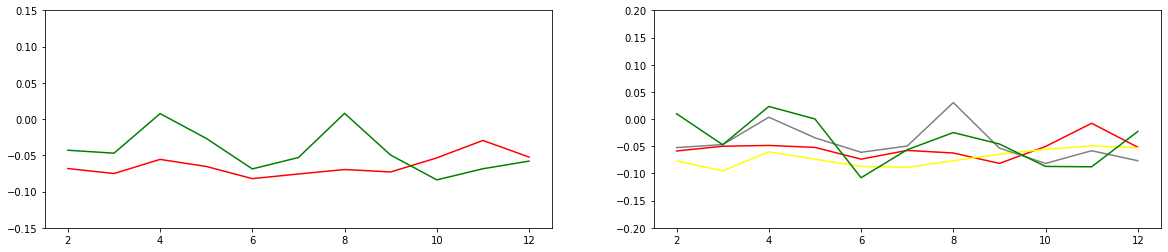

In [39]:
# GET THE GRAPHICS + DELTAS

delta_list_years = {}
delta_extremes_years = {}
list_1 = {}
list_2 = {}
list_3 = {}
list_4 = {}
list_bad = {}
list_good = {}
list_bad_count = {}
list_good_count = {}

for year_cutoff in year_cutoffs:
    data2=data
    #data2=data2[(data2['country_div_1']==False)] #& (data2['country_div_4']==True)] ## DELETE
    data2['odds_max_input_condition'] = data2[odds_type]<=odds_max_input
    data2['odds_min_input_condition'] = data2[odds_type]>=odds_min_input
    data2 = data2[(data2['odds_max_input_condition']==True) & (data2['odds_min_input_condition']==True)]
    data_date2 = data2['Date']
    data_date_2 = pd.to_datetime(data_date2, dayfirst = True) 
    data2['test_dates'] = (data_date_2>=year_cutoff[0]) & (data_date_2<year_cutoff[1])
    data2['train_dates'] = (data_date_2>=min_date) & (data_date_2<year_cutoff[0])
     #& (data['1.0_to_1.5']==True)
    
    # Build the train and test datasets
    X_train_0 = data2[data2['train_dates']==True][list_of_features]#,'year_number_ratio','month_number_ratio']]
    X_test_0 = data2[(data2['test_dates']==True)][list_of_features]#,'year_number_ratio','month_number_ratio']]
    y_train_0 = data2[data2['train_dates']==True][payout_cat]-1
    y_test_0 = data2[(data2['test_dates']==True)][payout_cat]-1
    # & (data['1.0_to_1.5']==True)
    
    # Storing year_number variable (to build the dictionaries)
    year_number = X_test_0['year_number'].min()
    
    # null the lists
    results_xgb_true=[] 
    results_xgb_false=[]
    results_xgb_true_count=[] 
    results_xgb_false_count=[]
    results_xgb_1=[]
    results_xgb_2=[]
    results_xgb_3=[]
    results_xgb_4=[]
    
    # reinitate the test_size
    test_size_0=0
    train_size_0=0

    # run the function -- 98% only!! fix
    median_results_bad_bets, median_results_good_bets, median_results_group_1_bets, median_results_group_2_bets, median_results_group_3_bets, median_results_group_4_bets, delta, delta_extremes, median_results_bad_bets_count, median_results_good_bets_count = checking_model_regressor_results(1,0.80,0.80)
    
    # store the results
    delta_list_years[year_number]=delta
    delta_extremes_years[year_number]=delta_extremes
    
    list_1[year_number]=median_results_group_1_bets
    list_2[year_number]=median_results_group_2_bets
    list_3[year_number]=median_results_group_3_bets
    list_4[year_number]=median_results_group_4_bets
    
    list_bad[year_number]=median_results_bad_bets
    list_good[year_number]=median_results_good_bets
    
    list_bad_count[year_number]=median_results_bad_bets_count
    list_good_count[year_number]=median_results_good_bets_count

#Plotting the results of the XGB Year over Year
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
sns.lineplot(list_bad.keys(), list_bad.values(), color='red',ax=ax[0])
sns.lineplot(list_good.keys(), list_good.values(), color='green',ax=ax[0])
    
sns.lineplot(list_1.keys(), list_1.values(), color='red',ax=ax[1])
sns.lineplot(list_2.keys(), list_2.values(), color='yellow',ax=ax[1])
sns.lineplot(list_3.keys(), list_3.values(), color='grey',ax=ax[1])
sns.lineplot(list_4.keys(), list_4.values(), color='green',ax=ax[1])

ax[0].set_ylim(-0.15,+0.15)
ax[1].set_ylim(-0.2,+0.2)

#np.array(list(delta_list_years.values())).mean(), np.array(list(delta_extremes_years.values())).mean()
list_good_values = np.array(list(list_good.values()))
list_good_values_without_na = [x for x in list_good_values if math.isnan(x) == False]
good_bets_across_years_mean = np.array(list_good_values_without_na).mean()

list_bad_values = np.array(list(list_bad.values()))
list_bad_values_without_na = [x for x in list_bad_values if math.isnan(x) == False]
bad_bets_across_years_mean = np.array(list_bad_values_without_na).mean()

list_4_values = np.array(list(list_4.values()))
list_4_values_without_na = [x for x in list_4_values if math.isnan(x) == False]
best_bets_across_years_mean = np.array(list_4_values_without_na).mean()

list_1_values = np.array(list(list_1.values()))
list_1_values_without_na = [x for x in list_1_values if math.isnan(x) == False]
worse_bets_across_years_mean = np.array(list_1_values_without_na).mean()

print('good_bets_avg_across_years:', good_bets_across_years_mean,
      'bad_bets_avg_across_years:', bad_bets_across_years_mean,
      'best_bets_avg_across_years:', best_bets_across_years_mean,
      'worse_bets_avg_across_years:', worse_bets_across_years_mean)
#sns.histplot(results_xgb_false,kde=True,bins=20,color='red',ax=ax[0])

In [40]:
##########

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


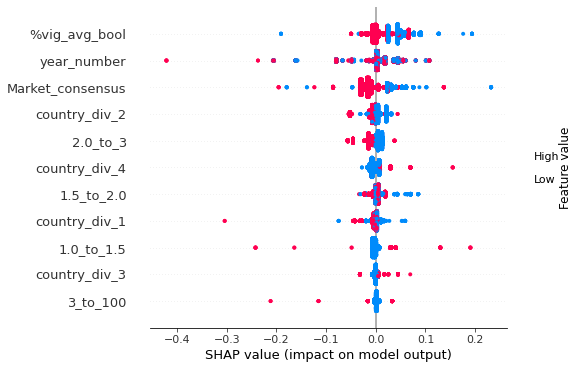

In [41]:
## Checking the SHAP values for the Regression model

my_model = xgb.XGBRegressor()
my_model.fit(X_train_0,y_train_0)
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_test_0)
shap.summary_plot(shap_values, X_test_0)

In [42]:
# PINNACLE

# Reset the indices
#data.reset_index(inplace=True, drop=True)

# Regressor Model variables
X_train_0 = data[data['train_dates']==True][['country_div_1','country_div_2','country_div_3','country_div_4','%vig_avg_bool','Market_consensus','year_number','1.0_to_1.5','1.5_to_2.0','2.0_to_3','3_to_100']]#,'year_number_ratio','month_number_ratio']]
X_test_0 = data[data['test_dates']==True][['country_div_1','country_div_2','country_div_3','country_div_4','%vig_avg_bool','Market_consensus','year_number','1.0_to_1.5','1.5_to_2.0','2.0_to_3','3_to_100']]#,'year_number_ratio','month_number_ratio']]
y_train_0 = data[data['train_dates']==True]['payout_avg_under_2.5']-1
y_test_0 = data[data['test_dates']==True]['payout_avg_under_2.5']-1

# Classifier Model variables
#y_test_0_classifier = data[data['test_dates']==True]['payout_under_2.5_pinacle_closing']!=0
#y_train_0_classifier = data[data['train_dates']==True]['payout_under_2.5_pinacle_closing']!=0

KeyError: 'train_dates'

### Run Regression model

In [ ]:
## RUN THE WHOLE CELL #

# We need to run this to null the lists
results_xgb_true=[] 
results_xgb_false=[]
results_xgb_1=[]
results_xgb_2=[]
results_xgb_3=[]
results_xgb_4=[]
    
#We need to run this to reinitate the test_size
test_size_0=0
train_size_0=0

# We need to run the function -> first: # of tests, second: test size (cannot be 1!), third: train size (cannot be 1!)
checking_model_regressor_results(10,0.999,0.999)

In [ ]:
## Checking the SHAP values for the Regression model

my_model = xgb.XGBRegressor()
my_model.fit(X_train_0,y_train_0)
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_test_0)
shap.summary_plot(shap_values, X_test_0)

In [ ]:
store_graph

### Run Classification model

In [ ]:
## RUN THE WHOLE CELL #

# We need to run this to null the lists
results_False=[]
results_True=[]
    
#We need to run this to reinitate the test_size
test_size_0=0

# We need to run the function -> first argument is the # of tests, second one is the size of test
checking_model_classifier_results(20,0.8)

# Comments regarding results of the tests we ran and Next Steps

In [ ]:
## Comments

# baseline = 0.008297694850435258 (all features)

# delta without Joao features = 0.014419296789770412 => F:-0.029970666611150436 and T:-0.015551369821380024
# --> WE REMOVE JOAO FEATURE

# delta when removing the odds buckets = -0.009317543146000251 => F:-0.022611272813043187 and T:-0.028804787343669917
# --> WE KEEP THE ODDS BUCKETS

# delta when removing the odds buckets = -0.009317543146000251 => F:-0.022611272813043187 and T:-0.028804787343669917
# --> WE KEEP THE ODDS BUCKETS

# delta when removing the countries and divisions = 0.004795286566703704
# --> WE KEEP THE COUNTRIES AND DIVISIONS

# delta when removing the divisions but keeping the countries = 0.008380480363148559 (worsening)
# delta when removing the countries but keeping the divisions = 0.02259680830123266 (best score ever)
# --> WE KEEP THE DIVSIONS AND REMOVE THE COUNTRIES

# delta when removing the 'month_after_July': 0.013657154854343441 DECREASED A LOT! We keep month after July
# year 2020_2021 = 0.012829398919170131 DECREASED A LOT! 
# TIME MATTERS!! We need months, years, time

# New basline: 0.023917075840908224

#'Pin pays better' does not improve the baseline and we remove it

#'Market_consensus' MATTERS we keep it

#VIG matters

# We should remove the P<PC variable
# BEST DELTA: 0.03151890594630853


In [ ]:
# Next steps:

## Time: Further explore how to optimise the features of time (years, months, hours, etc.)
## Odds: Further explore how to optimise the odds buckets (different bins, min-max scaling)
## VIG + Mkt Consensus: Further explore how to optimise VIG + Market consensus

In [ ]:
m.feature_importances

# [SKIP] Other models + stats package we could use [SKIP]

In [ ]:
# Random Forest

In [ ]:
my_model = xgb.XGBRegressor()
my_model.fit(X_train_0,y_train_0) 
        
        #Make and store the predictions XGBoost
       # y_pred_xgb = m.predict(X_test)
       # y_pred_xgb = pd.DataFrame(y_pred_xgb)

In [ ]:
#my_model = RandomForestRegressor(random_state=0).fit(X_step_joao, y)

In [ ]:
y_pred = my_model.predict(X_test_0)

In [ ]:
# SHAP values

In [ ]:
#import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test_0)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_test_0)

#- Vertical location shows what feature it is depicting
#- Color shows whether that feature was high or low for that row of the dataset
#- Horizontal location shows whether the effect of that value caused a higher or lower prediction.

In [ ]:
shap.summary_plot(shap_values, X_test_0, plot_type="bar")

# [SKIP] Features selection [SKIP]

In [ ]:
## Feature Selection function (TO BE CREATED)

# iterables = [[feature_1], [feature_2], [feature_3]]

# for t in itertools.product(*iterables):
#     print (t)

# feature_1 = ['1.0_to_1.5', '1.5_to_2.0', '2.0_to_3.0','3.0_to_99999.0']
# feature_2 = ['country_div_1','country_div_2','country_div_3','country_div_4']
# feature_3 = ['month_after_July']
# feature_4 = ['year_2021_2022']
# feature_5 = ['game_starts_after_4pm']
# feature_6 = ['Market_consensus']
# feature_7 = ['%vig_p_bool']
# feature_8 = ['payout_under_2.5_pinacle_closing']

# list_features = [feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8]

# from itertools import combinations
# sample_list = list_features
# list_combinations = list()
# for n in range(len(sample_list) + 1):
#     list_combinations += list(combinations(sample_list, n))
# print(list_combinations)

# list_combinations

# ls = list(list_combinations)
# flat_ls = [item for sublist in ls for item in sublist]

# a = list(list_combinations[3])

# mylist = list(list_combinations[3])
# [item[0] for item in mylist]

# list_features_array = np.array(list_features)

# list_features_array

# np.multiply(x[0]*list_features_array)

# from itertools import product
# import numpy as np

# n = 2

# x = product([1, 0], repeat=n)
# x = np.reshape(list(x), (-1, n))
# print(x)

# i=1
# #while i < 3:
# feature_selection_1 = x[0]*list_features_array[i]
# i=i=1
# final_feature_selection = feature_selection_1+feature_selection_2